# Introduccion
La funcion de este trabajo es analizar y reconocer el comportamiento del sector de telecomunicaciones a nivel nacional en Argentina.
El cliente es una empresa centrada principalmente en brindar servicio de internet y el objetivo inmediato del trabajo es aumentar el acceso a dicho servicio en el pais, sinembargo es importante tener en cuenta el resto de los servicios de comunicacion en el analisis para poder asegurarse de brindar la informacion mas adecuada y relevante para la posterior toma de decisiones del negocio.

Este archivo contiene el paso a paso que se llevo a cabo para completar el analisis de los datos ofrecidos publicamente por el ENACOM.

Los objetivos del analisis son:
1. Carga y correccion de datos (revision de formato de datos y valores nulos).
2. Inspeccion individual de los documentos ofrecidos para el analisis superficial.
3. Seleccion de los archivos y datos mas relevantes para el analisis profundo.
4. Analisis profundo, busqueda de patrones, metricas importantes y KPIs.

# Analisis Superficial y ETL

## Librerias y Archivos a utilizar

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dentro del archivo principal (internet.xlsx) se encuentran 15 hojas:

- Acc_vel_loc_sinrangos: Datos de acceso por localidad sin rangos de velocidad.
- Velocidad_sin_Rangos: Información sobre la velocidad de conexión a internet sin rangos específicos.
- Velocidad % por prov: Distribución porcentual de la velocidad de conexión a internet por provincia.
- Totales VMD: Totales de velocidad media descargada (VMD).
- Accesos_tecnologia_localidad: Accesos a internet por tipo de tecnología y localidad.
- Totales Accesos Por Tecnología: Totales de accesos a internet desglosados por tecnología.
- Accesos Por Tecnología: Accesos a internet por tipo de tecnología.
- Dial-BAf: Accesos dial-up y Banda Ancha Fija (BAf).
- Totales Dial-BAf: Totales de accesos dial-up y Banda Ancha Fija (BAf).
- Penetración-poblacion: Penetración de internet en la población.
- Penetracion-hogares: Penetración de internet en hogares.
- Penetracion-totales: Totales de penetración de internet.
- Totales Accesos por velocidad: Totales de accesos a internet desglosados por velocidad de conexión.
- Accesos por velocidad: Accesos a internet desglosados por velocidad de conexión.
- Ingresos: Ingresos generados por los servicios de internet en miles de pesos.

Tras una observacion individual se decidira cual de las hojas contiene datos relevantes y cuales pueden o deben ser descartados.

In [71]:
internet_sheets = '../Data/Internet.xlsx'


### Acc_vel_loc_sinrangos


In [72]:
df_Acc_vel_loc_sinrangos = pd.read_excel(internet_sheets, sheet_name='Acc_vel_loc_sinrangos')

df_Acc_vel_loc_sinrangos.info()
df_Acc_vel_loc_sinrangos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Columns: 136 entries, Provincia to 1024 Mbps
dtypes: float64(132), object(4)
memory usage: 3.2+ MB


Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  540 Mbps  600 Mbps  680 Mbps  \
0      2.00         NaN      19.00     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2      1.00         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

   700 Mbps  800 Mbps  850 Mbps  900 Mbps  999 Mbps  1000 Mbps  1024 Mbps  
0       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
1       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
2       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
3       NaN       NaN       NaN       NaN       NaN        NaN        NaN  
4       NaN       NaN       NaN       NaN       NaN        NaN        NaN  

[5 rows x 136 columns]

A simple vista se puede observar una gran cantidad de datos nulos.

El 92.54% de de esta hoja no tiene datos.


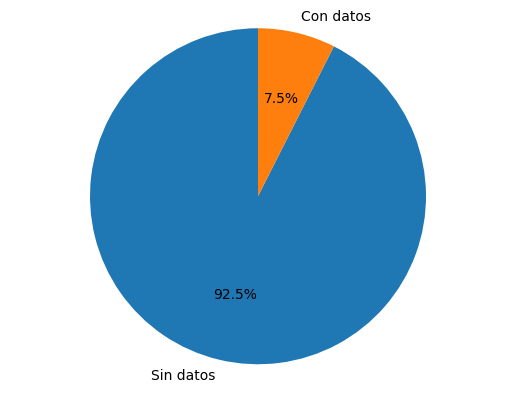

In [73]:
total_nulos = df_Acc_vel_loc_sinrangos.isnull().sum().sum()
total = df_Acc_vel_loc_sinrangos.size
total_no_nulos = total - total_nulos

labels = 'Sin datos', 'Con datos'
sizes = [total_nulos, total_no_nulos]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((total_nulos/total)*100, 2)}% de de esta hoja no tiene datos.')

La estructura representan la cantidad de accesos a los distintos niveles de velocidad de internet dividido por las diferentes localidades. Trae datos interesantes, sin embargo no permite analizar los valores historicos.

### Velocidad Sin Rangos

In [74]:
df_Velocidad_sin_Rangos = pd.read_excel(internet_sheets, sheet_name='Velocidad_sin_Rangos')

df_Velocidad_sin_Rangos.info()
df_Velocidad_sin_Rangos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 906.3+ KB


Año  Trimestre        Provincia     Otros  0,256 Mbps  0,375 Mbps  \
0 2,023.00       4.00     Buenos Aires 93,351.00       19.00        0.00   
1 2,023.00       4.00  Capital Federal      0.00       31.00        0.00   
2 2,023.00       4.00        Catamarca     77.00        0.00        0.00   
3 2,023.00       4.00            Chaco  4,040.00        0.00        0.00   
4 2,023.00       4.00           Chubut 16,589.00        8.00        0.00   

   0,625 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  2048 Mbps  2529 Mbps  \
0        0.00 26,703.00      187.00   4,611.00  ...       0.00       0.00   
1        0.00    451.00       34.00   1,307.00  ...       0.00       0.00   
2        0.00     34.00       37.00       0.00  ...       0.00       0.00   
3        0.00    234.00        2.00       0.00  ...       0.00       0.00   
4        0.00     69.00       34.00     836.00  ...       0.00       0.00   

   3072 Mbps  4000 Mbps  5000 Mbps  5125 Mbps  6000 Mbps  7000 Mbps  \
0       0.00       0.00       0.00       0.00       0.00       0.00   
1       0.00       0.00       0.00       0.00       0.00       0.00   
2       0.00       0.00       0.00       0.00       0.00       0.00   
3       0.00       0.00       0.00       0.00       0.00       0.00   
4       0.00       0.00       0.00       0.00       0.00       0.00   

   8000 Mbps  10000 Mbps  
0       0.00        0.00  
1       0.00        0.00  
2       0.00        0.00  
3       0.00        0.00  
4       0.00        0.00  

[5 rows x 193 columns]

La columna es sumamente similar a la anterior, a cambio de dividir los datos en grupos mas grandes (provincias), permite hacer una observacion de los cambios en la velocidad de internet a travez del tiempo.

### Velocidad % por prov

In [75]:
df_Velocidad_por_prov = pd.read_excel(internet_sheets, sheet_name='Velocidad % por prov')

df_Velocidad_por_prov.info()
df_Velocidad_por_prov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2023          4     Buenos Aires                  158.49
1  2023          4  Capital Federal                  234.44
2  2023          4        Catamarca                   89.40
3  2023          4            Chaco                  107.14
4  2023          4           Chubut                   20.29

Contiene un historico del promedio de bajada por provincia.

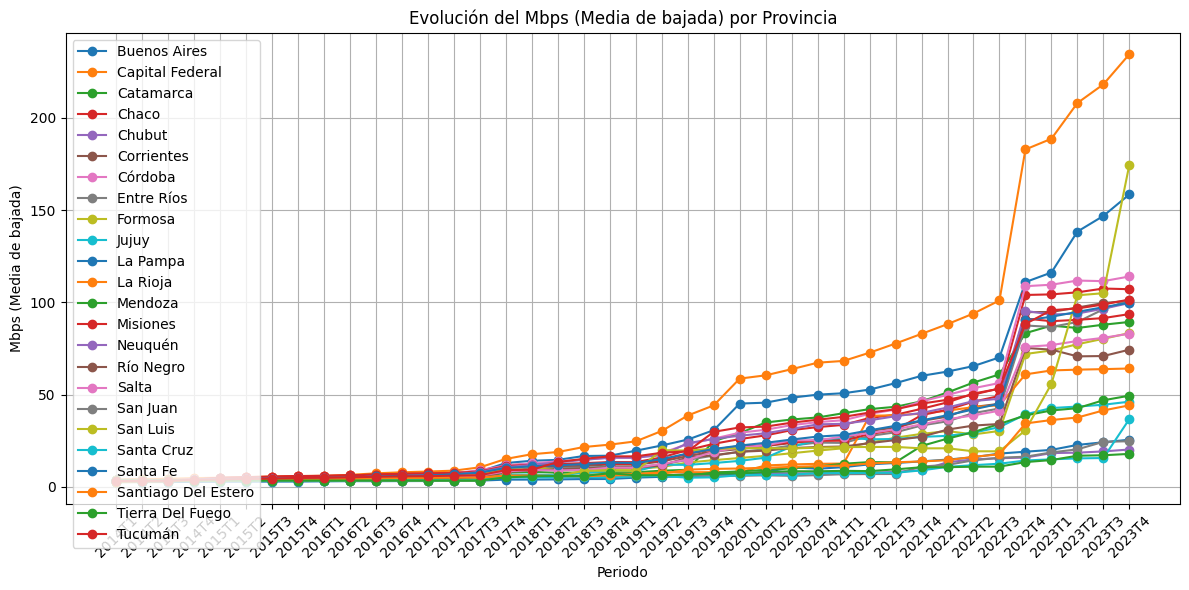

In [76]:
df_Velocidad_por_prov['Periodo'] = df_Velocidad_por_prov['Año'].astype(str) + 'T' + df_Velocidad_por_prov['Trimestre'].astype(str)

df_pivot = df_Velocidad_por_prov.pivot(index='Periodo', columns='Provincia', values='Mbps (Media de bajada)')

plt.figure(figsize=(12, 6))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)

plt.title('Evolución del Mbps (Media de bajada) por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_Velocidad_por_prov.drop(columns='Periodo', inplace=True)

A simple vista se puede observar ciertos puntos donde la tendencia cambia, especificamente:
- A partir del 3er trimestre se nota un aumento general en la velocidad de internet a nivel nacional
- Entre el 4to trimestre del 2019 y el 1er trimestre del 2020 en algunas provincias
- El 3er trimestre de 2022 genero un crecimiento extremo a nivel nacional

La metrica de velocidad de bajada promedio puede ser muy util para medir desarrollo y/o tendencias comerciales en el sector.

### Totales VMD

In [77]:
df_Totales_VMD = pd.read_excel(internet_sheets, sheet_name='Totales VMD')

df_Totales_VMD.info()
df_Totales_VMD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     40 non-null     int64  
 1   Trimestre               40 non-null     int64  
 2   Mbps (Media de bajada)  40 non-null     float64
 3   Trimestre.1             40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2023          4                  139.04   Oct-Dic 2023
1  2023          3                  129.67  Jul-Sept 2023
2  2023          2                  123.95   Abr-Jun 2023
3  2023          1                  110.50   Ene-Mar 2023
4  2022          4                  106.56   Oct-Dic 2022

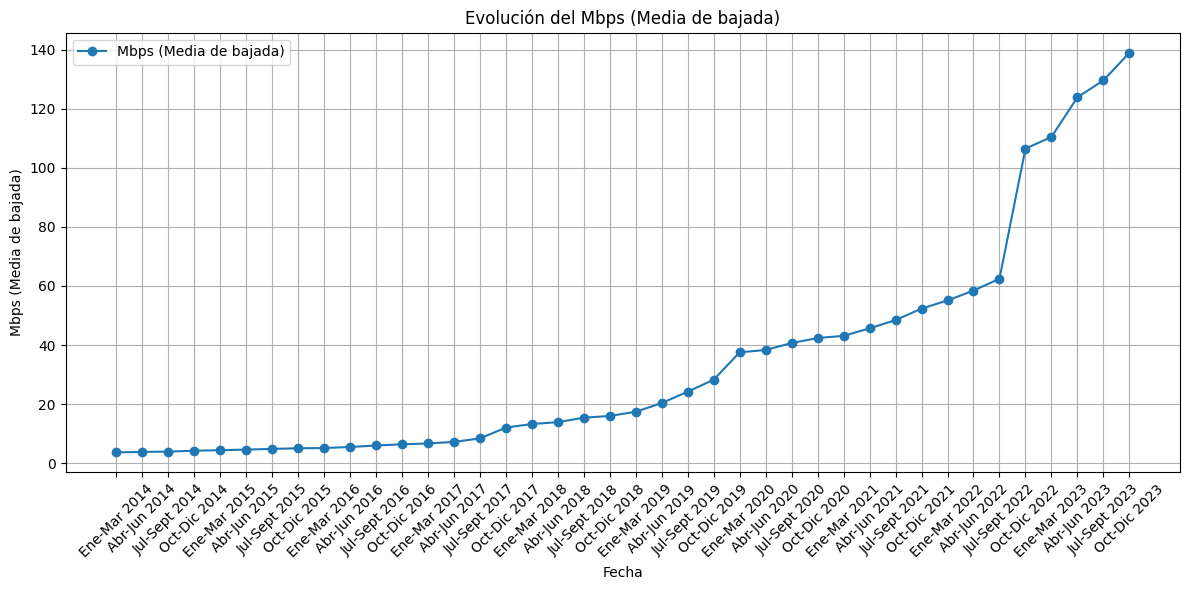

In [78]:
df_Totales_VMD_invertido = df_Totales_VMD.iloc[::-1]

plt.figure(figsize=(12, 6))
plt.plot(df_Totales_VMD_invertido['Trimestre.1'], df_Totales_VMD_invertido['Mbps (Media de bajada)'], marker='o', label='Mbps (Media de bajada)')

plt.title('Evolución del Mbps (Media de bajada)')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si bien la informacion es interesante, los datos son los mismos e incluso menos que los de la hoja anterior, ya que es un promedio anual de la misma metrica.

### Accesos_tecnologia_localidad

In [79]:
df_Accesos_tecnologia_localidad = pd.read_excel(internet_sheets, sheet_name='Accesos_tecnologia_localidad')

df_Accesos_tecnologia_localidad.info()
df_Accesos_tecnologia_localidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3076 non-null   object
 1   Partido        3076 non-null   object
 2   Localidad      3076 non-null   object
 3   Link Indec     3076 non-null   object
 4   ADSL           3076 non-null   int64 
 5   CABLEMODEM     3076 non-null   int64 
 6   DIAL UP        3076 non-null   int64 
 7   FIBRA OPTICA   3076 non-null   int64 
 8   OTROS          3076 non-null   int64 
 9   SATELITAL      3076 non-null   int64 
 10  WIMAX          3076 non-null   int64 
 11  WIRELESS       3076 non-null   int64 
 12  Total general  3076 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 312.5+ KB


Provincia     Partido               Localidad Link Indec  ADSL  \
0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100   756   
1  BUENOS AIRES  25 de Mayo               Del Valle    6854020   181   
2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040     0   
3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060     0   
4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050     0   

   CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
0        4600        0             3      0        742      0       726   
1           0        0             0     10          1      0         0   
2           0        0             0      0          0      0       181   
3         782        0           496     16          0      0       185   
4           0        0             0      0          0      0         6   

   Total general  
0           6827  
1            192  
2            181  
3           1479  
4              6

La estructura representan la cantidad de accesos a las distintas tecnologias de internet dividido por las diferentes localidades. Trae datos interesantes, sin embargo no permite analizar los valores historicos.

### Totales Accesos Por Tecnología

In [80]:
df_Totales_Accesos_Por_Tecnologia = pd.read_excel(internet_sheets, sheet_name='Totales Accesos Por Tecnología')

df_Totales_Accesos_Por_Tecnologia.info()
df_Totales_Accesos_Por_Tecnologia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           40 non-null     int64 
 1   Trimestre     40 non-null     int64 
 2   ADSL          40 non-null     int64 
 3   Cablemodem    40 non-null     int64 
 4   Fibra óptica  40 non-null     int64 
 5   Wireless      40 non-null     int64 
 6   Otros         40 non-null     int64 
 7   Total         40 non-null     int64 
 8   Periodo       40 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.9+ KB


Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2023          4   836390     6022532       3908183    585760  194796   
1  2023          3   897895     6018832       3708718    581436  200027   
2  2023          2  1006509     5997149       3463988    581823  202428   
3  2023          1  1204417     6002582       3243411    576647  214838   
4  2022          4  1315373     6037457       3060575    572969  221740   

      Total        Periodo  
0  11547661   Oct-Dic 2023  
1  11406908  Jul-Sept 2023  
2  11251897   Abr-Jun 2023  
3  11241895   Ene-Mar 2023  
4  11208114   Oct-Dic 2022

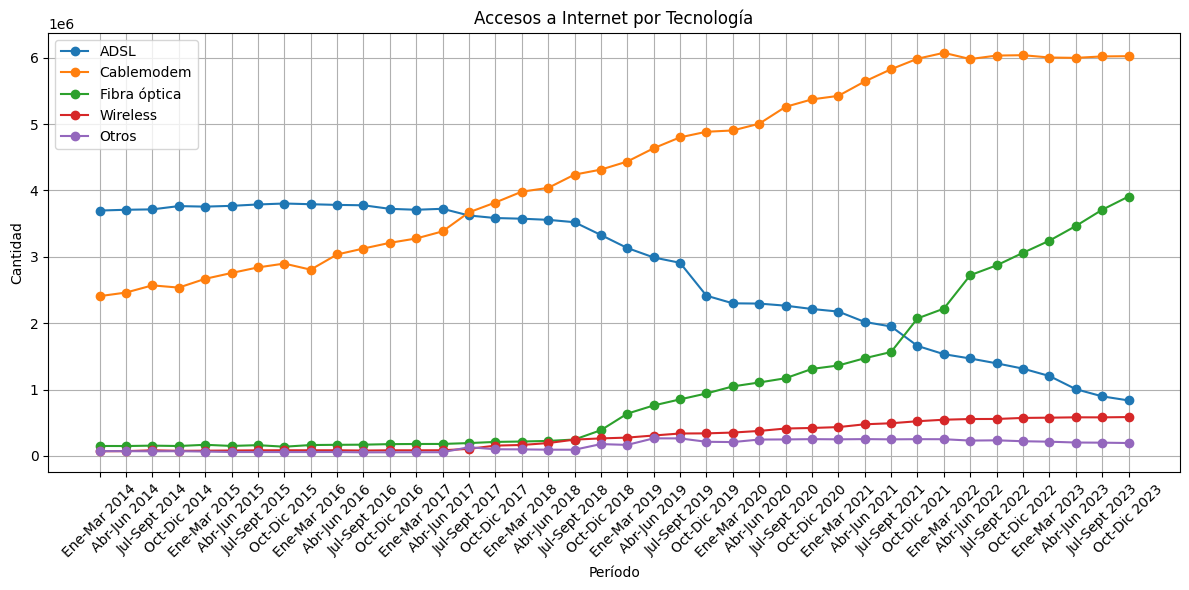

In [81]:
df_Totales_Accesos_Por_Tecnologia_Invertido = df_Totales_Accesos_Por_Tecnologia.iloc[::-1]

columnas_grafico = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

plt.figure(figsize=(12, 6))

for columna in columnas_grafico:
    plt.plot(df_Totales_Accesos_Por_Tecnologia_Invertido['Periodo'], df_Totales_Accesos_Por_Tecnologia_Invertido[columna], marker='o', label=columna)

plt.title('Accesos a Internet por Tecnología')
plt.xlabel('Período')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La informacion es sumamente interesante, a simple vista podemos ver cambios interesantes:
- Desde el principio el numero de accesos ADSL fue reduciendose
- Asimismo desde el principio el numero de accesos Cablemodem fue aumentando
- Si bien Cablemodem sigue siendo la mas usada, su crecimiento se estanco a partir del periodo Octubre - Diciembre de 2022
- En Abril - Junio de 2018 el numero de conexiones con fibra optica comenzo a aumentar
- En Abril - Junio de 2021 hubo una profundizacion en la tendencia de crecimiento de la fibra optica
- El resto de las tecnologias parece no generar una cantidad sustancial de accesos nuevos

La informacion puede traer insights interesantes sobre el desarrollo a nivel nacional de ciertas tecnologias y las tendencias del mercado.

### Accesos Por Tecnologia
Esta hoja contiene gran cantidad de datos de valor, trayendo la lista completa de tecnologias de acceso a internet y un historico con la cantidad de cada uno en cada provincia.
Procedemos a observar los datos en mas detalle.

In [82]:
df_Accesos_tecnologia = pd.read_excel(internet_sheets, sheet_name='Accesos Por Tecnología')

df_Accesos_tecnologia.info()
df_Accesos_tecnologia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB


Año Trimestre        Provincia       ADSL   Cablemodem  Fibra óptica  \
0  2023         4     Buenos Aires 223,391.00 2,797,700.00  1,784,593.00   
1  2023         4  Capital Federal  58,700.00 1,198,835.00    182,520.00   
2  2023         4        Catamarca   6,669.00    11,016.00     55,437.00   
3  2023         4            Chaco  14,000.00    60,277.00     62,301.00   
4  2023         4           Chubut  26,306.00    77,217.00     26,174.00   

    Wireless     Otros        Total  
0 137,993.00 67,943.00 5,011,620.00  
1   4,492.00 29,820.00 1,474,367.00  
2   1,384.00     81.00    74,587.00  
3   8,404.00  2,404.00   147,386.00  
4  30,543.00  9,930.00   170,170.00

Se encontraron algunos valores nulos, los observamos en detalle.

In [83]:
filas_con_nulos = df_Accesos_tecnologia[df_Accesos_tecnologia.isnull().any(axis=1)]
filas_con_nulos

Año                                          Trimestre Provincia  ADSL  \
960  NaN                                                NaN       NaN   NaN   
961    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  Otros  Total  
960         NaN           NaN       NaN    NaN    NaN  
961         NaN           NaN       NaN    NaN    NaN

Notamos que son dos filas vacias de datos utiles.
Tambien se puede ver que la columna 'Año' y 'Trimestre' tiene errores en el formato.
Una observacion mas que se puede hacer es que la columna 'Total' es innecesaria, ya que es el resultado de sumar todas las otras. Seria inteligente eliminarla para evitar la redundancia de los datos.

Procedemos a solucionar estos problemas.

In [84]:
# Funcion de limpieza
def asteriscos_a_numeros(valor):
    if '*' in valor:
        sin_asterisco = valor.replace('*', '')
    else:
        sin_asterisco = valor
    return int(sin_asterisco)

In [85]:
df_Accesos_tecnologia.dropna(inplace=True)

df_Accesos_tecnologia['Año'] = df_Accesos_tecnologia['Año'].astype(str).apply(asteriscos_a_numeros)
df_Accesos_tecnologia['Trimestre'] = df_Accesos_tecnologia['Trimestre'].astype(str).apply(asteriscos_a_numeros)

df_Accesos_tecnologia.drop(columns=['Total'], inplace=True)

df_Accesos_tecnologia.info()
df_Accesos_tecnologia.head()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    int64  
 1   Trimestre     960 non-null    int64  
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 67.5+ KB


Año  Trimestre        Provincia       ADSL   Cablemodem  Fibra óptica  \
0  2023          4     Buenos Aires 223,391.00 2,797,700.00  1,784,593.00   
1  2023          4  Capital Federal  58,700.00 1,198,835.00    182,520.00   
2  2023          4        Catamarca   6,669.00    11,016.00     55,437.00   
3  2023          4            Chaco  14,000.00    60,277.00     62,301.00   
4  2023          4           Chubut  26,306.00    77,217.00     26,174.00   

    Wireless     Otros  
0 137,993.00 67,943.00  
1   4,492.00 29,820.00  
2   1,384.00     81.00  
3   8,404.00  2,404.00  
4  30,543.00  9,930.00

Esta hoja trae informacion similar a la anterior, añadiendo el detalle de cada provincia sin perder informacion.

### Dial-BAf

In [86]:
df_Dial_BAf = pd.read_excel(internet_sheets, sheet_name='Dial-BAf')

df_Dial_BAf.info()
df_Dial_BAf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               960 non-null    int64  
 1   Trimestre         960 non-null    int64  
 2   Provincia         960 non-null    object 
 3   Banda ancha fija  960 non-null    int64  
 4   Dial up           958 non-null    float64
 5   Total             960 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB


Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2023          4     Buenos Aires           5005720 5,900.00  5011620
1  2023          4  Capital Federal           1472317 2,050.00  1474367
2  2023          4        Catamarca             74586     1.00    74587
3  2023          4            Chaco            147381     5.00   147386
4  2023          4           Chubut            169313   857.00   170170

Parece haber algunos valores nulos, investigamos

In [87]:
filas_con_nulos = df_Dial_BAf[df_Dial_BAf.isnull().any(axis=1)]
filas_con_nulos

Año  Trimestre Provincia  Banda ancha fija  Dial up   Total
536  2018          2   Formosa             44554      NaN   44554
541  2018          2  Misiones            106147      NaN  106147

Parece haber espacios vacios en la columna Dial Up, debido a la naturaleza de los datos considero apropiado rellenarlos con 0.

In [88]:
df_Dial_BAf = df_Dial_BAf.fillna(0)

df_Dial_BAf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               960 non-null    int64  
 1   Trimestre         960 non-null    int64  
 2   Provincia         960 non-null    object 
 3   Banda ancha fija  960 non-null    int64  
 4   Dial up           960 non-null    float64
 5   Total             960 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB


Los valores estan listos para analizarse.

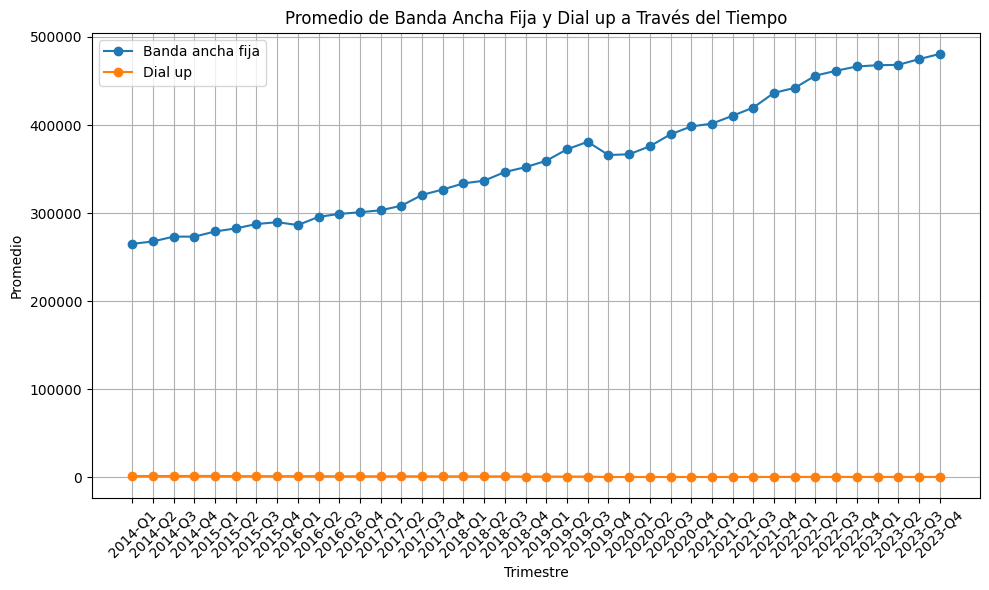

In [89]:
df_promedio = df_Dial_BAf.groupby(['Año', 'Trimestre']).agg({
    'Banda ancha fija': 'mean',
    'Dial up': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_promedio['Año'].astype(str) + '-Q' + df_promedio['Trimestre'].astype(str), df_promedio['Banda ancha fija'], marker='o', label='Banda ancha fija')
plt.plot(df_promedio['Año'].astype(str) + '-Q' + df_promedio['Trimestre'].astype(str), df_promedio['Dial up'], marker='o', label='Dial up')

plt.title('Promedio de Banda Ancha Fija y Dial up a Través del Tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Con estos datos podemos hacer algunas observaciones:
- Banda ancha tuco un crecimiento estable
- Hubo una unica bajada de cantidad de accesos, especificamente entre el Q2 y Q3 del 2019
- La cantidad de Dial Up es practicamente insignificante en relacion a la cantidad de banda ancha

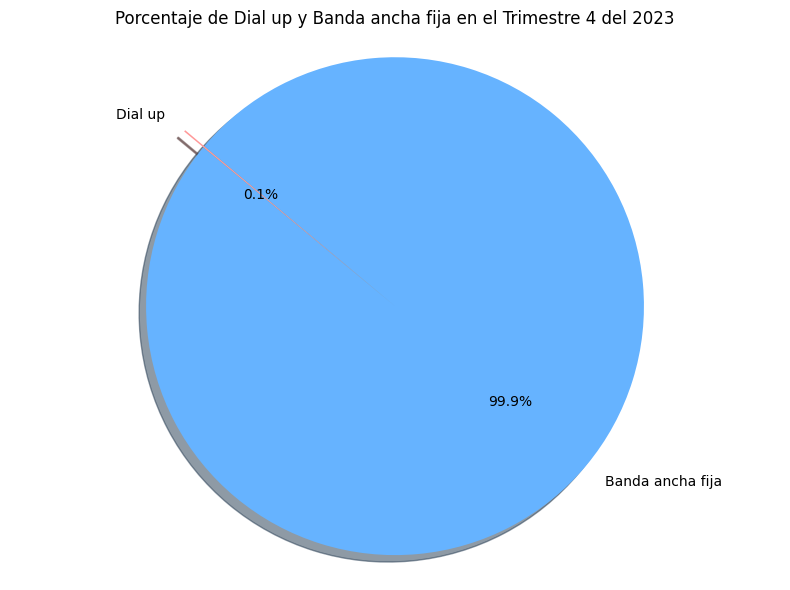

In [90]:
df_trimestre4_2023 = df_Dial_BAf[(df_Dial_BAf['Año'] == 2023) & (df_Dial_BAf['Trimestre'] == 4)]

total_dial_up = df_trimestre4_2023['Dial up'].sum()
total_banda_ancha = df_trimestre4_2023['Banda ancha fija'].sum()
total_general = df_trimestre4_2023['Total'].sum()

porcentaje_dial_up = (total_dial_up / total_general) * 100
porcentaje_banda_ancha = (total_banda_ancha / total_general) * 100

labels = ['Dial up', 'Banda ancha fija']
sizes = [porcentaje_dial_up, porcentaje_banda_ancha]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Porcentaje de Dial up y Banda ancha fija en el Trimestre 4 del 2023')

plt.axis('equal')
plt.tight_layout()
plt.show()

El grafico demuestra claramente el ultimo punto.

### Totales Dial-BAf

In [91]:
df_Totales_Dial_BAf = pd.read_excel(internet_sheets, sheet_name='Totales Dial-BAf')

df_Totales_Dial_BAf.info()
df_Totales_Dial_BAf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               40 non-null     int64 
 1   Trimestre         40 non-null     int64 
 2   Banda ancha fija  40 non-null     int64 
 3   Dial up           40 non-null     int64 
 4   Total             40 non-null     int64 
 5   Periodo           40 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.0+ KB


Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  2023          4          11535868    11793  11547661   Oct-Dic 2023
1  2023          3          11395115    11793  11406908  Jul-Sept 2023
2  2023          2          11239781    12116  11251897   Abr-Jun 2023
3  2023          1          11229459    12436  11241895   Ene-Mar 2023
4  2022          4          11195668    12446  11208114   Oct-Dic 2022

Esta hoja contiene valores similares a la anterior, pero no tiene el detalle de la subdivicion por provincias.

### Penetracion en Hogares

Esta hoja contiene una columna muy relevante dentro de la base de datos: 'Accesos por cada 100 hogares'.
La columna trae una forma clara y quantificable de observar el progreso (o falta de este) a travez del tiempo en cada provincia.

In [92]:
df_Penetracion_hogares = pd.read_excel(internet_sheets, sheet_name='Penetracion-hogares')

df_Penetracion_hogares.info()
df_Penetracion_hogares.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2023          4     Buenos Aires                         80.96
1  2023          4  Capital Federal                        117.02
2  2023          4        Catamarca                         68.63
3  2023          4            Chaco                         44.35
4  2023          4           Chubut                         84.96

Los datos parecen estar listos para ser analizados.

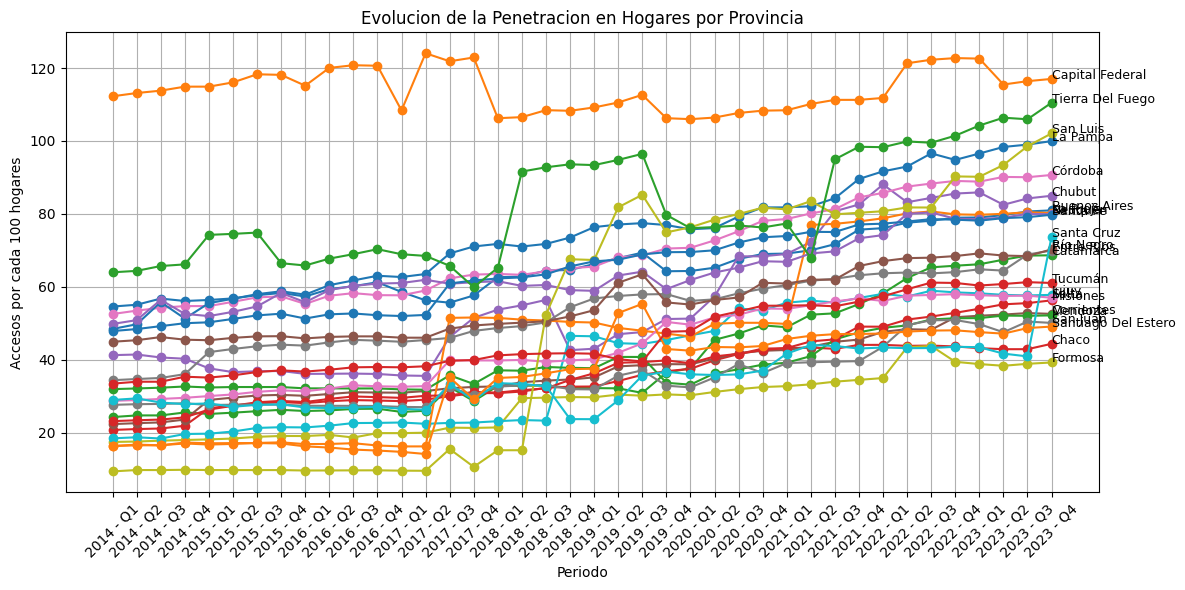

In [93]:
df_Penetracion_hogares['Periodo'] = df_Penetracion_hogares['Año'].astype(str) + ' - Q' + df_Penetracion_hogares['Trimestre'].astype(str)

df_pivot = df_Penetracion_hogares.pivot(index='Periodo', columns='Provincia', values='Accesos por cada 100 hogares')
df_Penetracion_hogares.drop(columns=['Periodo'], inplace=True)

plt.figure(figsize=(12, 6))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)
    
    plt.annotate(provincia, xy=(df_pivot.index[-1], df_pivot[provincia].iloc[-1]), xytext=(0, 0),
                textcoords='offset points', fontsize=9, color='black')

plt.title('Evolucion de la Penetracion en Hogares por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este grafico se pueden hacer multiples observaciones:
- Capital Federal y Tierra del fuego tienen un nivel de penetracion en hogares relativamente consistente y de vanguardia.
- San Luis a tenido uno de los crecimientos en nivel de penetracion en hogares mas importante del pais (de ultimo a tercer lugar en 10 años)

Se considera que hay mas informacion extraible y los datos son valiosos.

### Penetracion en Poblacion
De manera similar a Penetracion en Hogares, la columna 'Accesos por cada 100 hab' lanza informacion util, aunque similar a la anterior.
Tan similar que trae la posibilidad de mostrar una cierta redundancia en los datos. Sin embargo la diferencia en la forma de medir la llegada del internet a la poblacion puede traer algunos puntos de interes.

In [94]:
df_Penetracion_poblacion = pd.read_excel(internet_sheets, sheet_name='Penetración-poblacion')

df_Penetracion_poblacion.info()
df_Penetracion_poblacion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2023          4     Buenos Aires                     27.68
1  2023          4  Capital Federal                     47.80
2  2023          4        Catamarca                     17.46
3  2023          4            Chaco                     11.85
4  2023          4           Chubut                     26.04

Tras la observacion se concluye que los datos estan listos para el analisis.

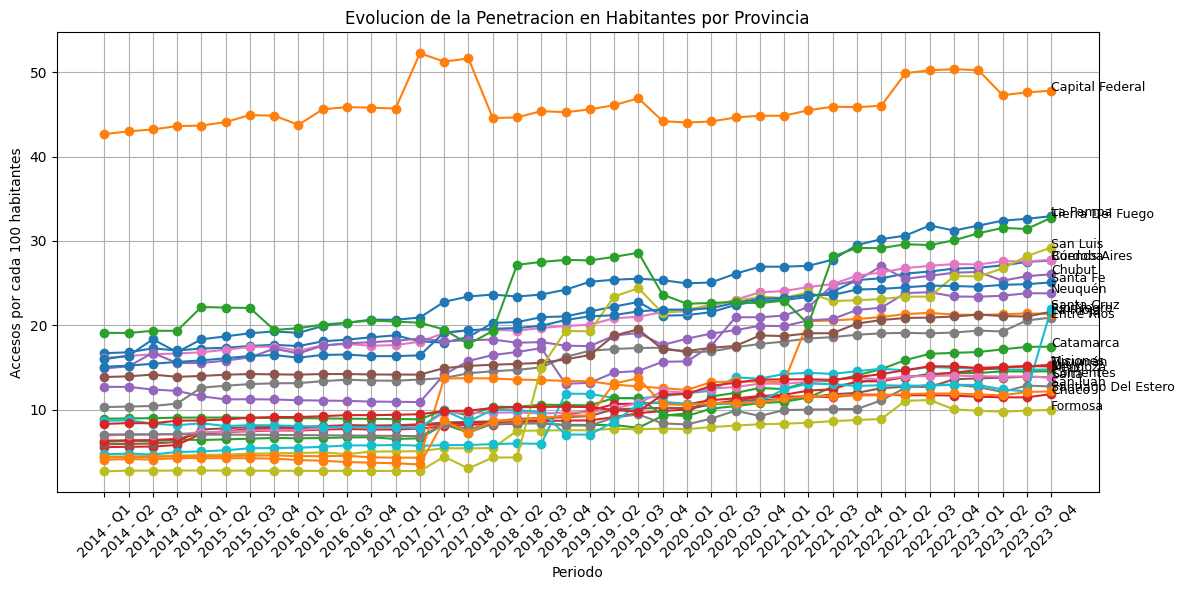

In [95]:
df_Penetracion_poblacion['Periodo'] = df_Penetracion_poblacion['Año'].astype(str) + ' - Q' + df_Penetracion_poblacion['Trimestre'].astype(str)

df_pivot = df_Penetracion_poblacion.pivot(index='Periodo', columns='Provincia', values='Accesos por cada 100 hab')

plt.figure(figsize=(12, 6))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)
    
    plt.annotate(provincia, xy=(df_pivot.index[-1], df_pivot[provincia].iloc[-1]), xytext=(0, 0),
                textcoords='offset points', fontsize=9, color='black')


plt.title('Evolucion de la Penetracion en Habitantes por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 habitantes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
df_Penetracion_poblacion

Año  Trimestre            Provincia  Accesos por cada 100 hab    Periodo
0    2023          4         Buenos Aires                     27.68  2023 - Q4
1    2023          4      Capital Federal                     47.80  2023 - Q4
2    2023          4            Catamarca                     17.46  2023 - Q4
3    2023          4                Chaco                     11.85  2023 - Q4
4    2023          4               Chubut                     26.04  2023 - Q4
..    ...        ...                  ...                       ...        ...
955  2014          1           Santa Cruz                      8.68  2014 - Q1
956  2014          1             Santa Fe                     15.08  2014 - Q1
957  2014          1  Santiago Del Estero                      4.06  2014 - Q1
958  2014          1     Tierra Del Fuego                     19.10  2014 - Q1
959  2014          1              Tucumán                      8.31  2014 - Q1

[960 rows x 5 columns]

Se pueden hacer observacioens similares:
- De nuevo, Capital se encuentra en la vanguardia de la penetracion por persona
- La Pampa y Tierra del fuego lo siguen de cerca
- El crecimiento de la penetracion por habitantes en San Luis es el mas extremo de todas las provincias (de ultimo a 4to)

### Penetracion-totales

In [97]:
df_Penetracion_totales = pd.read_excel(internet_sheets, sheet_name='Penetracion-totales')

df_Penetracion_totales.info()
df_Penetracion_totales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2023          4                         78.56                     24.66   
1  2023          3                         77.84                     24.41   
2  2023          2                         77.02                     24.14   
3  2023          1                         77.20                     24.17   
4  2022          4                         77.21                     24.15   

         Periodo  
0   Oct-Dic 2023  
1  Jul-Sept 2023  
2   Abr-Jun 2023  
3   Ene-Mar 2023  
4   Oct-Dic 2022

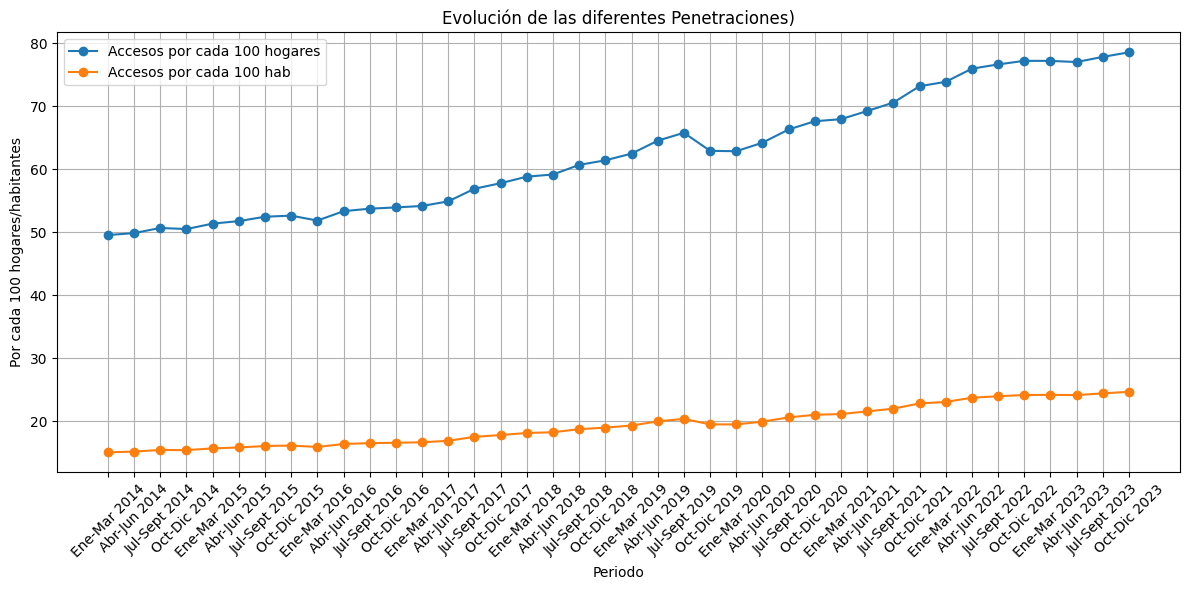

In [98]:
df_Penetracion_totales_invertido = df_Penetracion_totales.iloc[::-1]

plt.figure(figsize=(12, 6))
plt.plot(df_Penetracion_totales_invertido['Periodo'], df_Penetracion_totales_invertido['Accesos por cada 100 hogares'], marker='o', label='Accesos por cada 100 hogares')
plt.plot(df_Penetracion_totales_invertido['Periodo'], df_Penetracion_totales_invertido['Accesos por cada 100 hab'], marker='o', label='Accesos por cada 100 hab')

plt.title('Evolución de las diferentes Penetraciones)')
plt.xlabel('Periodo')
plt.ylabel('Por cada 100 hogares/habitantes')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De la grafica se puede observar:
- Un consistente aumento de ambas metricas de penetracion
- Una caida importante entre Abril - Junio del 2019 y Octubre - Diciembre de 2019
- El nivel de penetracion en Hogares es mas alto que el nivel de penetracion en poblacion (como se esperaba, pues hay mas personas que casas depenediendo del tamaño de las familias)

Tambien se llega a la conclusion que, si bien el grafico es extremadamente valioso, es una convinacion menos detallada de las dos hojas anteriores.

### Totales Accesos por velocidad

In [99]:
df_Totales_Accesos_por_velocidad = pd.read_excel(internet_sheets, sheet_name='Totales Accesos por velocidad')

df_Totales_Accesos_por_velocidad.info()
df_Totales_Accesos_por_velocidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      40 non-null     int64
 1   Trimestre                40 non-null     int64
 2   Hasta 512 kbps           40 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  40 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    40 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   40 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  40 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  40 non-null     int64
 8   Más de 30 Mbps           40 non-null     int64
 9   OTROS                    40 non-null     int64
 10  Total                    40 non-null     int64
dtypes: int64(11)
memory usage: 3.6 KB


Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          4           29708                    71742   
1  2023          3           30274                    80609   
2  2023          2           30827                    79405   
3  2023          1           31437                    82048   
4  2022          4           31981                    85668   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 900253                  978108                   697232   
1                 945608                  998725                   720084   
2                 963510                 1028250                   734125   
3                1001553                 1060321                   729194   
4                1075272                 1109421                   765015   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   350290         8224736  295592  11547661  
1                   350918         8003269  277421  11406908  
2                   364730         7775095  275955  11251897  
3                   357769         7564819  414754  11241895  
4                   335573         7410902  394282  11208114

Se encontro un error en la culumna año, nos aseguramos que no haya otros y corregimos el error

In [100]:
def regulacion_año(value):
    if value == 2024:
        return 2023
    return value

df_Totales_Accesos_por_velocidad['Año'] = df_Totales_Accesos_por_velocidad['Año'].apply(regulacion_año)

valores_unicos = df_Totales_Accesos_por_velocidad['Año'].value_counts()

print(valores_unicos)
df_Totales_Accesos_por_velocidad.info()

Año
2023    4
2022    4
2021    4
2020    4
2019    4
2018    4
2017    4
2016    4
2015    4
2014    4
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      40 non-null     int64
 1   Trimestre                40 non-null     int64
 2   Hasta 512 kbps           40 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  40 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    40 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   40 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  40 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  40 non-null     int64
 8   Más de 30 Mbps           40 non-null     int64
 9   OTROS                    40 non-null     int64
 10  Total                    40 non-null     int64
dtypes: int64(11)
memory usage: 3.6 KB


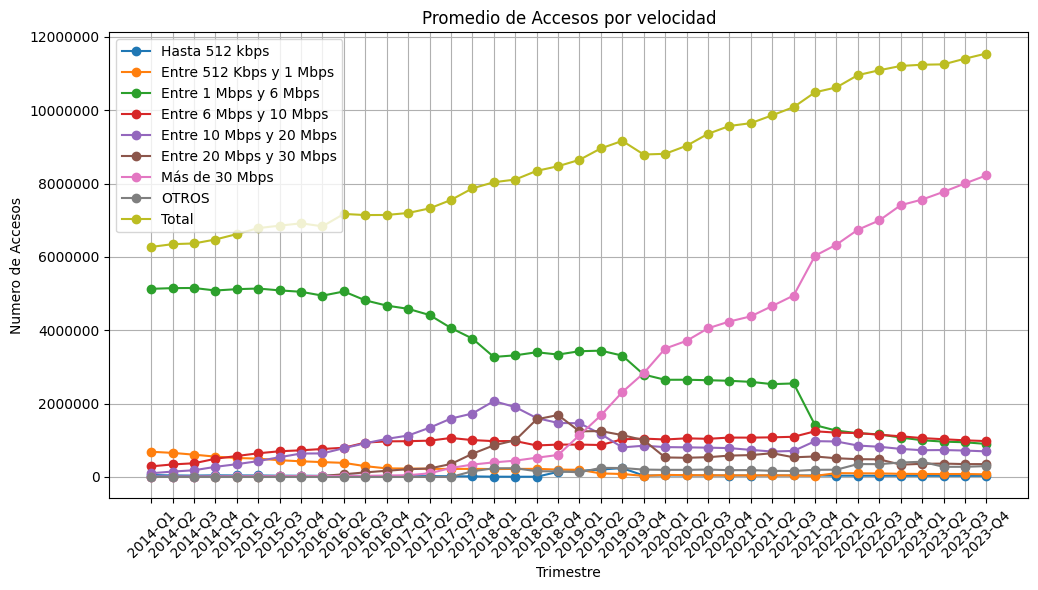

In [101]:
df_Totales_Accesos_por_velocidad_invertido = df_Totales_Accesos_por_velocidad.iloc[::-1]

plt.figure(figsize=(10, 6))
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Hasta 512 kbps'], marker='o', label='Hasta 512 kbps')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Entre 512 Kbps y 1 Mbps'], marker='o', label='Entre 512 Kbps y 1 Mbps')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Entre 1 Mbps y 6 Mbps'], marker='o', label='Entre 1 Mbps y 6 Mbps')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Entre 6 Mbps y 10 Mbps'], marker='o', label='Entre 6 Mbps y 10 Mbps')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Entre 10 Mbps y 20 Mbps'], marker='o', label='Entre 10 Mbps y 20 Mbps')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Entre 20 Mbps y 30 Mbps'], marker='o', label='Entre 20 Mbps y 30 Mbps')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Más de 30 Mbps'], marker='o', label='Más de 30 Mbps')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['OTROS'], marker='o', label='OTROS')
plt.plot(df_Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + df_Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str), df_Totales_Accesos_por_velocidad_invertido['Total'], marker='o', label='Total')

plt.title('Promedio de Accesos por velocidad')
plt.xlabel('Trimestre')
plt.ylabel('Numero de Accesos')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()

El archivo nos permite observar una clara tendencia a aumentar la velocidad de internet a nivel nacional.

Se puede observar una baja de accesos entre 1 y 6 Mbps al mismo tiempo que una subida de accesos de Mas de 30 Mbps mientras el total de accesos sigue creciendo, indicando una posible correlatividad.

### Accesos Por Velocidad


In [102]:
df_Accesos_por_velocidad = pd.read_excel(internet_sheets, sheet_name='Accesos por velocidad')

df_Accesos_por_velocidad.info()
df_Accesos_por_velocidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    float64
 4   + 512 Kbps - 1 Mbps  960 non-null    float64
 5   + 1 Mbps - 6 Mbps    960 non-null    float64
 6   + 6 Mbps - 10 Mbps   960 non-null    float64
 7   + 10 Mbps - 20 Mbps  960 non-null    float64
 8   + 20 Mbps - 30 Mbps  960 non-null    float64
 9   + 30 Mbps            960 non-null    float64
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB


Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          4     Buenos Aires       26,909.00            23,962.00   
1  2024          4  Capital Federal          516.00             4,544.00   
2  2024          4        Catamarca           71.00               209.00   
3  2024          4            Chaco          236.00               477.00   
4  2024          4           Chubut          111.00             1,088.00   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0         228,393.00          239,339.00           246,144.00   
1          26,409.00           48,083.00            33,925.00   
2           3,065.00            3,734.00             4,423.00   
3          14,811.00           10,361.00             6,247.00   
4          44,276.00           31,402.00            22,843.00   

   + 20 Mbps - 30 Mbps    + 30 Mbps     OTROS        Total  
0           110,876.00 4,042,646.00 93,351.00 5,011,620.00  
1             5,829.00 1,355,061.00      0.00 1,474,367.00  
2             1,827.00    61,181.00     77.00    74,587.00  
3             5,729.00   105,485.00  4,040.00   147,386.00  
4            20,196.00    33,665.00 16,589.00   170,170.00

In [103]:
filas_con_nulos = df_Accesos_por_velocidad[df_Accesos_por_velocidad.isnull().any(axis=1)]
filas_con_nulos

Año  Trimestre         Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
433  2019          2   Capital Federal           74.00             1,027.00   
443  2019          2          La Rioja            9.00                11.00   
444  2019          2           Mendoza           20.00             2,522.00   
451  2019          2        Santa Cruz           25.00                84.00   
454  2019          2  Tierra Del Fuego            6.00               123.00   
455  2019          2           Tucumán           16.00               157.00   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
433         281,370.00          124,087.00           239,691.00   
443          39,819.00            4,297.00             4,857.00   
444         205,165.00            2,971.00            10,092.00   
451          24,861.00            3,806.00             1,202.00   
454          41,824.00            4,241.00             1,573.00   
455          78,891.00           44,296.00            24,291.00   

     + 20 Mbps - 30 Mbps  + 30 Mbps  OTROS        Total  
433           296,155.00 475,991.00    NaN 1,418,395.00  
443                13.00   1,298.00    NaN    50,304.00  
444             1,256.00     234.00    NaN   222,260.00  
451                28.00       4.00    NaN    30,010.00  
454                96.00      32.00    NaN    47,895.00  
455               628.00  18,394.00    NaN   166,673.00

Se encontraron valores nulos en la columna 'OTROS', tras observar el formato y las caracteristicas de los datos se decide llenar los valores faltantes con 0.

Ademas se encontro un error en la columna año, nos aseguramos que no haya otros y lo corregimos.

In [104]:
# Se rrellenan los valores faltantes con 0
df_Accesos_por_velocidad.fillna(0, inplace=True)

# Se aplica la funcion de estandarizacion de años
df_Accesos_por_velocidad['Año'] = df_Accesos_por_velocidad['Año'].apply(regulacion_año)

valores_unicos = df_Accesos_por_velocidad['Año'].value_counts()

print(valores_unicos)
df_Totales_Accesos_por_velocidad.info()

df_Accesos_por_velocidad.info()
df_Accesos_por_velocidad.head()

Año
2023    96
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      40 non-null     int64
 1   Trimestre                40 non-null     int64
 2   Hasta 512 kbps           40 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  40 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    40 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   40 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  40 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  40 non-null     int64
 8   Más de 30 Mbps           40 non-null     int64
 9   OTROS                    40 non-null     int64
 10  Total                    40 non-null     int64
dtypes: int64(11)
memory usage: 3.6 KB
<class 'pandas.core.frame.DataFrame'>
Rang

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2023          4     Buenos Aires       26,909.00            23,962.00   
1  2023          4  Capital Federal          516.00             4,544.00   
2  2023          4        Catamarca           71.00               209.00   
3  2023          4            Chaco          236.00               477.00   
4  2023          4           Chubut          111.00             1,088.00   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0         228,393.00          239,339.00           246,144.00   
1          26,409.00           48,083.00            33,925.00   
2           3,065.00            3,734.00             4,423.00   
3          14,811.00           10,361.00             6,247.00   
4          44,276.00           31,402.00            22,843.00   

   + 20 Mbps - 30 Mbps    + 30 Mbps     OTROS        Total  
0           110,876.00 4,042,646.00 93,351.00 5,011,620.00  
1             5,829.00 1,355,061.00      0.00 1,474,367.00  
2             1,827.00    61,181.00     77.00    74,587.00  
3             5,729.00   105,485.00  4,040.00   147,386.00  
4            20,196.00    33,665.00 16,589.00   170,170.00

La hoja es muy similar a la anterior, pero agregando un desglosamiento mas profundo de los datos, dividiendolo por provincias.

### Ingresos

In [105]:
df_Ingresos_pes = pd.read_excel(internet_sheets, sheet_name='Ingresos')

# Debido al tamaño de los numeros en la columna Ingresos utilizamos el siguiente codigo para evotar problemas de visualizacion
pd.options.display.float_format = '{:,.2f}'.format 

df_Ingresos_pes.info()
df_Ingresos_pes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2023          4             167,376,014.80   Oct-Dic 2023
1  2023          3             133,106,593.41  Jul-Sept 2023
2  2023          2             118,060,280.28   Jun-Mar 2023
3  2033          1             104,134,992.81   Ene-Mar 2023
4  2022          4              72,443,482.99   Oct-Dic 2022

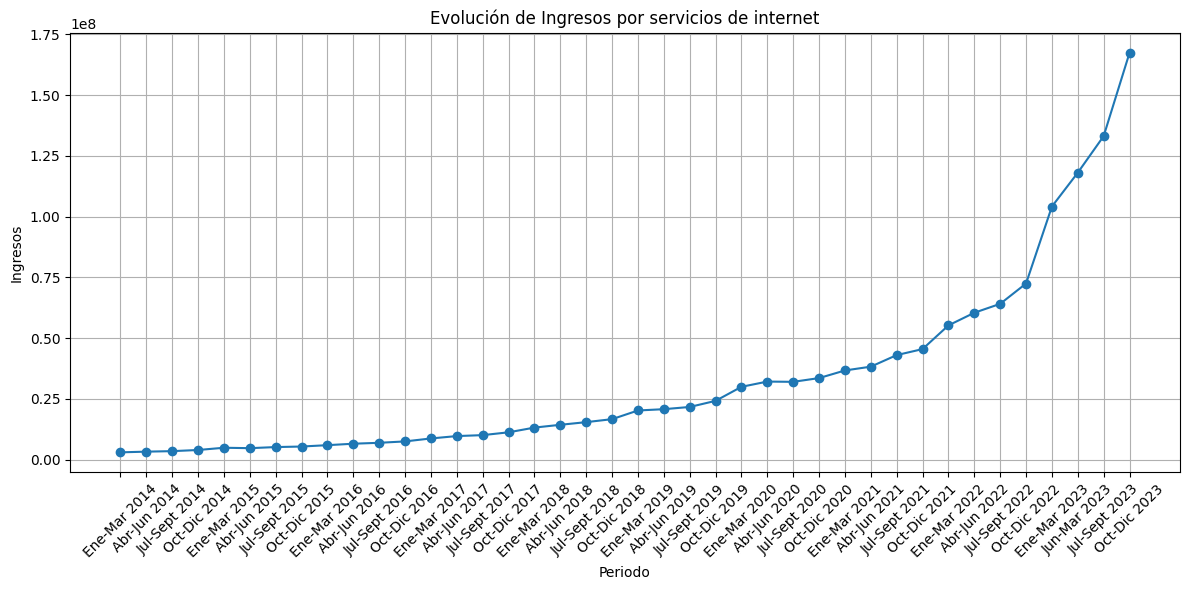

In [106]:
df_Ingresos_invertido = df_Ingresos_pes.iloc[::-1]

plt.figure(figsize=(12, 6))
plt.plot(df_Ingresos_invertido['Periodo'], df_Ingresos_invertido['Ingresos (miles de pesos)'], marker='o', label='Ingresos (miles de pesos)')

plt.title('Evolución de Ingresos por servicios de internet')
plt.xlabel('Periodo')
plt.ylabel('Ingresos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede observar un aumento importante en el ingreso generado por los servicios de internet, sinembargo es consistente con la cantidad de accesos y la mejora de velosidad de internet. Ademas al ser un lapso de 10 años medido con la misma moneda (peso argentino) se deberia hacer una investigacion exahustiva sobre la correlacion entre la devaluacion del peso y el aumento de las ganancias.

## Archivos Adicionales

### tipos-de-cambio-historicos

In [107]:
df_peso_dolar = pd.read_csv('../Data/tipos-de-cambio-historicos.csv')

df_peso_dolar.info()
df_peso_dolar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19899 entries, 0 to 19898
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   indice_tiempo              19899 non-null  object 
 1   dolar_tipo_unico           817 non-null    float64
 2   dolar_finan_esp_compra     192 non-null    float64
 3   dolar_finan_esp_venta      192 non-null    float64
 4   dolar_financiero_compra    1994 non-null   float64
 5   dolar_financiero_venta     1994 non-null   float64
 6   dolar_libre_compra         4998 non-null   float64
 7   dolar_libre_venta          4827 non-null   float64
 8   dolar_oficial_compra       1022 non-null   float64
 9   dolar_oficial_venta        1022 non-null   float64
 10  dolar_estadounidense       11860 non-null  float64
 11  dolar_referencia_com_3500  8153 non-null   float64
dtypes: float64(11), object(1)
memory usage: 1.8+ MB


indice_tiempo  dolar_tipo_unico  dolar_finan_esp_compra  \
0    1970-01-05              3.50                     NaN   
1    1970-01-06              3.50                     NaN   
2    1970-01-07              3.50                     NaN   
3    1970-01-08              3.50                     NaN   
4    1970-01-09              3.50                     NaN   

   dolar_finan_esp_venta  dolar_financiero_compra  dolar_financiero_venta  \
0                    NaN                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   

   dolar_libre_compra  dolar_libre_venta  dolar_oficial_compra  \
0                 NaN                NaN                   NaN   
1                 NaN                NaN                   NaN   
2                 NaN                NaN                   NaN   
3                 NaN                NaN                   NaN   
4                 NaN                NaN                   NaN   

   dolar_oficial_venta  dolar_estadounidense  dolar_referencia_com_3500  
0                  NaN                   NaN                        NaN  
1                  NaN                   NaN                        NaN  
2                  NaN                   NaN                        NaN  
3                  NaN                   NaN                        NaN  
4                  NaN                   NaN                        NaN

Este archivo contiene el valor del peso respecto al dolar segun los diferentes tipos de cambio a lo largo de la historia de argentina.

Esta extraido de la pagina 'https://datos.gob.ar/'.

Los datos son interesantes pero deben ser reducidos, solo nos interesan las fechas que cubren los anteriores archivos, agrupados por trimestre y hay que hacer una limpieza de valores nulos.

In [108]:
df_peso_dolar['indice_tiempo'] = pd.to_datetime(df_peso_dolar['indice_tiempo'])
print(f'Ahora la columna esta correctamente formateada como una fecha.\n')

df_peso_dolar = df_peso_dolar.loc[df_peso_dolar['indice_tiempo'] >= '2014-01-01']
df_peso_dolar = df_peso_dolar.loc[df_peso_dolar['indice_tiempo'] <= '2023-12-31']
print(f'Ahora el dataset solo contiene valores entre Inicios de 2014 y fines de 2023, al igual que el resto.\n')

df_peso_dolar = df_peso_dolar.dropna(axis=1, how='all')
print('Se eliminaron las columnas que tengan todos los valores nulos.\n')

df_peso_dolar.reset_index(drop=True, inplace=True)

df_peso_dolar['Periodo'] = df_peso_dolar['indice_tiempo'].dt.to_period('Q')
df_dolar_trimestral = df_peso_dolar.groupby('Periodo')['dolar_estadounidense'].max().reset_index()
df_peso_dolar.drop(columns='Periodo', inplace=True)

df_dolar_trimestral.columns = ['Periodo', 'Dolar']
print('Se agrupo los valores por trimestre.\n')

df_dolar_trimestral.info()
df_dolar_trimestral.head()

Ahora la columna esta correctamente formateada como una fecha.

Ahora el dataset solo contiene valores entre Inicios de 2014 y fines de 2023, al igual que el resto.

Se eliminaron las columnas que tengan todos los valores nulos.

Se agrupo los valores por trimestre.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   Periodo  40 non-null     period[Q-DEC]
 1   Dolar    40 non-null     float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 772.0 bytes


Periodo  Dolar
0  2014Q1   8.02
1  2014Q2   8.13
2  2014Q3   8.47
3  2014Q4   8.56
4  2015Q1   8.82

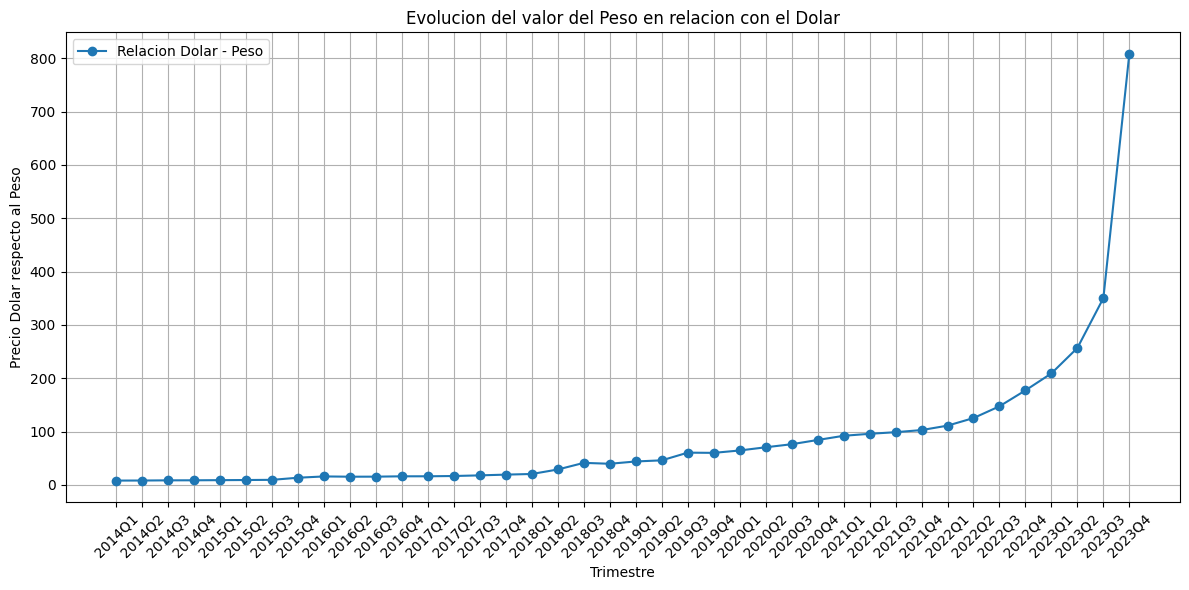

In [109]:
df_dolar_trimestral['Periodo'] = df_dolar_trimestral['Periodo'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(df_dolar_trimestral['Periodo'], df_dolar_trimestral['Dolar'], marker='o', label='Relacion Dolar - Peso')

plt.title('Evolucion del valor del Peso en relacion con el Dolar')
plt.xlabel('Trimestre')
plt.ylabel('Precio Dolar respecto al Peso')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Unificacion de Datos

Unificamos los datos que consideramos valiosos en una sola tabla:
- Accesos Por Tecnología
- Velocidad % por prov
- Dial-BAf
- Penetracion-hogares
- Penetración-poblacion
- Accesos por velocidad

In [110]:
df = pd.merge(df_Accesos_tecnologia.rename(columns={'Otros':'Otras Tecnologias'}), df_Velocidad_por_prov, on=['Año', 'Trimestre', 'Provincia'], how='inner')
df = pd.merge(df, df_Dial_BAf.drop(columns='Total'), on=['Año', 'Trimestre', 'Provincia'], how='left')
df = pd.merge(df, df_Penetracion_hogares, on=['Año', 'Trimestre', 'Provincia'], how='left')
df = pd.merge(df, df_Penetracion_poblacion.drop(columns='Periodo'), on=['Año', 'Trimestre', 'Provincia'], how='left')
df = pd.merge(df, df_Accesos_por_velocidad.drop(columns='Total').rename(columns={'OTROS':'Otras Velocidades'}), on=['Año', 'Trimestre', 'Provincia'], how='left')
df['Periodo'] = df['Año'].astype(str) + ' - Q' + df['Trimestre'].astype(str)

#Rotamos para que queden las primeras fechas primeras (facilitar graficos)
df = df[::-1]

df

Año  Trimestre            Provincia       ADSL   Cablemodem  \
959  2014          1              Tucumán 129,717.00        83.00   
958  2014          1     Tierra Del Fuego  21,618.00     2,837.00   
957  2014          1  Santiago Del Estero  32,567.00     3,598.00   
956  2014          1             Santa Fe 322,662.00   174,296.00   
955  2014          1           Santa Cruz  18,927.00       100.00   
..    ...        ...                  ...        ...          ...   
4    2023          4               Chubut  26,306.00    77,217.00   
3    2023          4                Chaco  14,000.00    60,277.00   
2    2023          4            Catamarca   6,669.00    11,016.00   
1    2023          4      Capital Federal  58,700.00 1,198,835.00   
0    2023          4         Buenos Aires 223,391.00 2,797,700.00   

     Fibra óptica   Wireless  Otras Tecnologias  Mbps (Media de bajada)  \
959        121.00      13.00              98.00                    3.21   
958        648.00       1.00           2,934.00                    3.45   
957         19.00     915.00              34.00                    2.95   
956      3,059.00   5,951.00             644.00                    3.15   
955        381.00   4,092.00           3,264.00                    3.32   
..            ...        ...                ...                     ...   
4       26,174.00  30,543.00           9,930.00                   20.29   
3       62,301.00   8,404.00           2,404.00                  107.14   
2       55,437.00   1,384.00              81.00                   89.40   
1      182,520.00   4,492.00          29,820.00                  234.44   
0    1,784,593.00 137,993.00          67,943.00                  158.49   

     Banda ancha fija  ...  Accesos por cada 100 hab  HASTA 512 kbps  \
959            129944  ...                      8.31            6.00   
958             27272  ...                     19.10           12.00   
957             37124  ...                      4.06        1,234.00   
956            506000  ...                     15.08        8,456.00   
955             26304  ...                      8.68          161.00   
..                ...  ...                       ...             ...   
4              169313  ...                     26.04          111.00   
3              147381  ...                     11.85          236.00   
2               74586  ...                     17.46           71.00   
1             1472317  ...                     47.80          516.00   
0             5005720  ...                     27.68       26,909.00   

     + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
959            34,672.00          83,210.00           11,779.00   
958               607.00          30,902.00                6.00   
957            10,531.00          22,817.00            2,422.00   
956           124,468.00         345,225.00           20,328.00   
955             1,625.00          24,972.00                1.00   
..                   ...                ...                 ...   
4               1,088.00          44,276.00           31,402.00   
3                 477.00          14,811.00           10,361.00   
2                 209.00           3,065.00            3,734.00   
1               4,544.00          26,409.00           48,083.00   
0              23,962.00         228,393.00          239,339.00   

     + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps    + 30 Mbps  Otras Velocidades  \
959               362.00                 3.00         0.00               0.00   
958                 0.00                 0.00         0.00               0.00   
957               109.00                 0.00         0.00               0.00   
956             6,845.00                23.00       668.00               0.00   
955                 1.00                 0.00         0.00               0.00   
..                   ...                  ...          ...                ...   
4              22,843.00            20,

Adicionalmente creamos una tabla suplementaria con el historico del pais con los ingresos dolarizados.

In [111]:
# Corregimos el formato de las columnas para unir los datos correctamente
df_Ingresos = df_Ingresos_pes
df_Ingresos['Periodo'] = df_Ingresos_pes['Año'].astype(str) + 'Q' + df_Ingresos_pes['Trimestre'].astype(str)
df_dolar_trimestral['Periodo'] = df_dolar_trimestral['Periodo'].astype(str)

# Unimos el historico de ingresos en pesos con el historico de precio del dolar
df_Ingresos = pd.merge(df_Ingresos, df_dolar_trimestral, on=['Periodo'], how='inner')

# Desestimamos las columnas innecesarias
df_Ingresos.drop(columns='Periodo', inplace=True)

# Hacemos el calculo de ingresos dolarizado
df_Ingresos['Ingresos (dolares)'] = df_Ingresos['Ingresos (miles de pesos)'] / df_Ingresos['Dolar']

df_Ingresos = df_Ingresos[::-1]

df_Ingresos

Año  Trimestre  Ingresos (miles de pesos)  Dolar  Ingresos (dolares)
38  2014          1               2,984,054.21   8.02          372,308.70
37  2014          2               3,270,816.20   8.13          402,166.02
36  2014          3               3,478,637.74   8.47          410,652.55
35  2014          4               3,950,440.78   8.56          461,661.89
34  2015          1               4,876,385.32   8.82          552,752.81
33  2015          2               4,701,790.72   9.09          517,362.54
32  2015          3               5,153,738.88   9.42          546,989.90
31  2015          4               5,376,899.21  13.40          401,261.13
30  2016          1               5,936,844.89  15.80          375,749.68
29  2016          2               6,534,240.60  15.30          427,074.55
28  2016          3               6,912,441.54  15.39          449,151.50
27  2016          4               7,483,980.39  16.03          466,873.39
26  2017          1               8,701,201.42  16.08          541,119.49
25  2017          2               9,678,646.93  16.60          583,015.90
24  2017          3              10,065,997.86  17.80          565,505.50
23  2017          4              11,226,127.39  19.20          584,694.13
22  2018          1              13,171,459.23  20.41          645,343.42
21  2018          2              14,319,467.46  28.85          496,342.03
20  2018          3              15,410,980.69  41.25          373,599.53
19  2018          4              16,637,686.59  39.55          420,674.76
18  2019          1              20,207,413.77  43.87          460,620.33
17  2019          2              20,743,117.69  45.97          451,231.62
16  2019          3              21,652,748.44  60.40          358,489.21
15  2019          4              24,169,250.70  59.99          402,887.99
14  2020          1              29,946,216.45  64.47          464,505.68
13  2020          2              32,102,475.99  70.46          455,612.77
12  2020          3              31,997,444.53  76.18          420,024.21
11  2020          4              33,539,702.72  84.15          398,570.44
10  2021          1              36,676,371.36  92.00          398,656.21
9   2021          2              38,239,666.63  95.72          399,495.05
8   2021          3              42,999,944.29  98.74          435,486.57
7   2021          4              45,467,887.17 102.72          442,639.09
6   2022          1              55,219,313.01 111.01          497,426.48
5   2022          2              60,419,500.62 125.23          482,468.26
4   2022          3              64,086,784.33 147.32          435,017.54
3   2022          4              72,443,482.99 177.16          408,915.57
2   2023          2             118,060,280.28 256.70          459,915.39
1   2023          3             133,106,593.41 350.10          380,195.93
0   2023          4             167,376,014.80 808.45          207,033.20

# Analisis Profundo y EDA

En este analisis observaremos los Outliers, Patrones, Analisis Predictivos y posibles KPI.

## Graficas del Analisis

Primero repasemos la cantidad de accesos por trimestre.

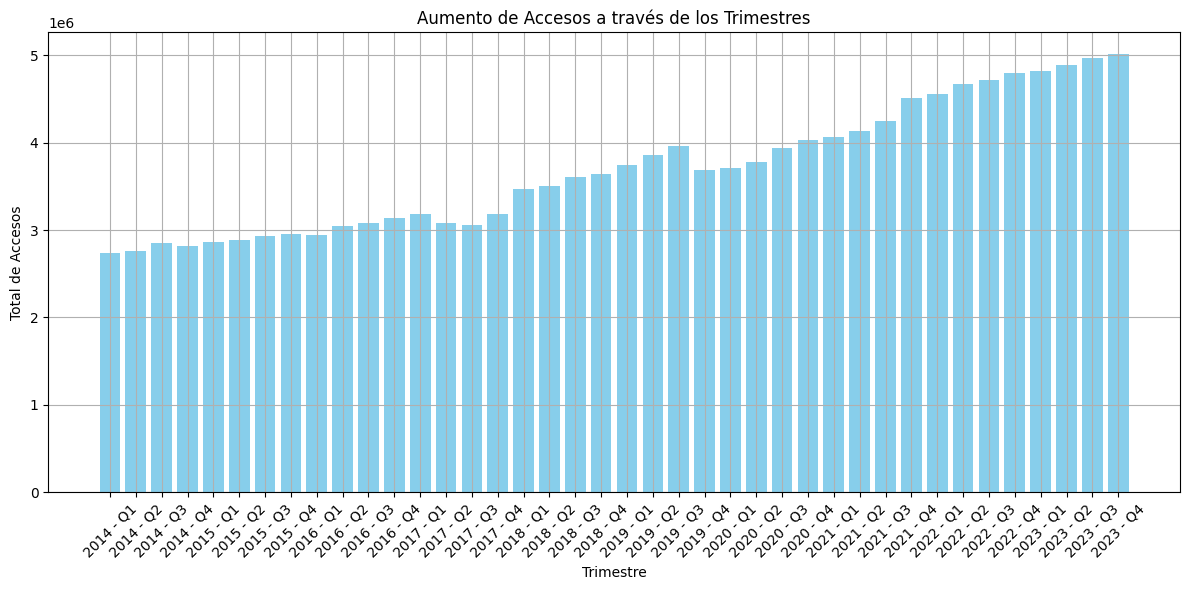

In [112]:
# Lista con todos los tipos de accesos para calcular un total sin agregar columna nueva
accesos = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']
accesos_tot = df[accesos].sum(axis=1)

plt.figure(figsize=(12, 6))

plt.bar(df['Periodo'], accesos_tot, color='skyblue')

plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos')
plt.title('Aumento de Accesos a través de los Trimestres')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

Podemos encontrar un patron interesante de estancamiento en dos puntos:
1. Entre 2016 - Q4 y 2017 - Q3
2. Entre 2019 - Q2 y 2020 - Q2

Ambos son coincidentes con cambios fuertes en la direccion del gobierno nacional.

Exceptuando esos dos puntos se nota un crecimiento  relativamente constante, pero no hay informaicon si el crecimiento es acorde al aumento poblacional/de vivienda.

Exploremos esa relacion.

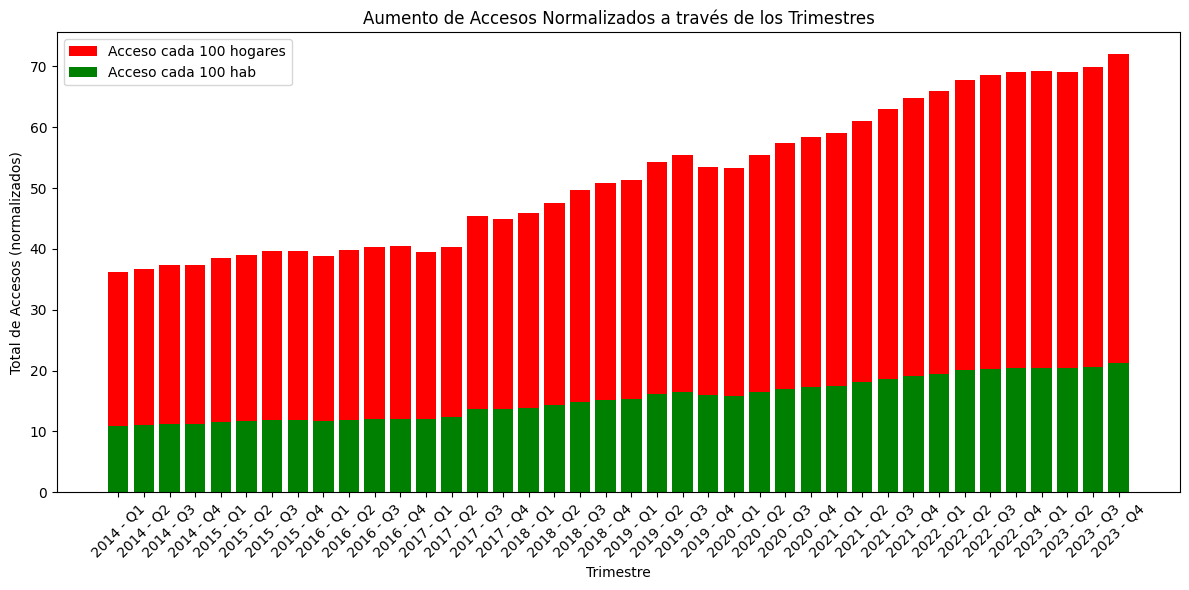

In [113]:
plt.figure(figsize=(12, 6))

promedio_accesos_por_100_hogares_nacional = df.groupby('Periodo')['Accesos por cada 100 hogares'].mean()
promedio_accesos_por_100_hab_nacional = df.groupby('Periodo')['Accesos por cada 100 hab'].mean()

plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hogares_nacional, color='red', label='Acceso cada 100 hogares')
plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hab_nacional, color='green', label='Acceso cada 100 hab')

# Añadir etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos (normalizados)')
plt.title('Aumento de Accesos Normalizados a través de los Trimestres')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

El nivel de penetracion en hogares/habitantes parece crecer de manera similar al numero total de Accesos.

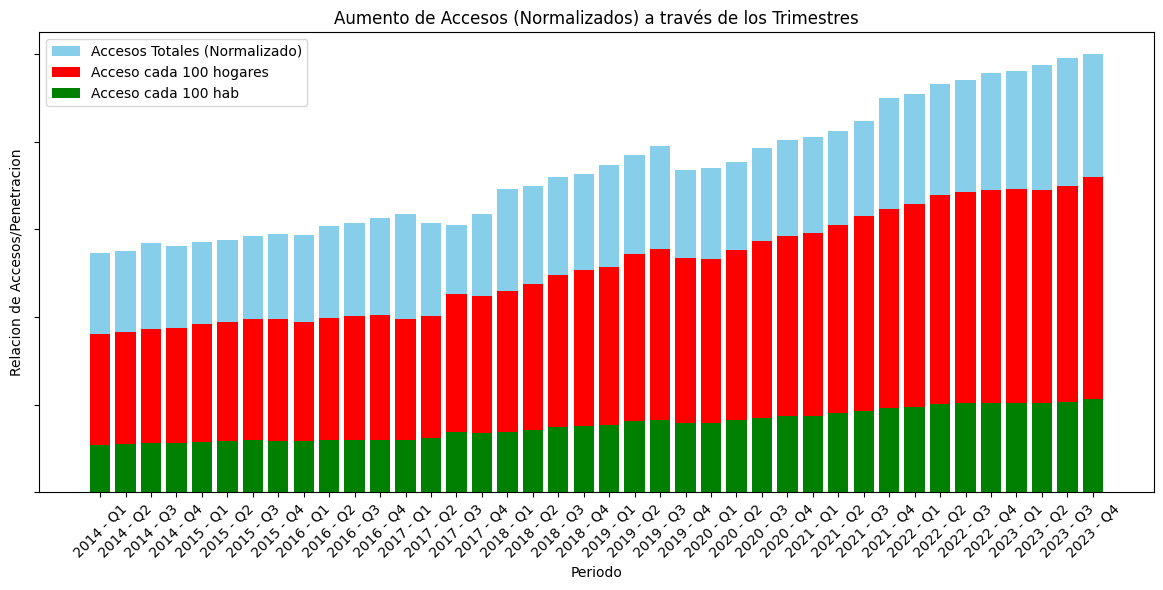

In [114]:
df_norma = df.copy()

# Suma y Normalizacion del total de accesos
df_norma['tot_accesos'] = df[accesos].sum(axis=1)
df_norma['tot_accesos'] = df_norma['tot_accesos']/df_norma['tot_accesos'].max() * 100

plt.figure(figsize=(12, 6))

# Acceso total normalizado
plt.bar(df_norma['Periodo'], df_norma['tot_accesos'], color='skyblue', label='Accesos Totales (Normalizado)')

# Accesos por 100 habitantes y 100 hogares
plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hogares_nacional, color='red', label='Acceso cada 100 hogares')
plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hab_nacional, color='green', label='Acceso cada 100 hab')


plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title('Aumento de Accesos (Normalizados) a través de los Trimestres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_yticklabels([])
plt.legend()
plt.show()

En el grafico podemos observar que el aumento de accesos a nivel nacional prece tener correlacion directa con el nivel de penetracion en hogares/habitantes.

Analizamos mas en profundidad haciendo la misma observacion sobre cada provincia individual.

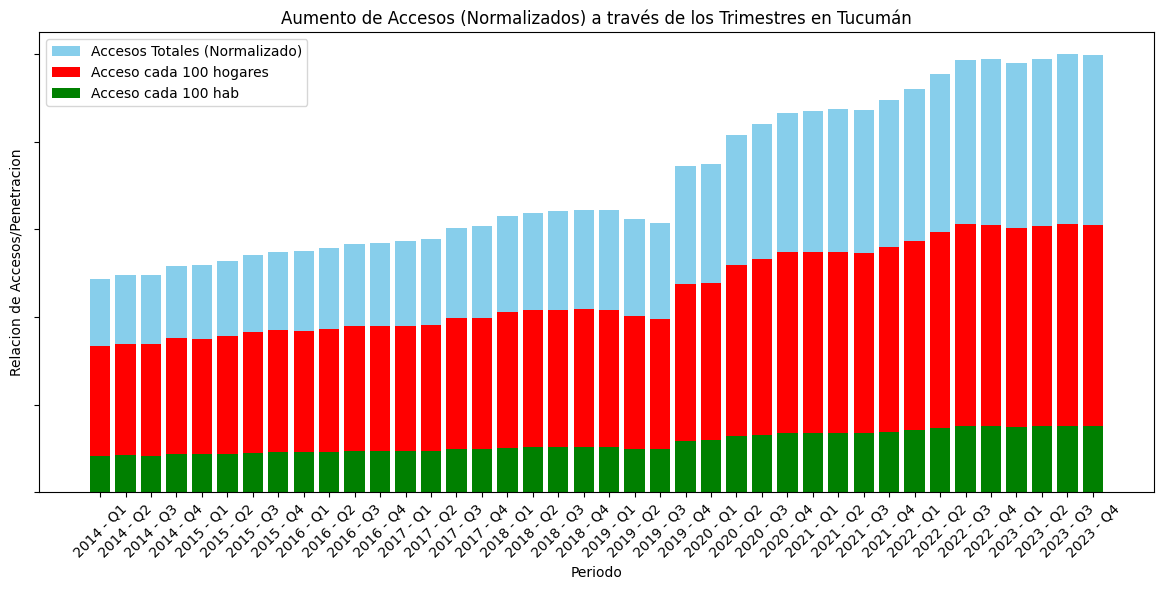

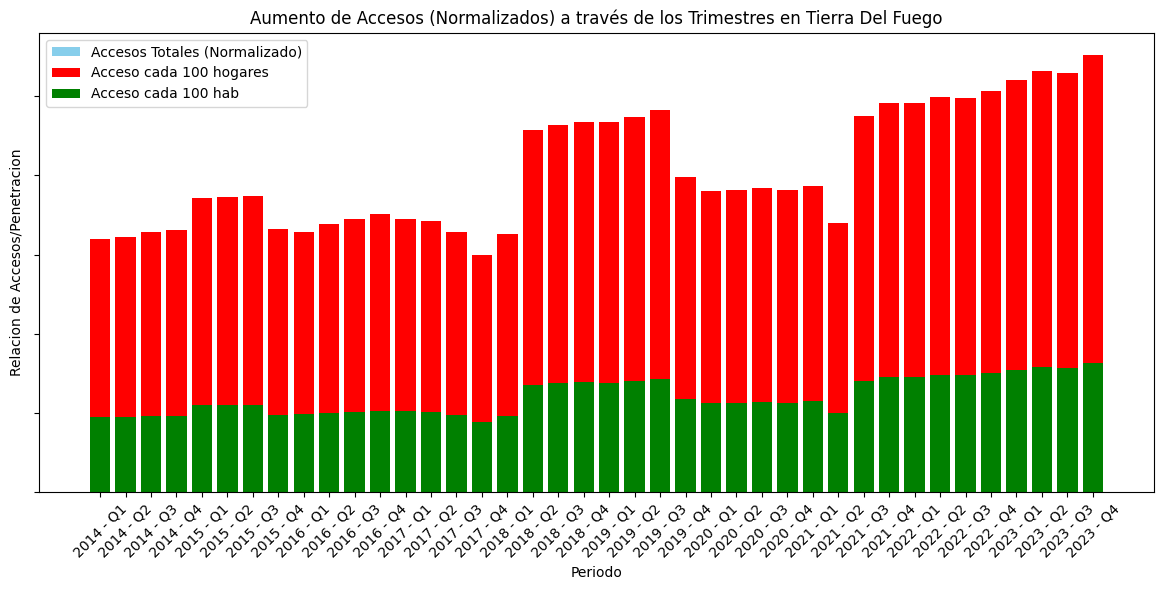

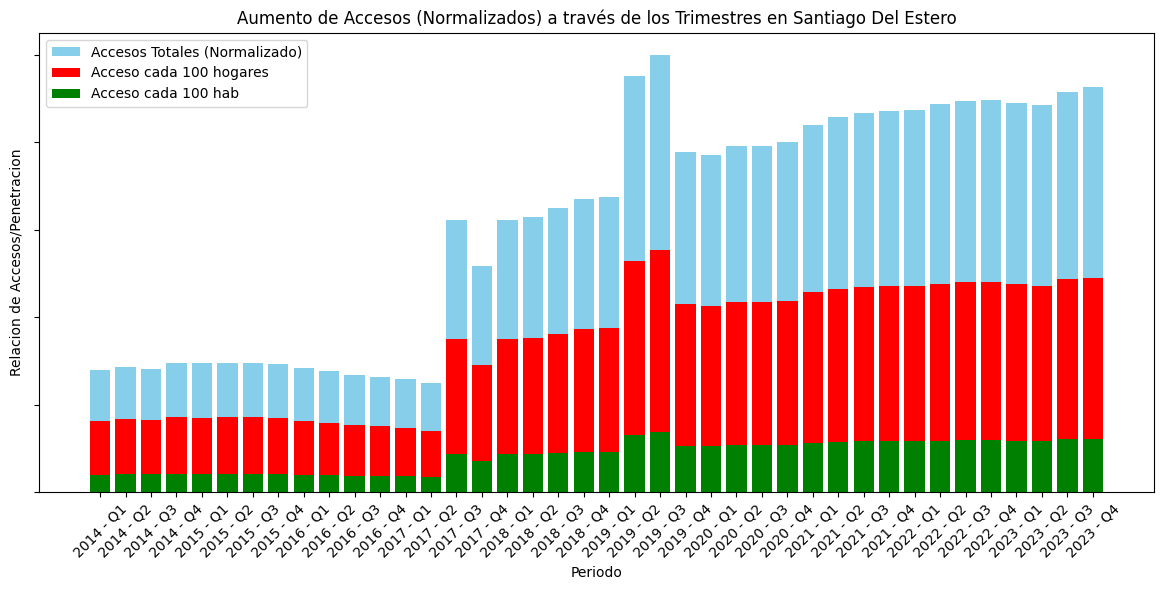

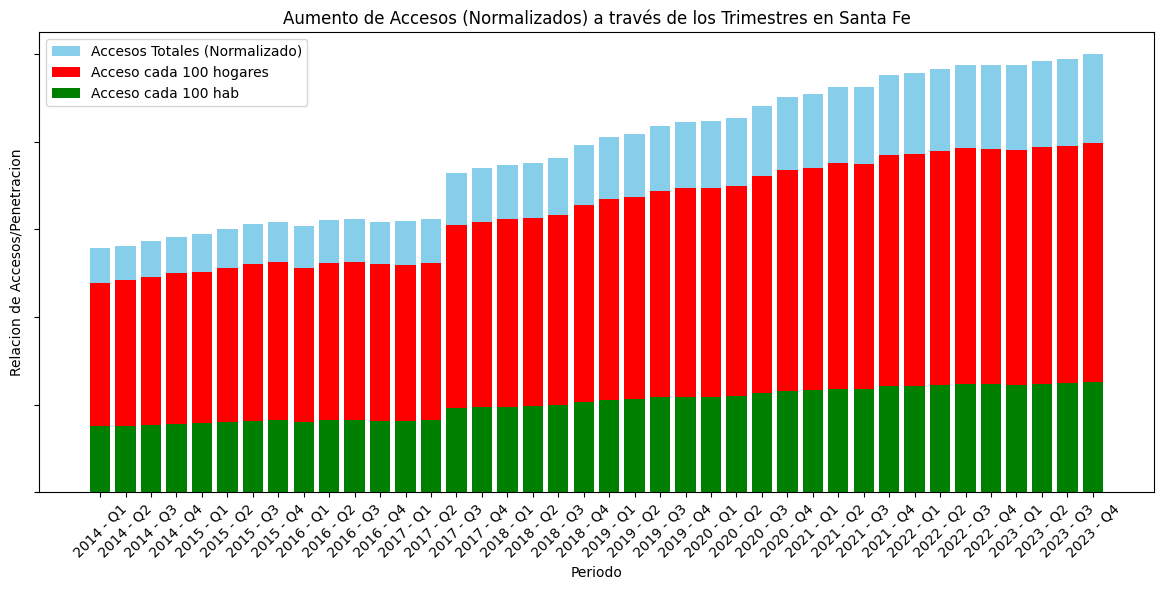

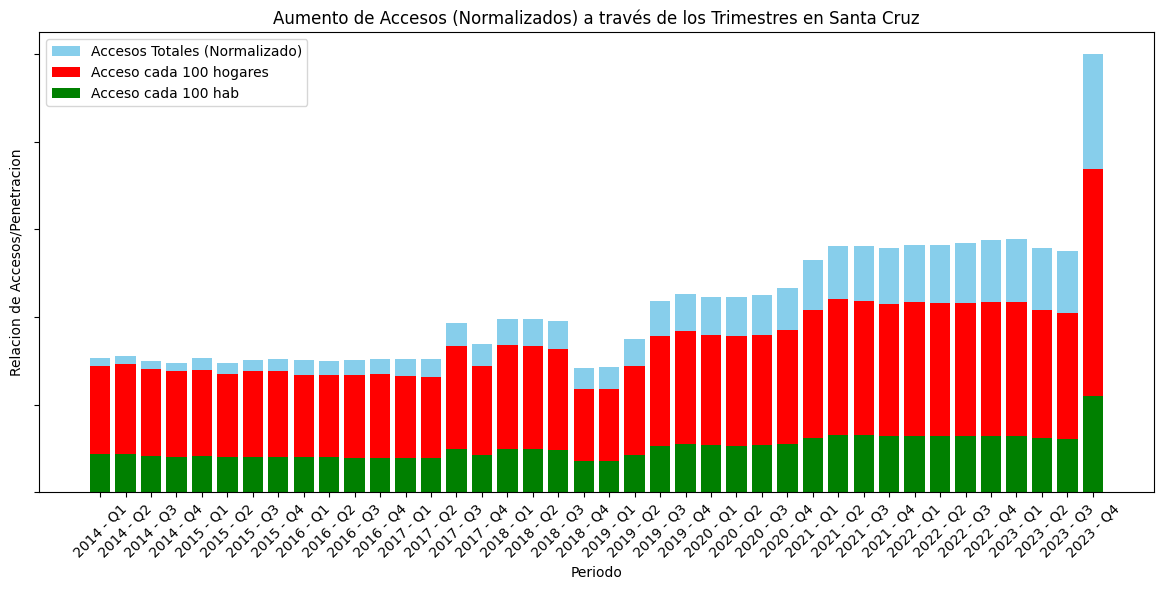

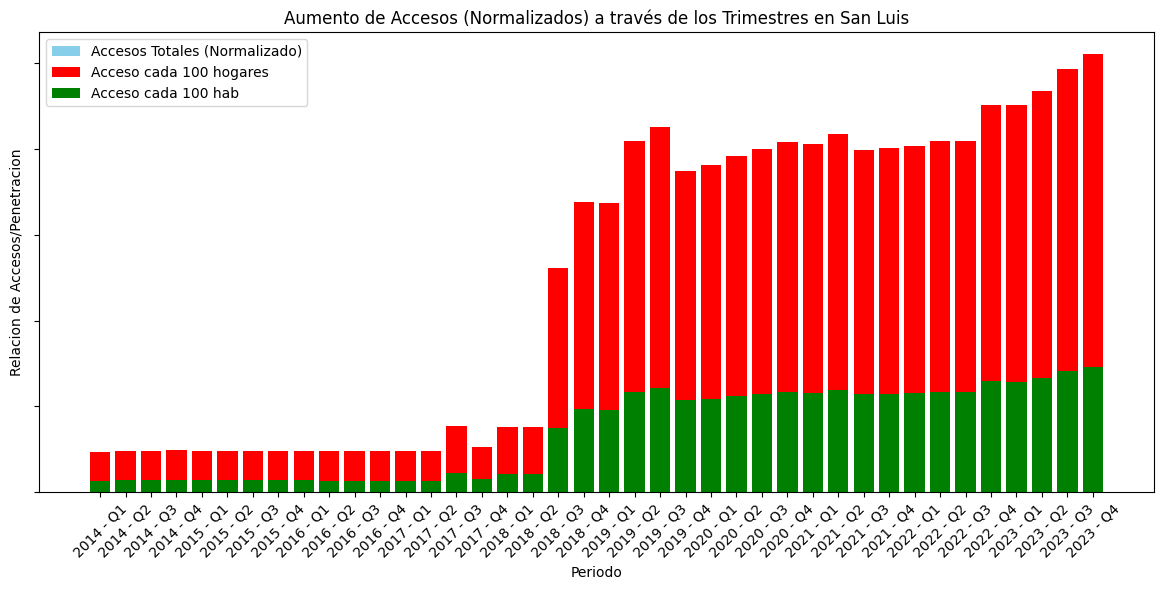

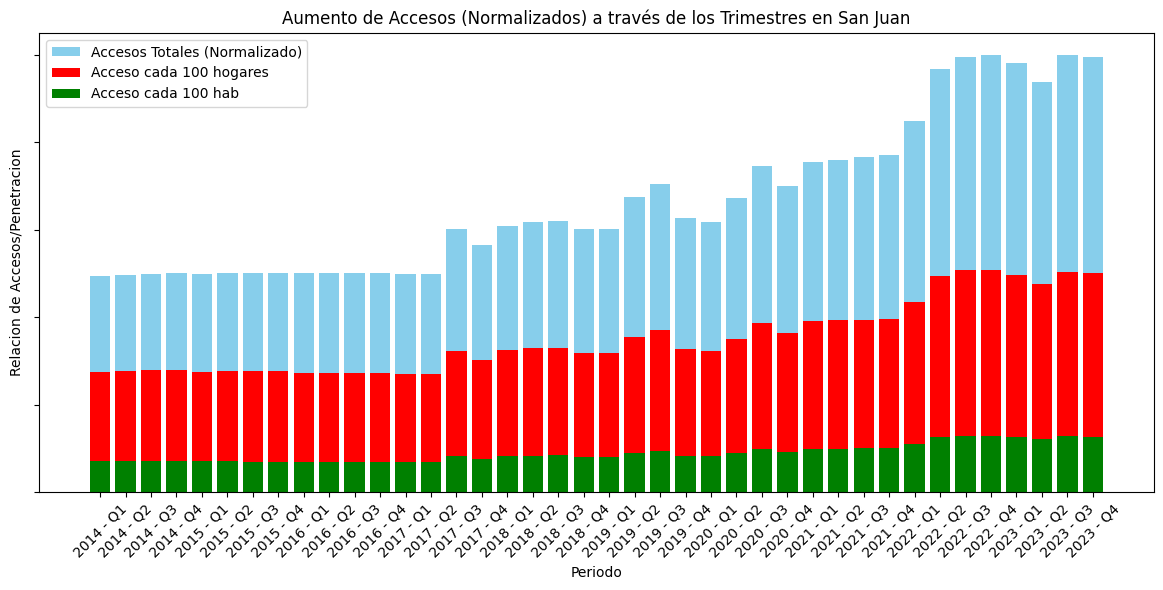

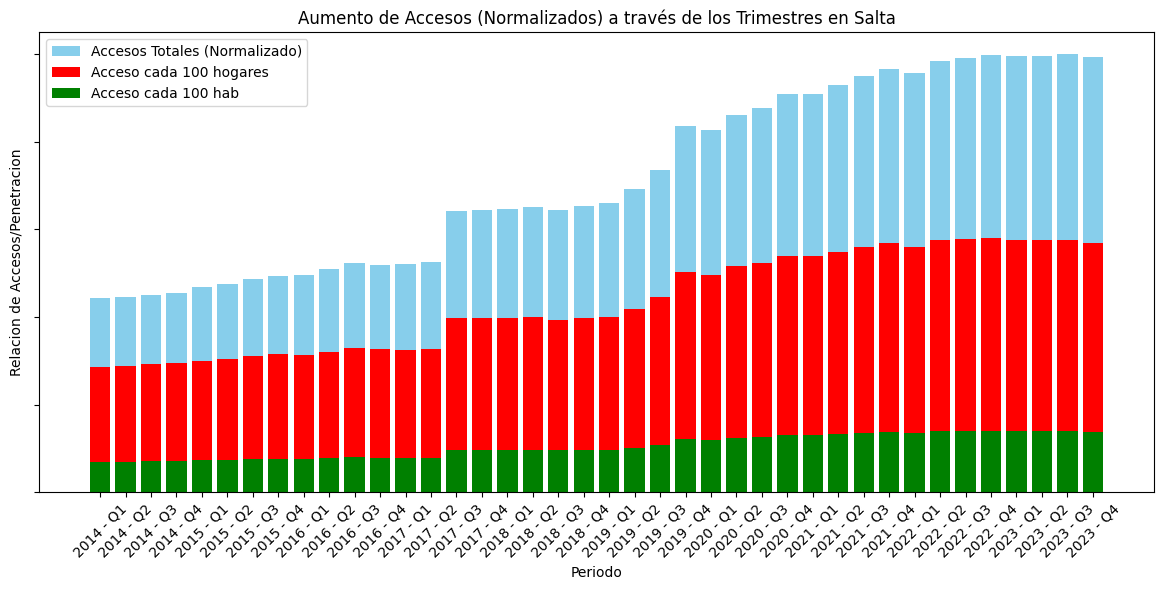

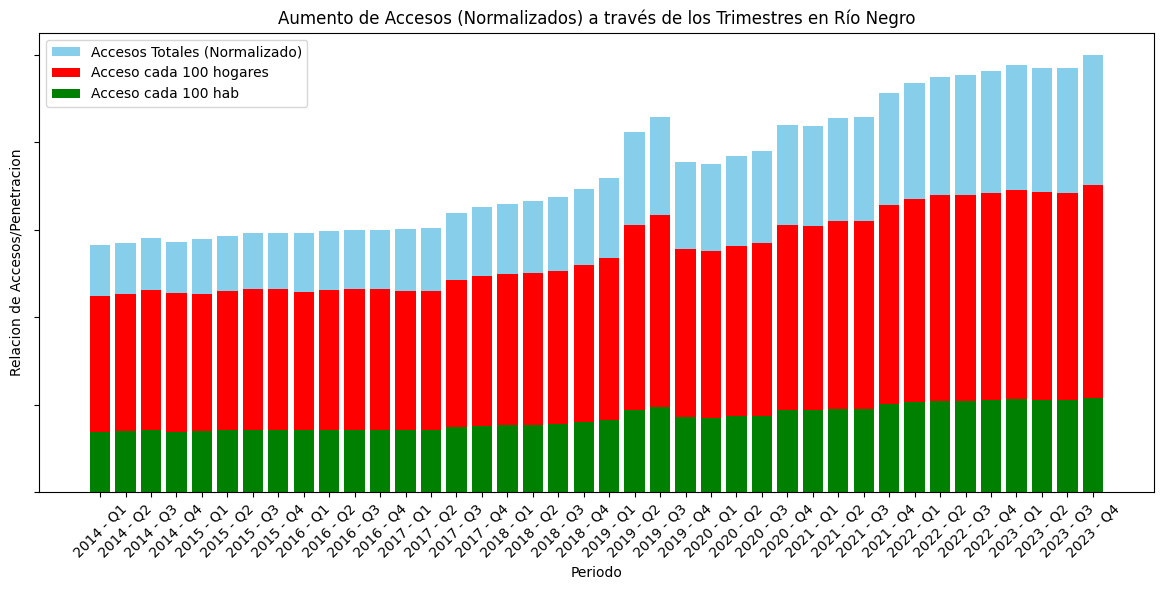

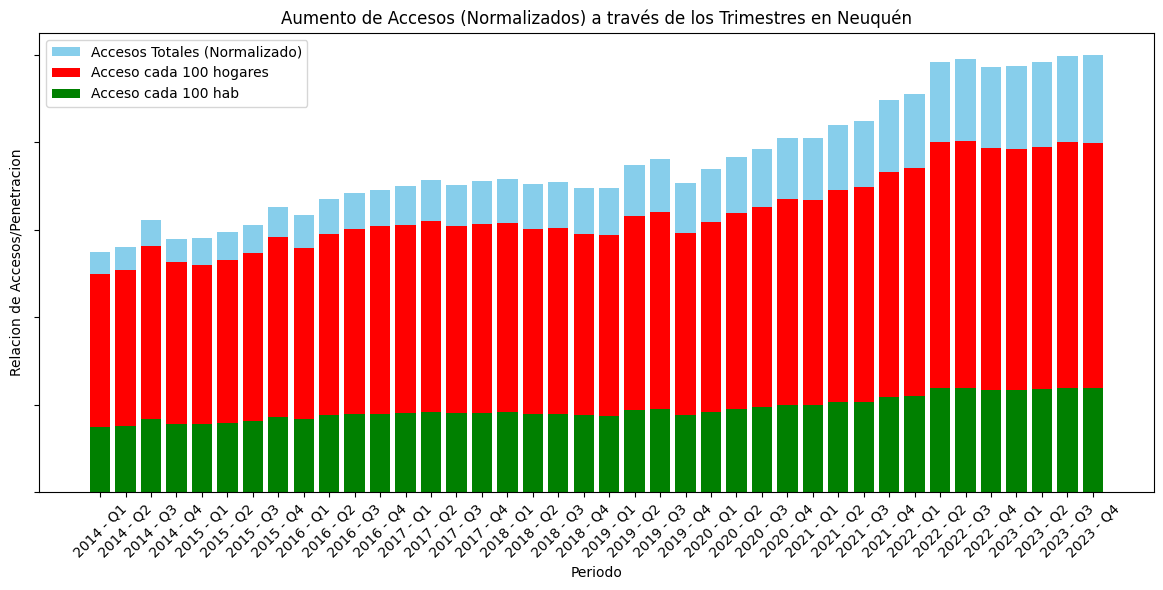

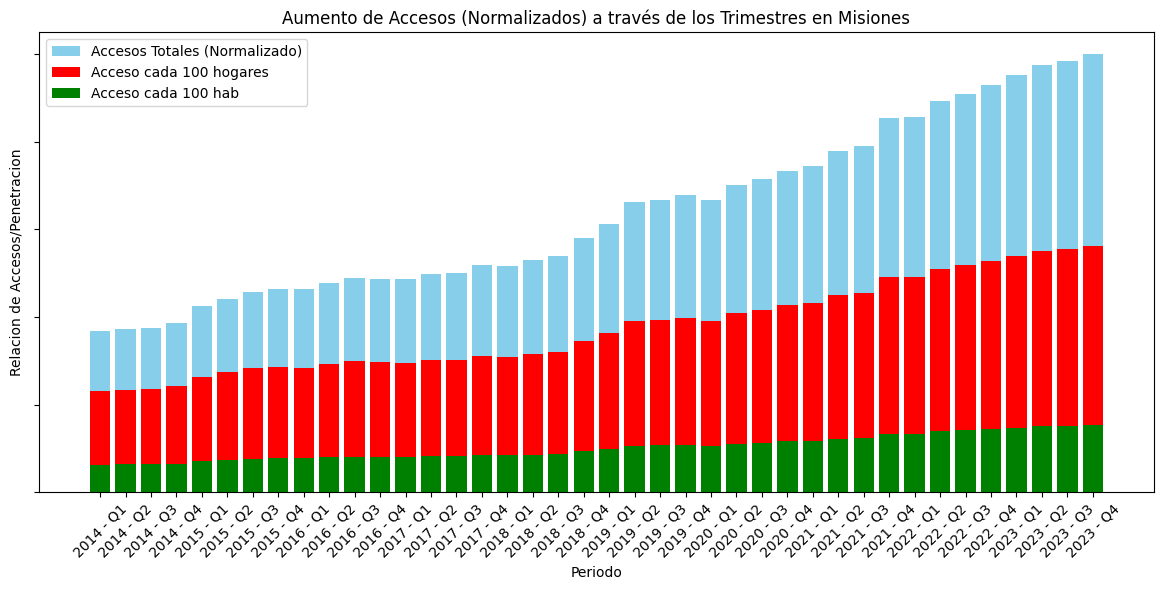

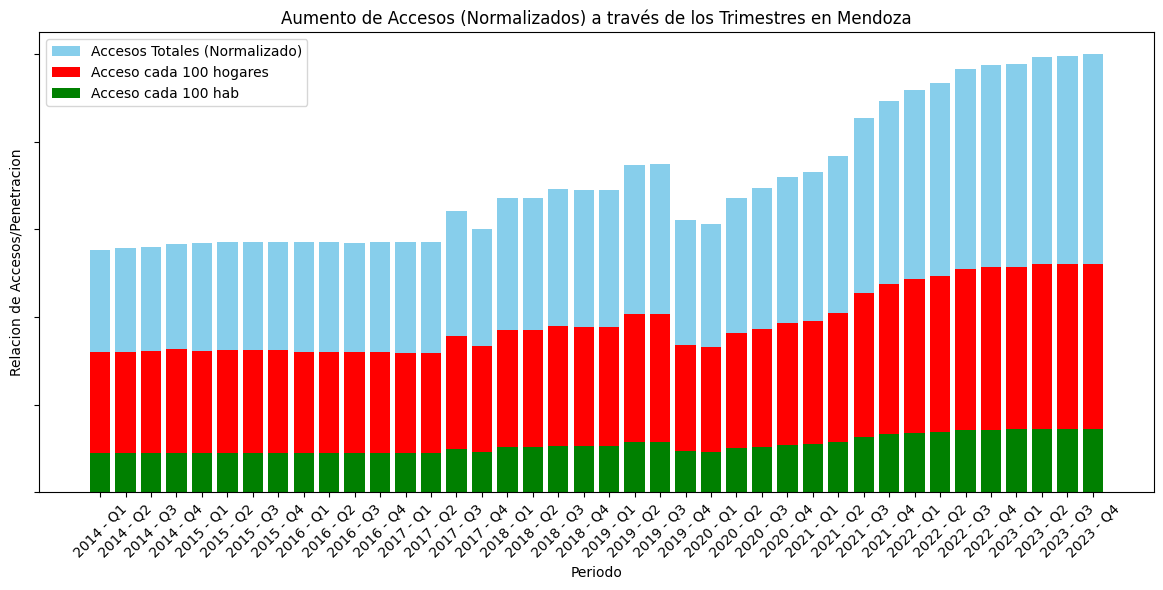

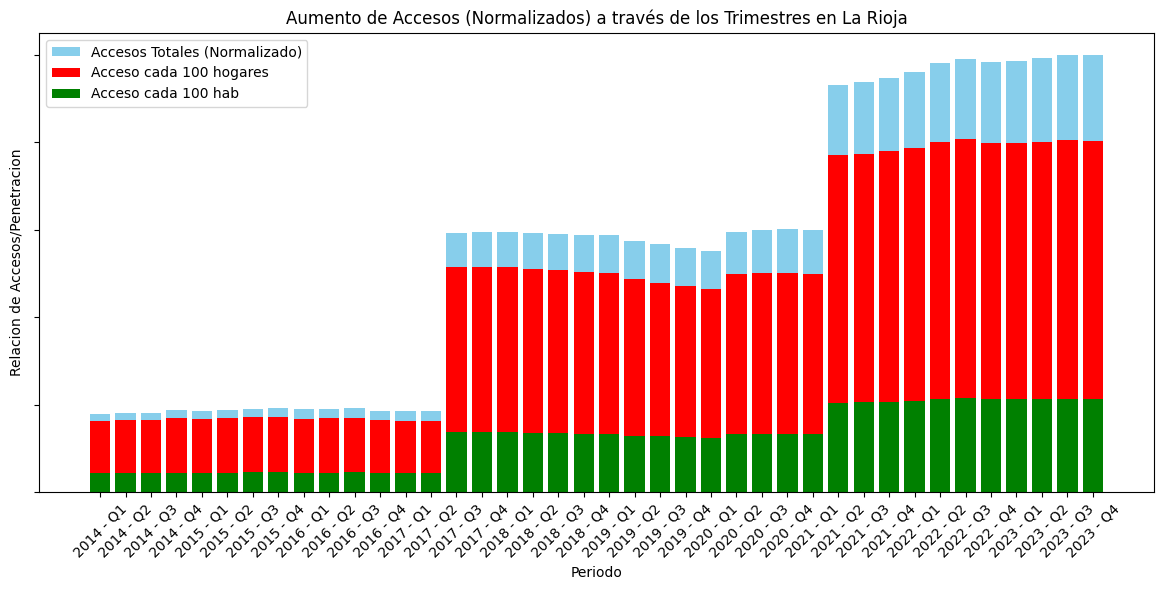

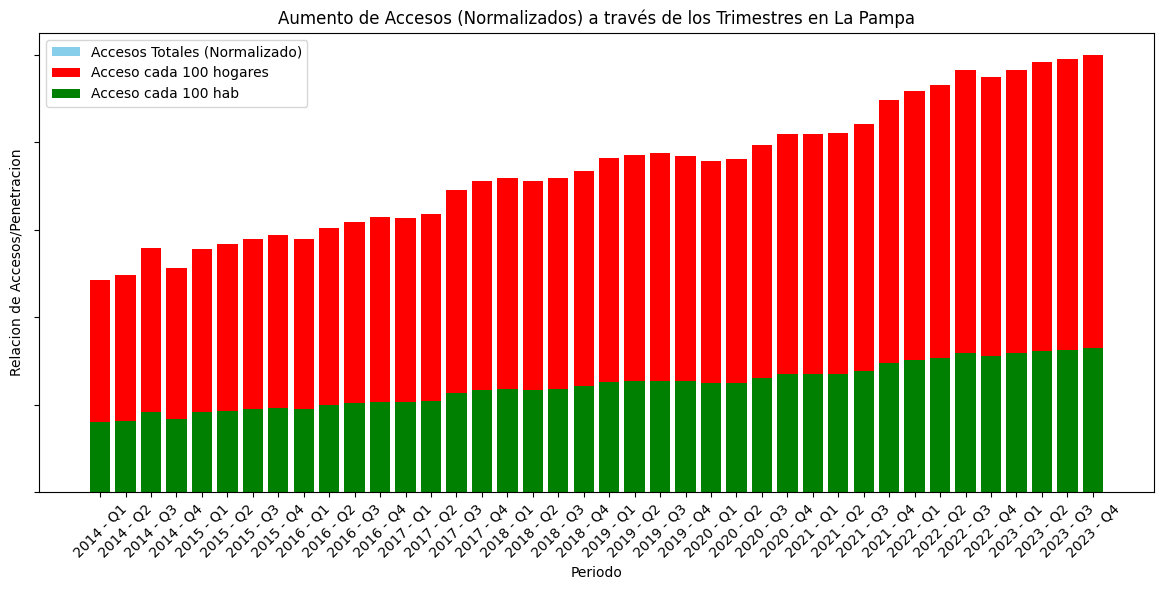

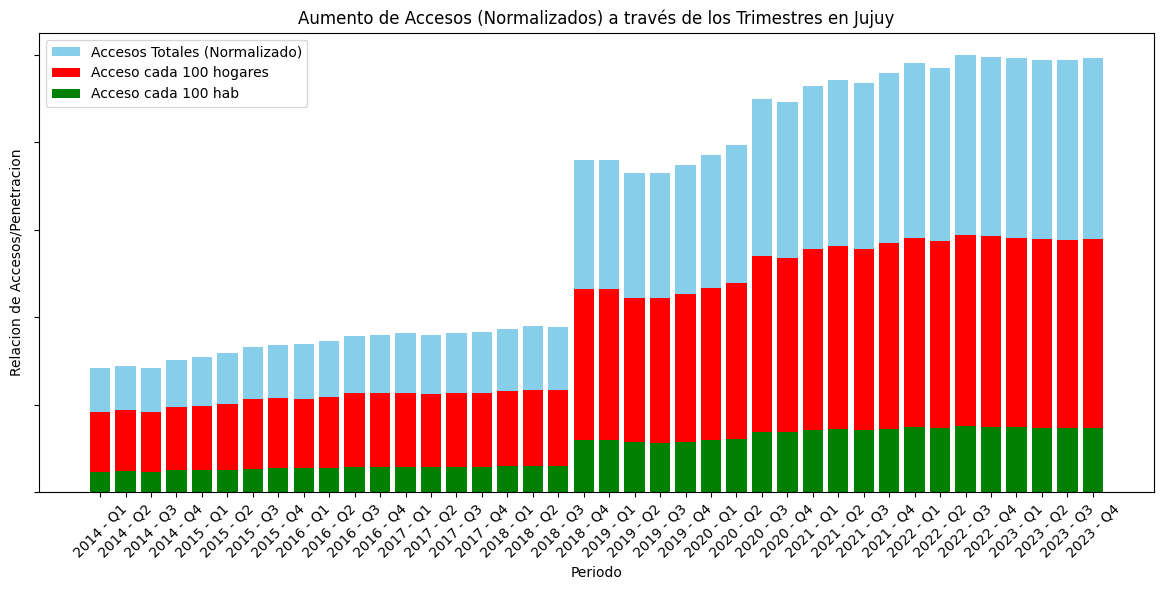

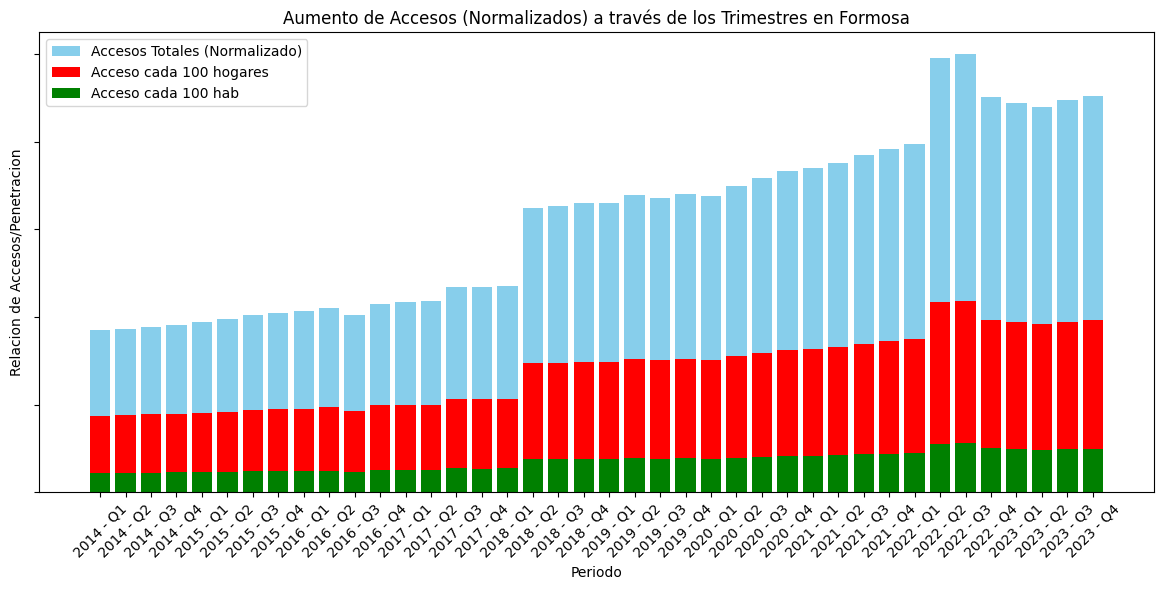

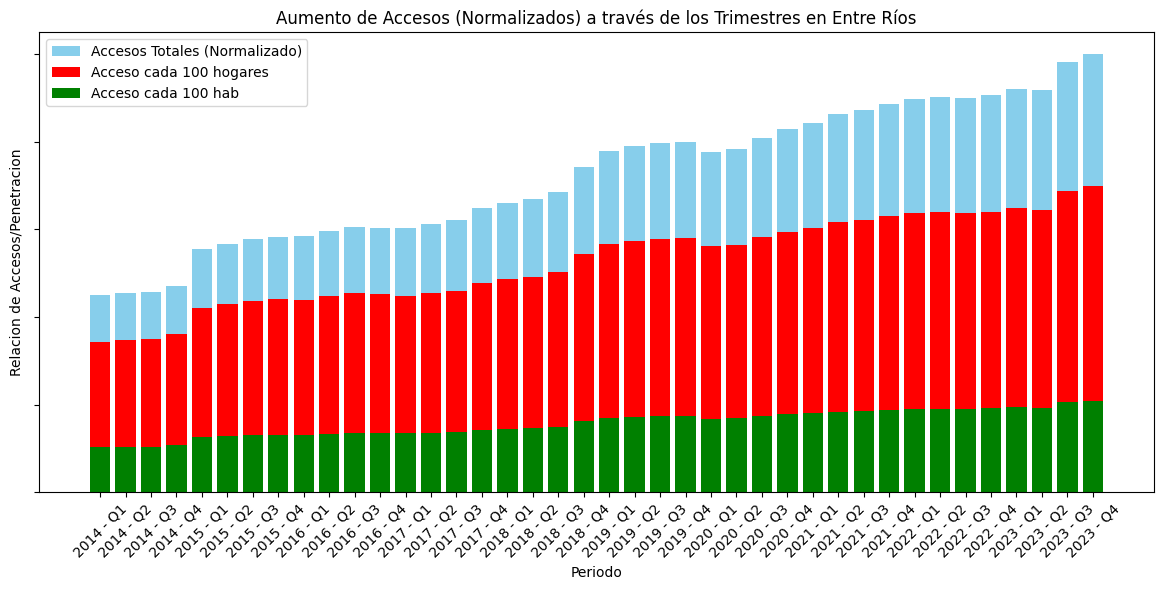

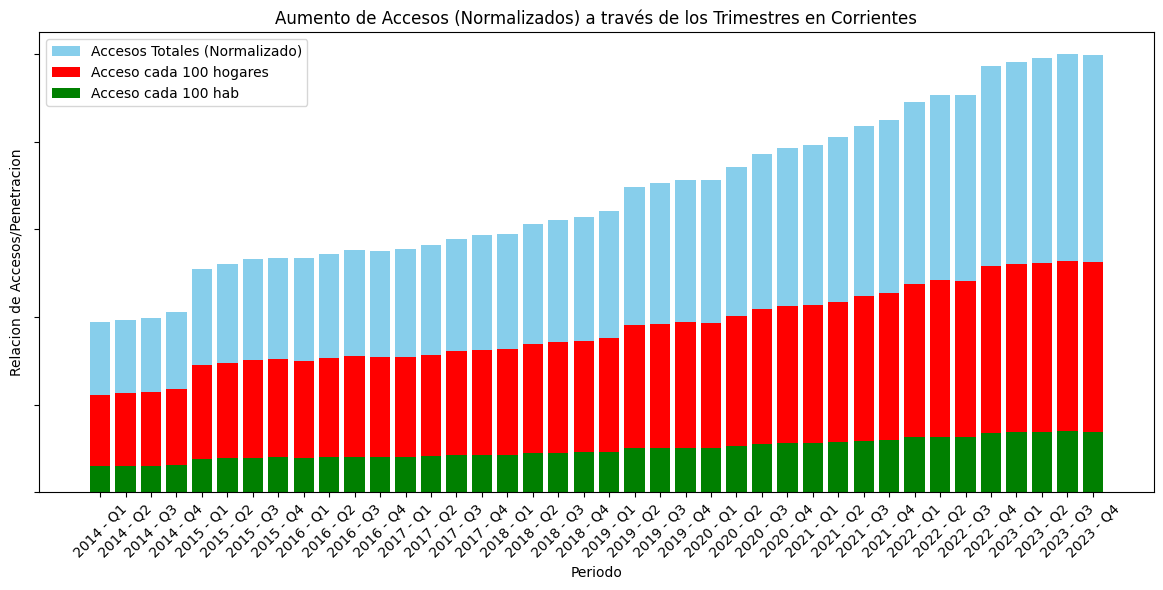

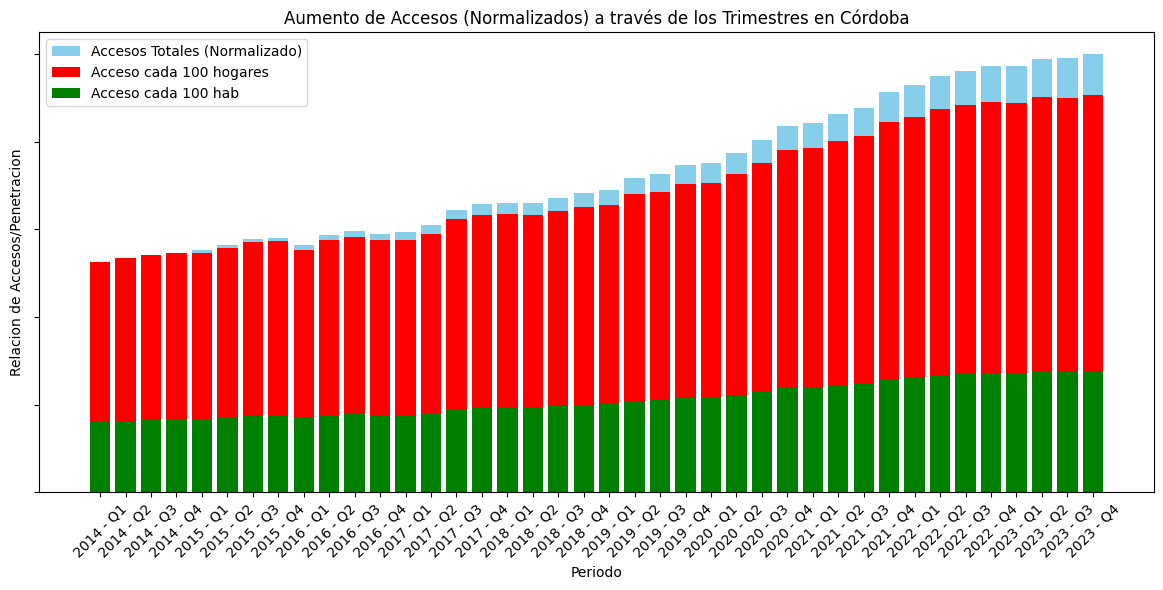

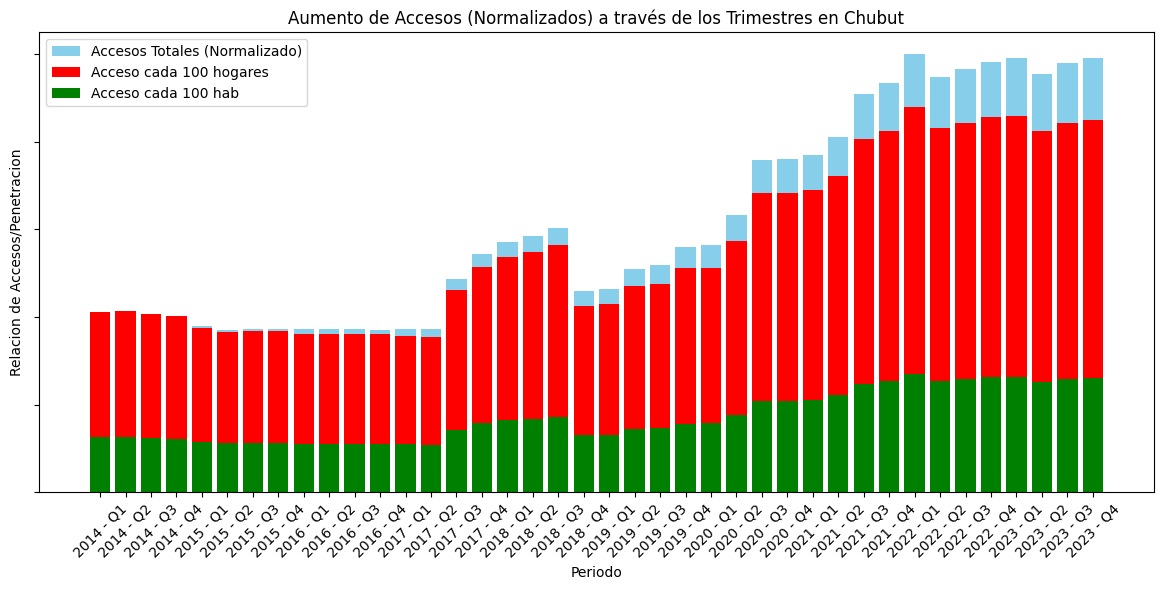

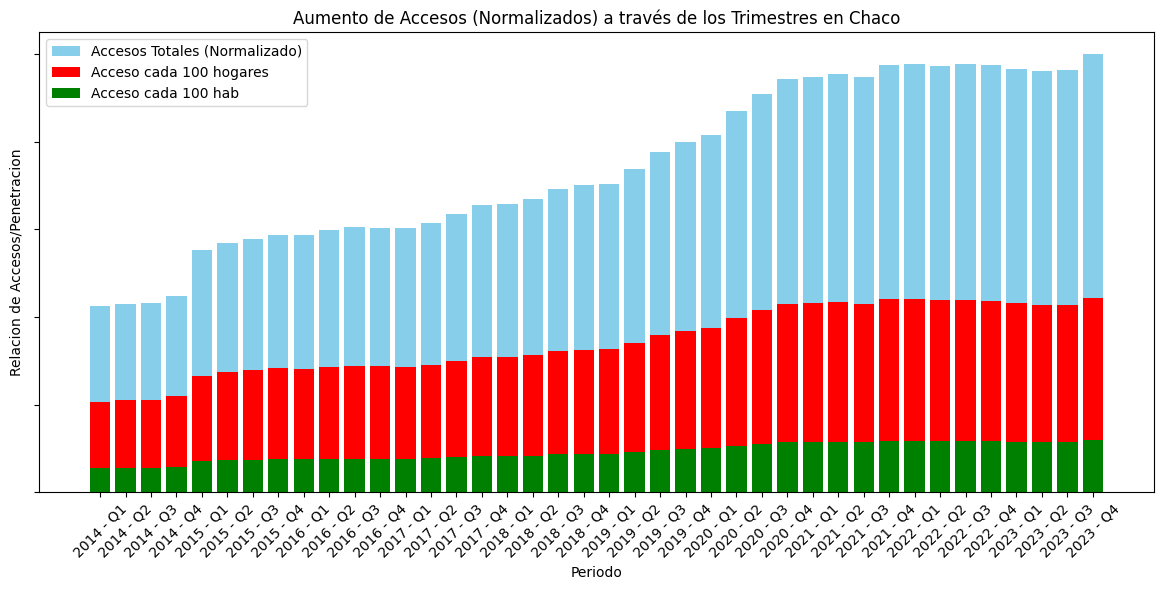

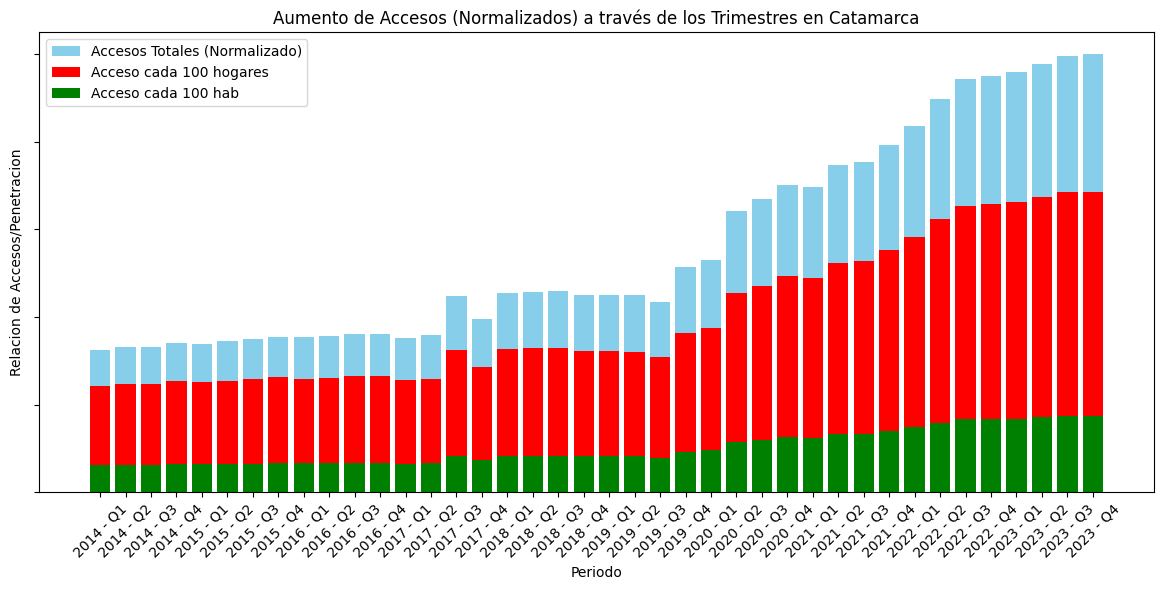

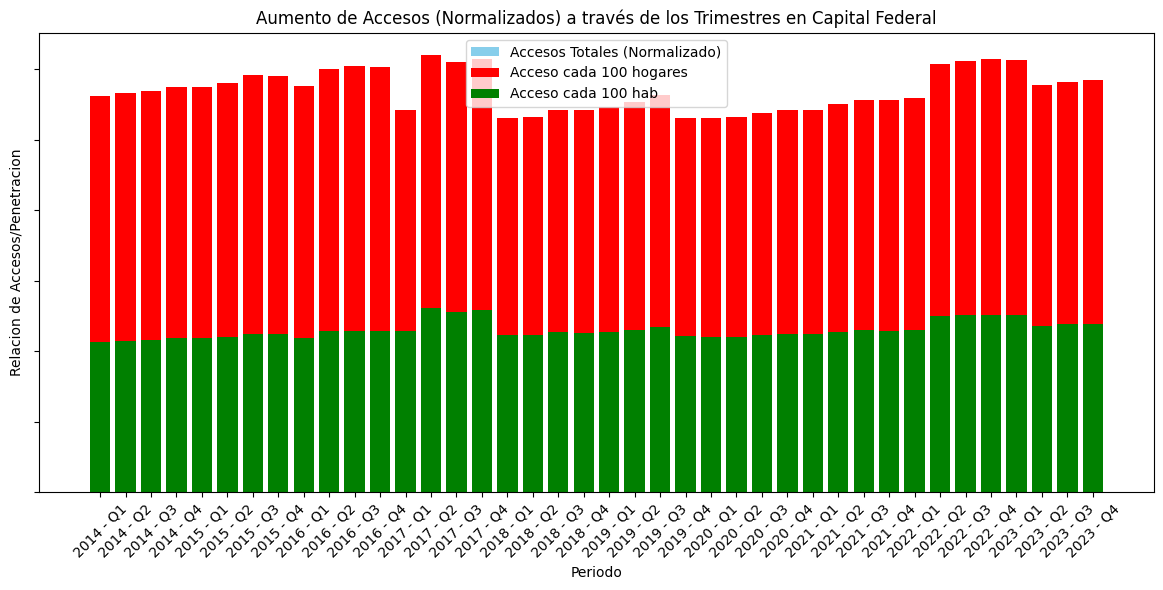

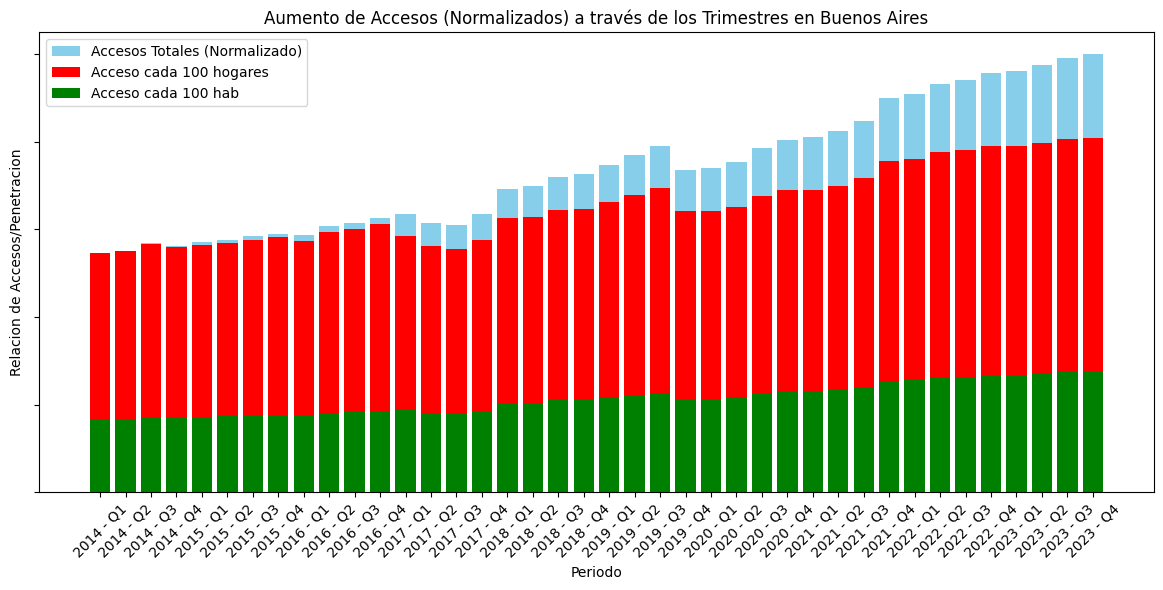

In [115]:
provincias = df['Provincia'].unique()

for provincia in provincias:
    # Filtrar el DataFrame por la provincia actual
    df_provincia = df[df['Provincia'] == provincia].copy()

    # Normalizar el total de accesos
    df_provincia['tot_accesos'] = df_provincia[accesos].sum(axis=1)
    df_provincia['tot_accesos'] = df_provincia['tot_accesos'] / df_provincia['tot_accesos'].max() * 100

    # Crear el gráfico
    plt.figure(figsize=(12, 6))

    # Graficar accesos totales normalizados
    plt.bar(df_provincia['Periodo'], df_provincia['tot_accesos'], color='skyblue', label='Accesos Totales (Normalizado)')

    # Graficar accesos por 100 hogares y 100 habitantes
    plt.bar(df_provincia['Periodo'], df_provincia['Accesos por cada 100 hogares'], color='red', label='Acceso cada 100 hogares')
    plt.bar(df_provincia['Periodo'], df_provincia['Accesos por cada 100 hab'], color='green', label='Acceso cada 100 hab')

    # Añadir etiquetas y título
    plt.xlabel('Periodo')
    plt.ylabel('Relacion de Accesos/Penetracion')
    plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en {provincia}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.gca().set_yticklabels([])
    plt.legend()

    # Mostrar el gráfico
    plt.show()


Rapidamente podemos observar una gran variacion entre provincias. Podemos hacer una grafica que muestre mas clara la prescencia de outliers.

In [116]:
# Calcular los cuartiles
Q1 = accesos_tot.quantile(0.25)
Q3 = accesos_tot.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar provincias outliers
provincias_outliers = df[(accesos_tot < limite_inferior) | (accesos_tot > limite_superior)]['Provincia'].unique()

print("Provincias Outliers en cantidad de accesos:", ', '.join(provincias_outliers))

Provincias Outliers en cantidad de accesos: Santa Fe, Córdoba, Capital Federal, Buenos Aires


Consistente con las provincias con mas cantidad de poblacion. Probablemente sea mas valioso ver los Outliers de Penetracion por hogares/habitantes.

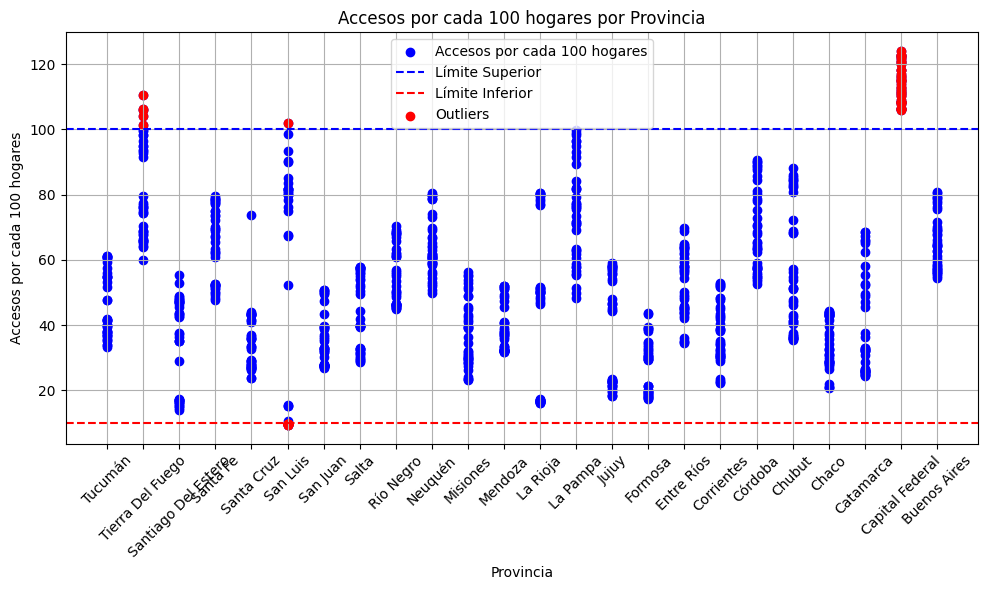

In [117]:
# Se definen limites estaticos: Mas de 100 es un outlier debido a que el conteo es cada 100, y menos de 10 es un valor extremo.
limite_inferior = 10
limite_superior = 100

# Identificar provincias outliers
provincias_outliers = df[(df['Accesos por cada 100 hogares'] < limite_inferior) | (df['Accesos por cada 100 hogares'] > limite_superior)]

# Graficar
plt.figure(figsize=(10, 6))

# Scatter plot de accesos por cada 100 hogares
plt.scatter(df['Provincia'], df['Accesos por cada 100 hogares'], color='blue', label='Accesos por cada 100 hogares')

# Límites para outliers
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite Inferior')

# Marcar outliers si existen
if not provincias_outliers.empty:
    plt.scatter(provincias_outliers['Provincia'], provincias_outliers['Accesos por cada 100 hogares'], color='red', label='Outliers')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares por Provincia')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

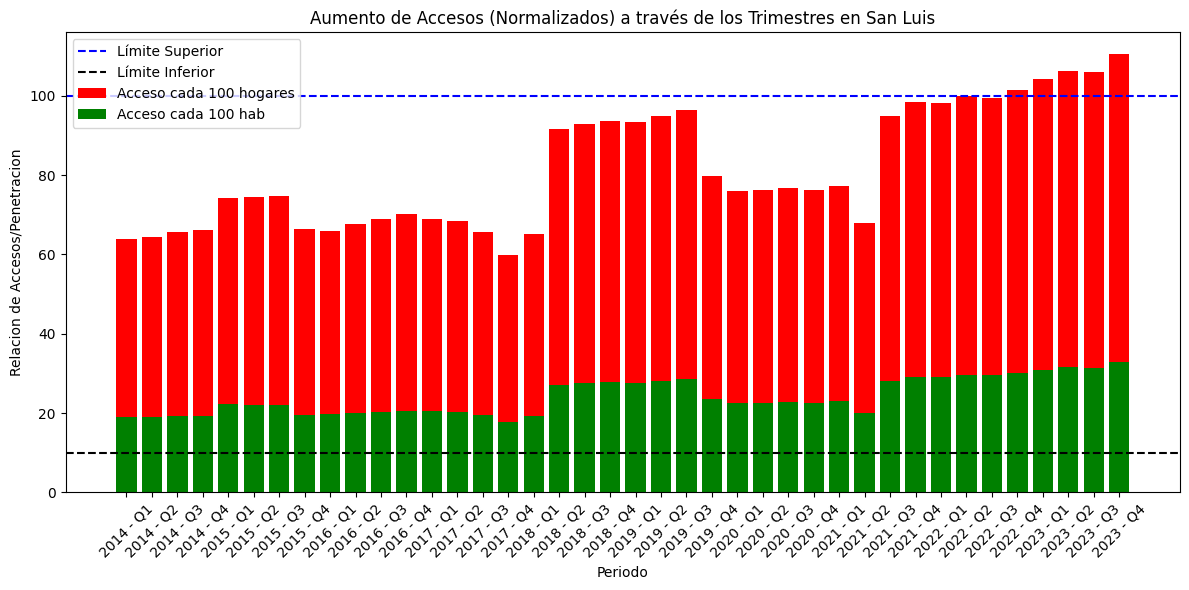

In [118]:
df_tf = df[df['Provincia'] == 'Tierra Del Fuego'].copy()

# Crear el gráfico
plt.figure(figsize=(12, 6))

limite_inferior = 10
limite_superior = 100
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='black', linestyle='--', label='Límite Inferior')

# Graficar accesos por 100 hogares y 100 habitantes
plt.bar(df_tf['Periodo'], df_tf['Accesos por cada 100 hogares'], color='red', label='Acceso cada 100 hogares')
plt.bar(df_tf['Periodo'], df_tf['Accesos por cada 100 hab'], color='green', label='Acceso cada 100 hab')

# Añadir etiquetas y título
plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en San Luis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Mostrar el gráfico
plt.show()

Como se puede observar, Tierra del Fuego es circunstancialmente un Outlier, pero se encuentra consistentemente a un bien nivel de Penetracion. Probablemente debido a la baja densidad poblacional y el alto nivel de empresas que se situan dentro de sus limites, gracias a la reduccion de impuestos a empresas que se radican en la provincia. Sin embargo se debe hacer una investigacion de fondo para confirmar la sospecha.

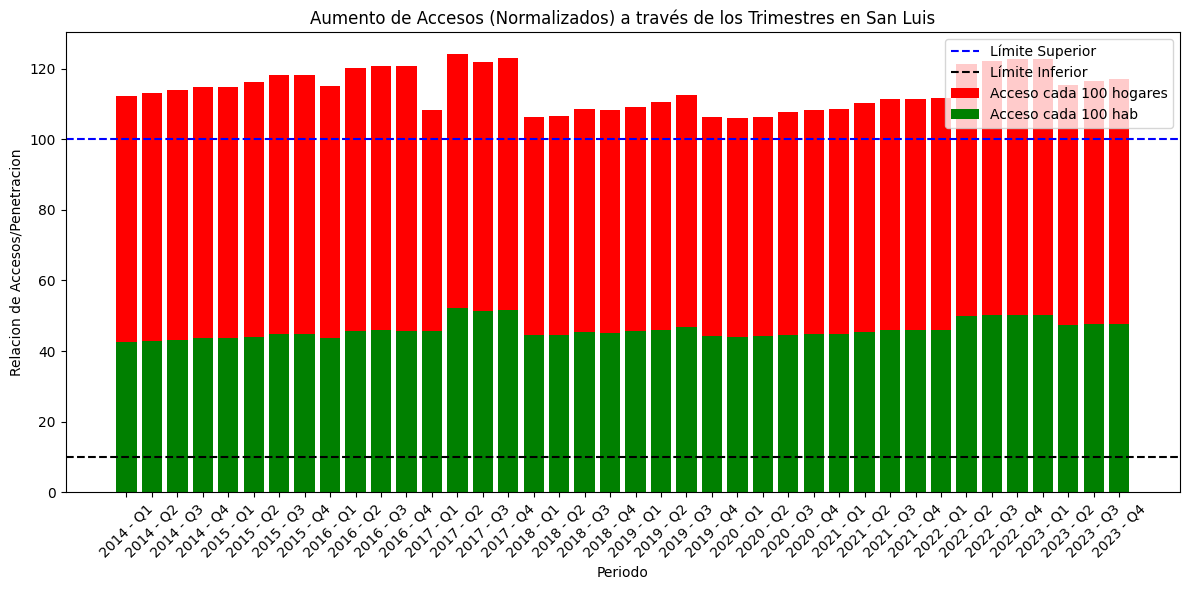

In [119]:
df_cf = df[df['Provincia'] == 'Capital Federal'].copy()

# Crear el gráfico
plt.figure(figsize=(12, 6))

limite_inferior = 10
limite_superior = 100
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='black', linestyle='--', label='Límite Inferior')

# Graficar accesos por 100 hogares y 100 habitantes
plt.bar(df_cf['Periodo'], df_cf['Accesos por cada 100 hogares'], color='red', label='Acceso cada 100 hogares')
plt.bar(df_cf['Periodo'], df_cf['Accesos por cada 100 hab'], color='green', label='Acceso cada 100 hab')

# Añadir etiquetas y título
plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en San Luis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Mostrar el gráfico
plt.show()

Capital Federal esta consitentemente por ensima de 100 accesos cada 100 hogares. De manera similar a Tierra del Fuego, Capital Federal cuenta con un gran volumen de oficinas y negocios de todo tipo, ademas de contar con un alto nivel de urbanizacion.

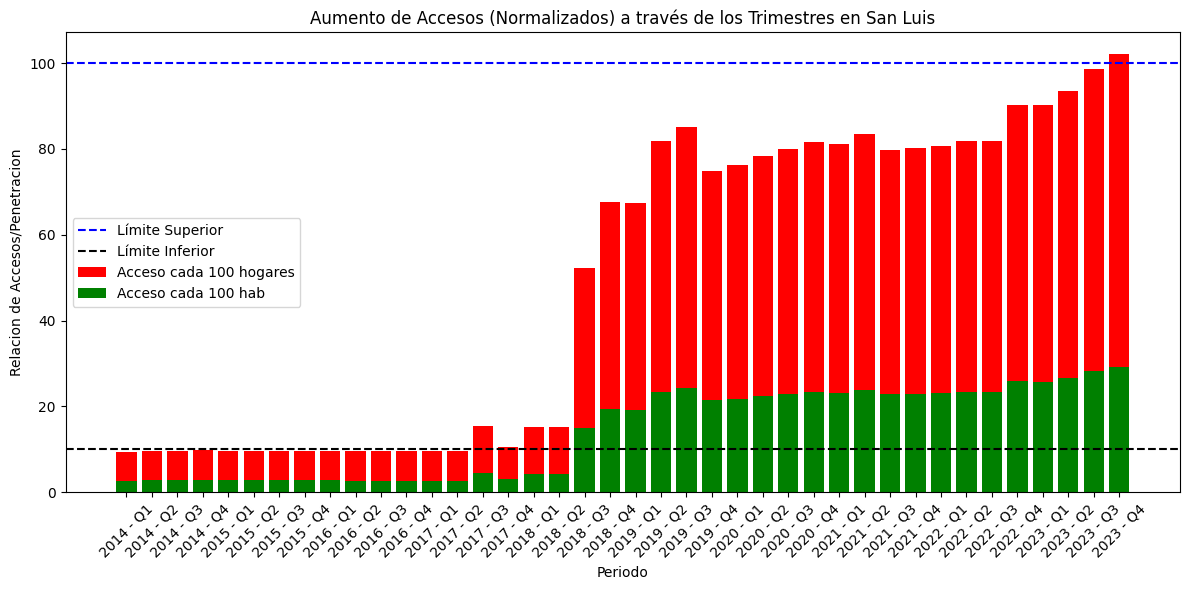

In [120]:
df_sl = df[df['Provincia'] == 'San Luis'].copy()

# Crear el gráfico
plt.figure(figsize=(12, 6))

limite_inferior = 10
limite_superior = 100
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='black', linestyle='--', label='Límite Inferior')

# Graficar accesos por 100 hogares y 100 habitantes
plt.bar(df_sl['Periodo'], df_sl['Accesos por cada 100 hogares'], color='red', label='Acceso cada 100 hogares')
plt.bar(df_sl['Periodo'], df_sl['Accesos por cada 100 hab'], color='green', label='Acceso cada 100 hab')

# Añadir etiquetas y título
plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en San Luis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Mostrar el gráfico
plt.show()

El mas llamativo de los Outliers es San Luis, que cruzo ambas limites (menos de 10 accesos cada 100 hogares y mas de 100 accesos cada 100 hogares) en un lapso de 10 años, aunque el verdadero crecimiento comenzo luego del primer trimestre del 2018 con una mejora de casi 400%.

Esto lleva a preguntarse cuales son las provincias con mas potencial de crecimiento.

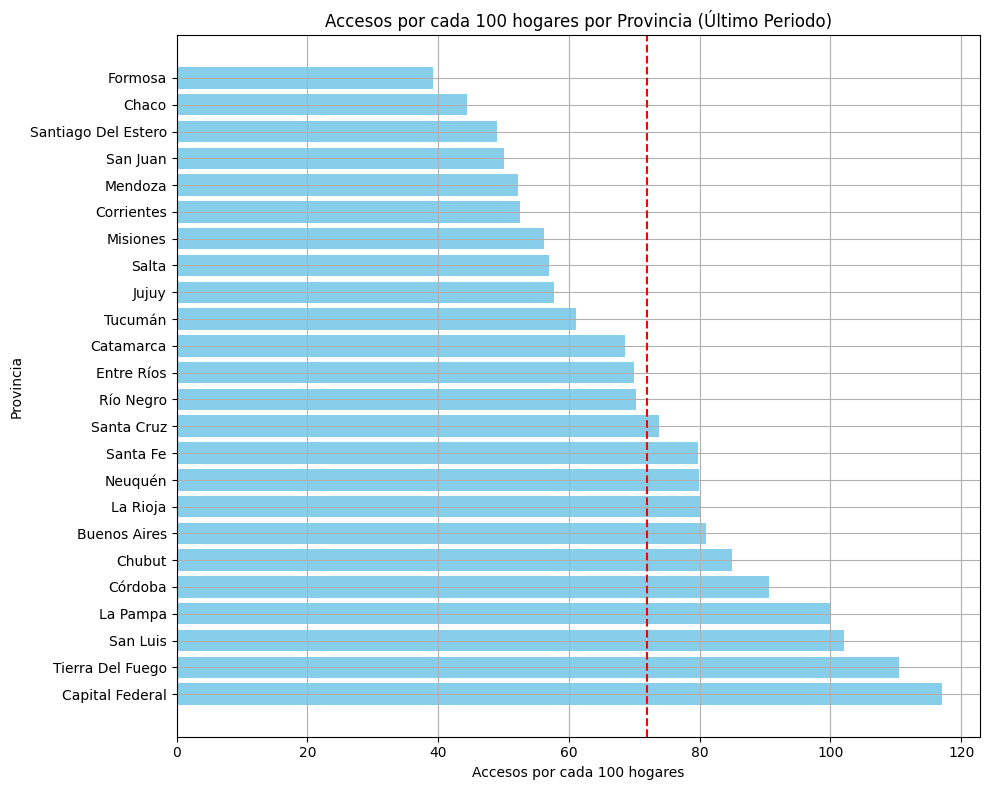

In [121]:
ultimo_periodo = df[df['Periodo'] == df['Periodo'].max()]  # Suponiendo que 'Periodo' está en un formato adecuado para ordenar (puede ser un valor numérico o string)

# Ordenar de mayor a menor por accesos por cada 100 hogares
ultimo_periodo = ultimo_periodo.sort_values(by='Accesos por cada 100 hogares', ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(ultimo_periodo['Provincia'], ultimo_periodo['Accesos por cada 100 hogares'], color='skyblue')

promedio_nacional = ultimo_periodo['Accesos por cada 100 hogares'].mean()
plt.axvline(promedio_nacional, color='red', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.title('Accesos por cada 100 hogares por Provincia (Último Periodo)')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se puede encontrar un grupo de provincias que se encuentran muy por debajo del nivel nacional.

Dentro de estas llaman la atencion:
1. Mendosa y San Juan, debido a su cercania y similitud con una de las provincias con nivel de penetracion mas elevado (San Luis)
2. Santiago del Estero, Misiones y Corrientes, debido a su cercania con Santa Fe (Una de las provincias mas pobladas de la region y con buen nivel de Penetracion por Hogar).

Tambien llama la atencion el nivel de desequilibrio que hay entre la penetracion de todas las provincias.
Surge la duda si, ademas del nivel de acceso, hay tambien una diferencia en la calidad del servicio.

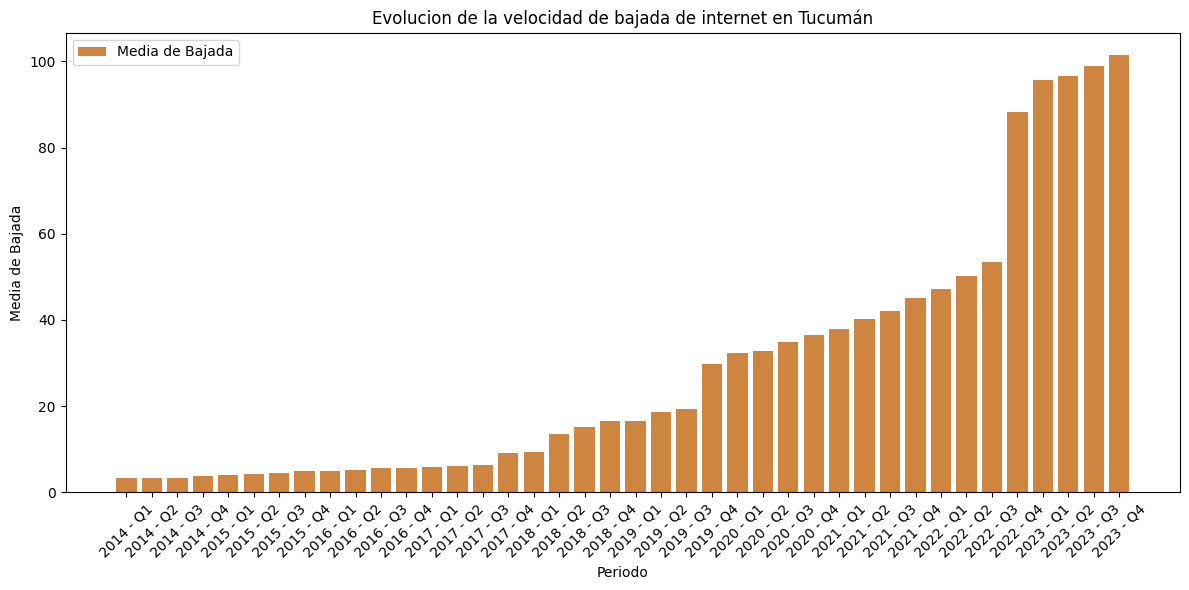

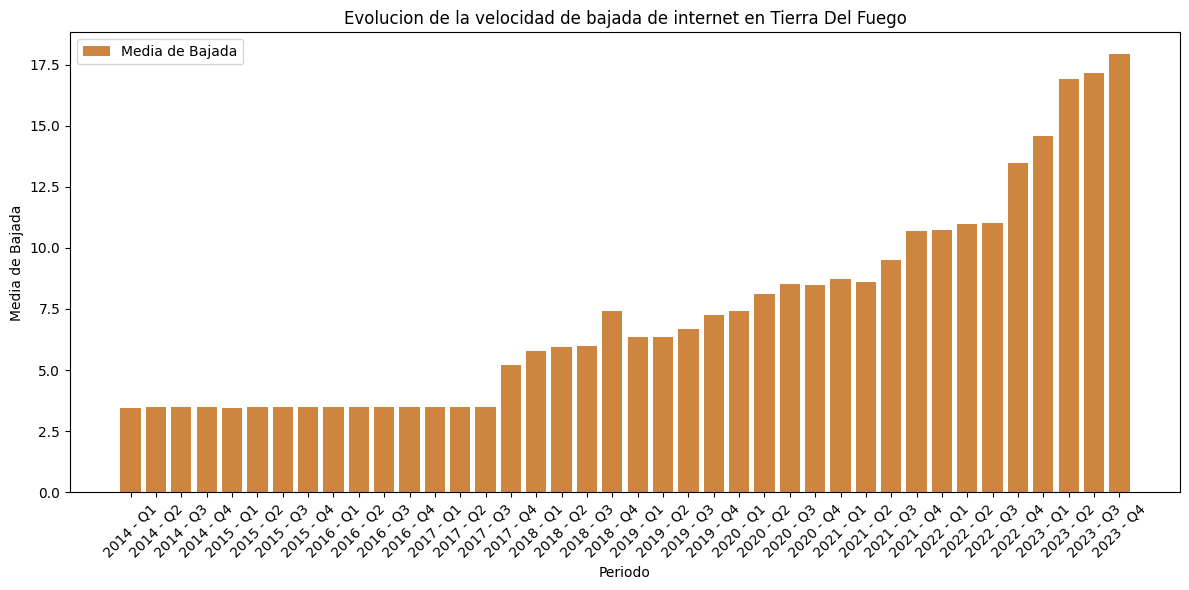

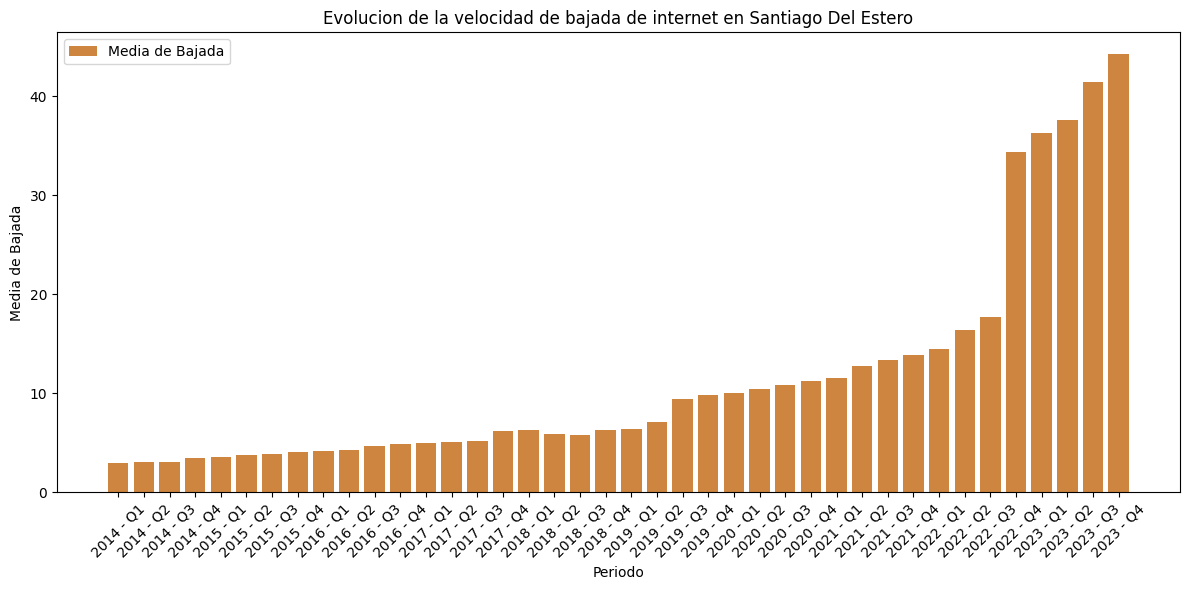

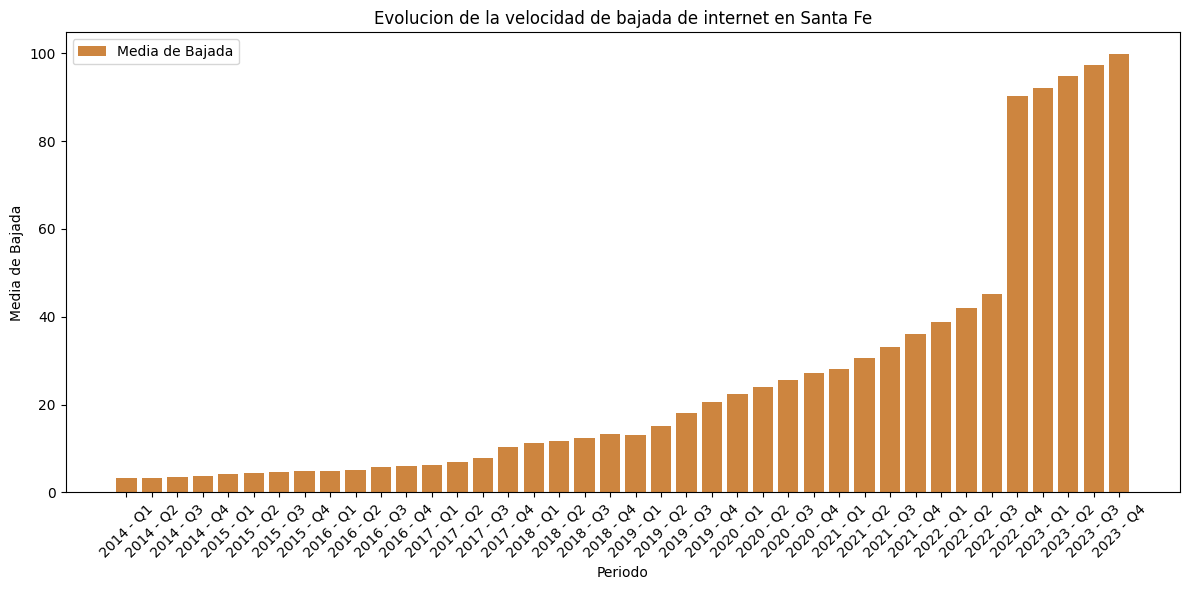

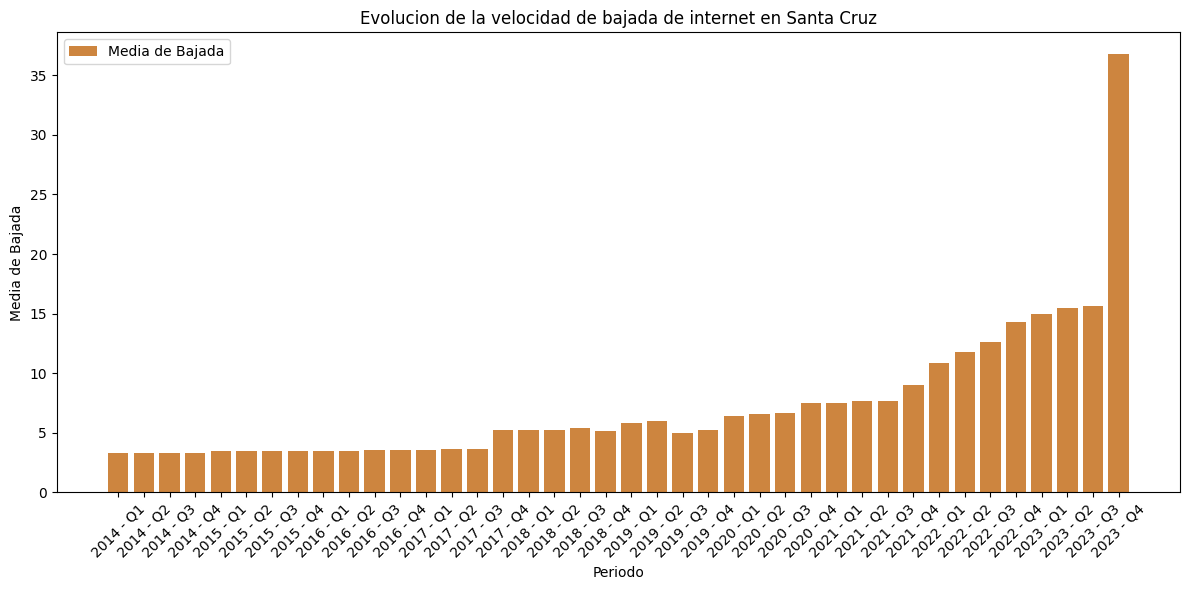

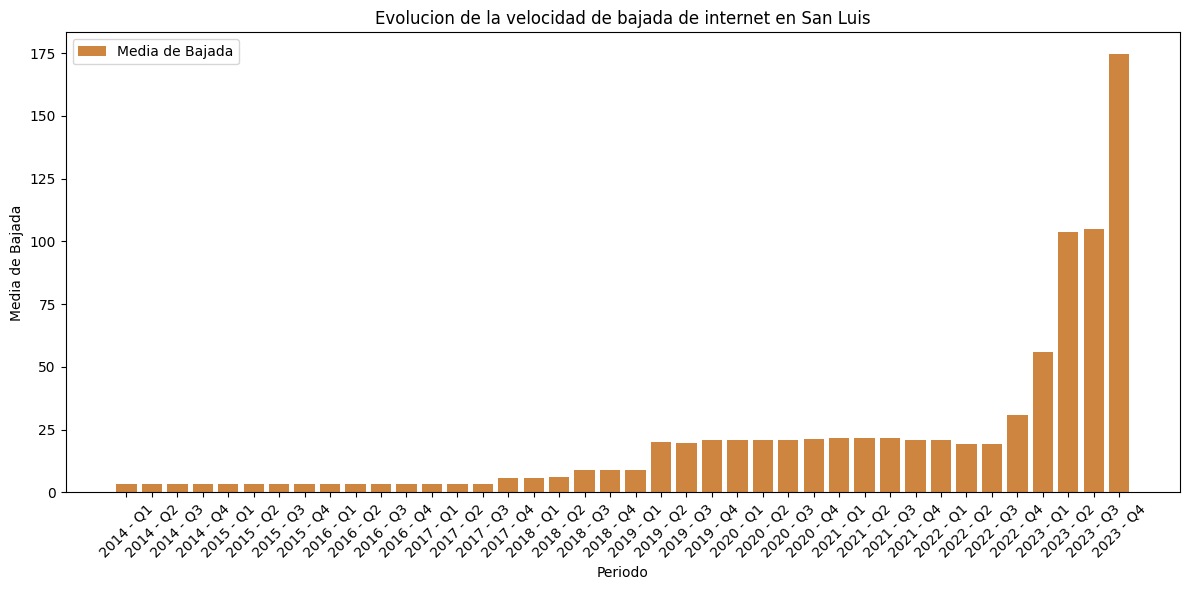

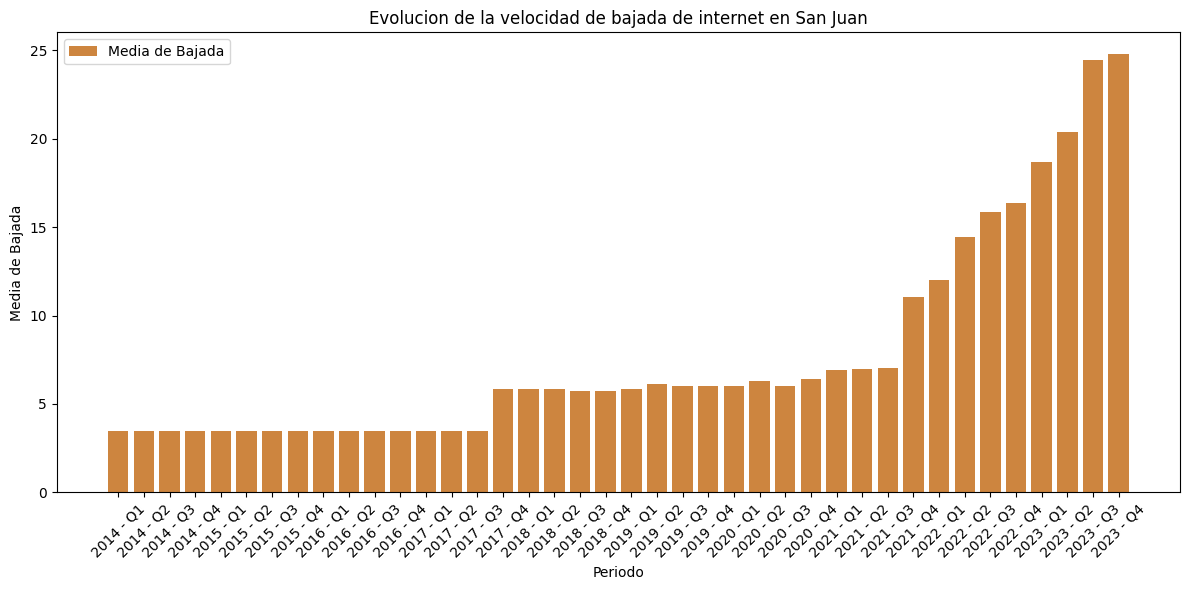

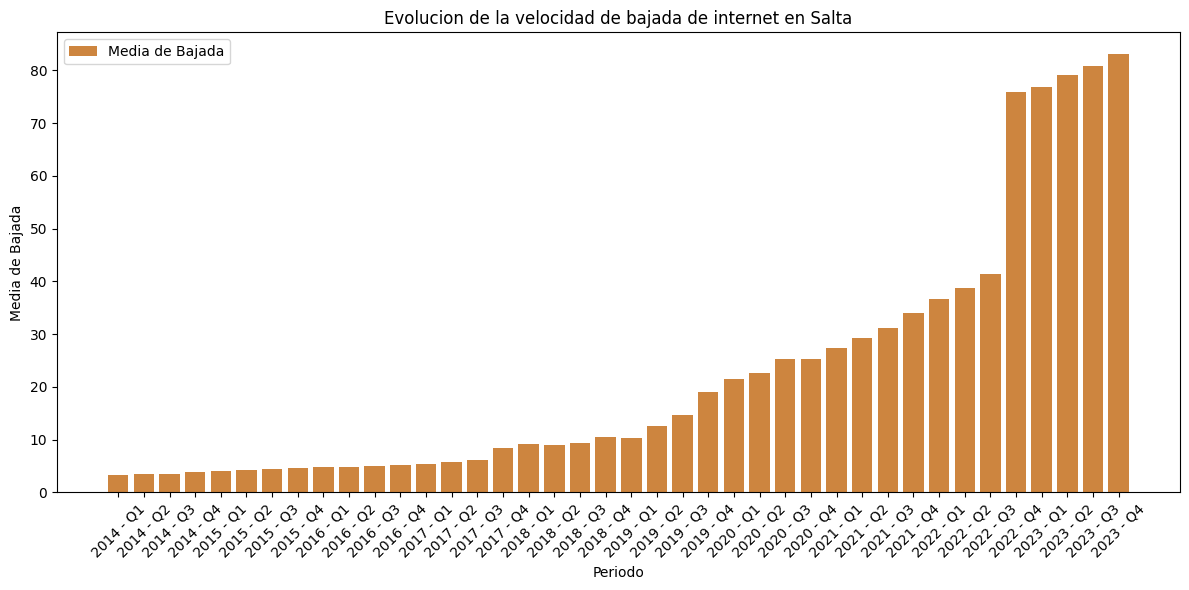

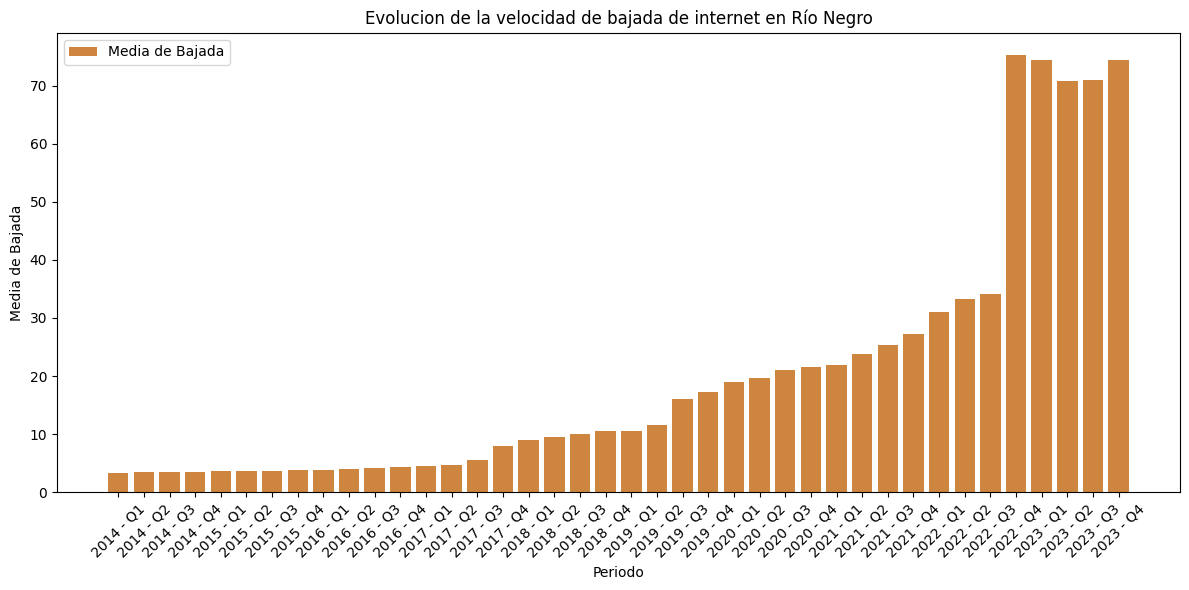

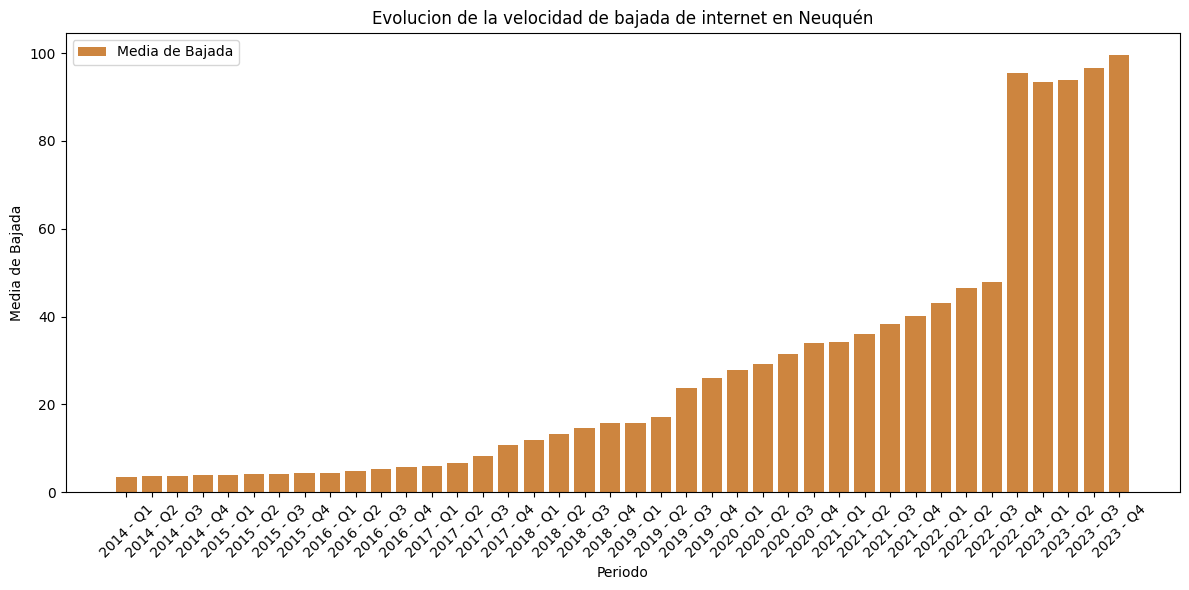

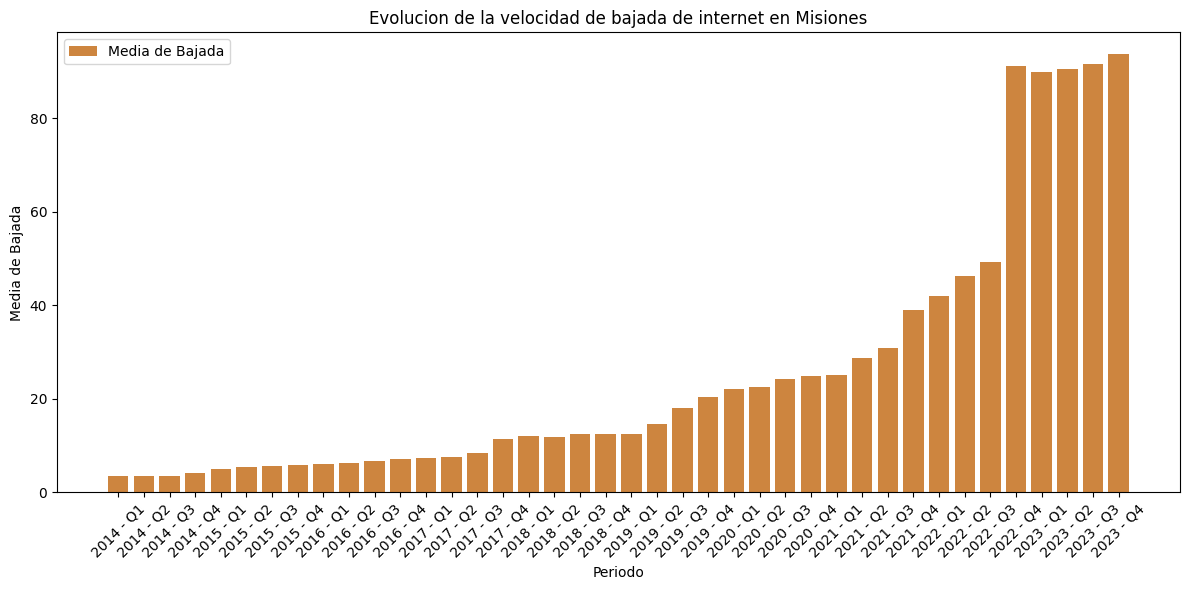

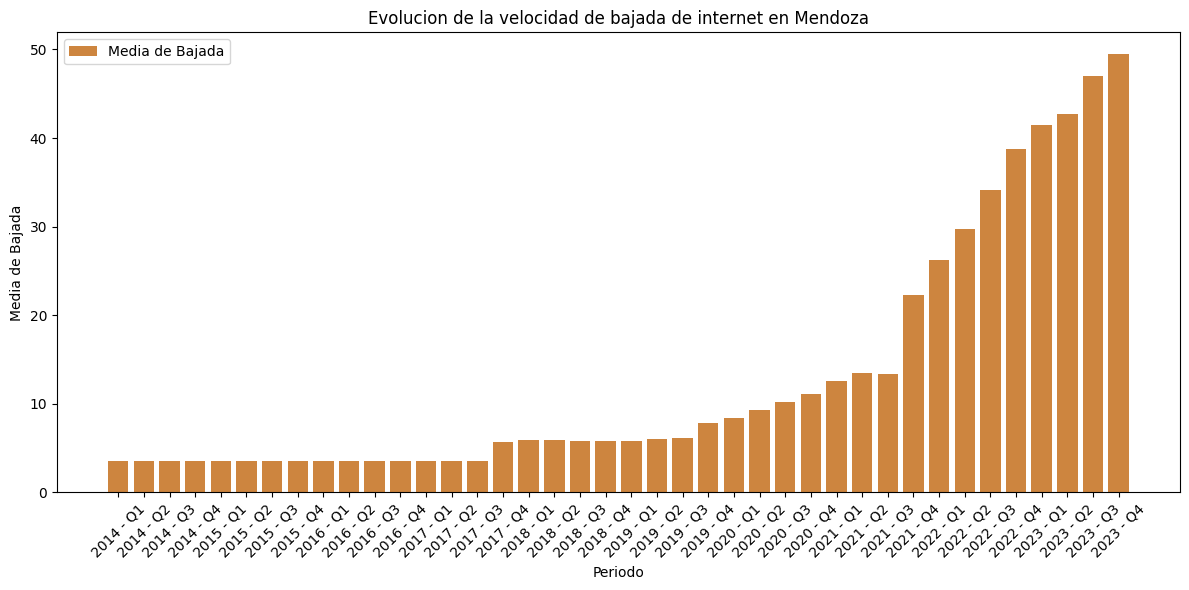

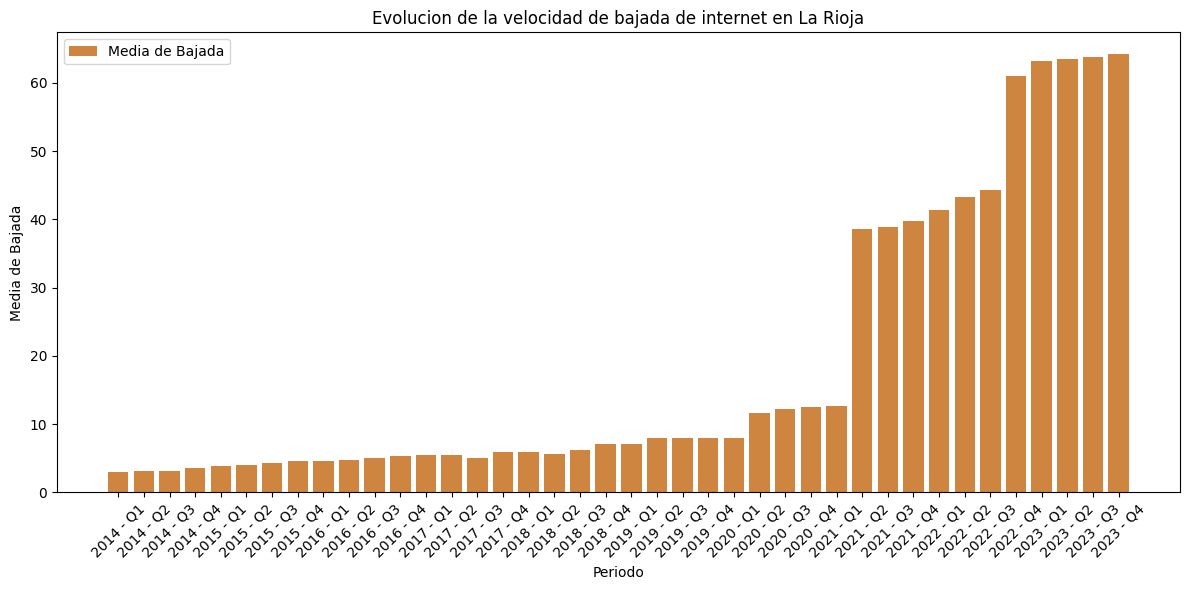

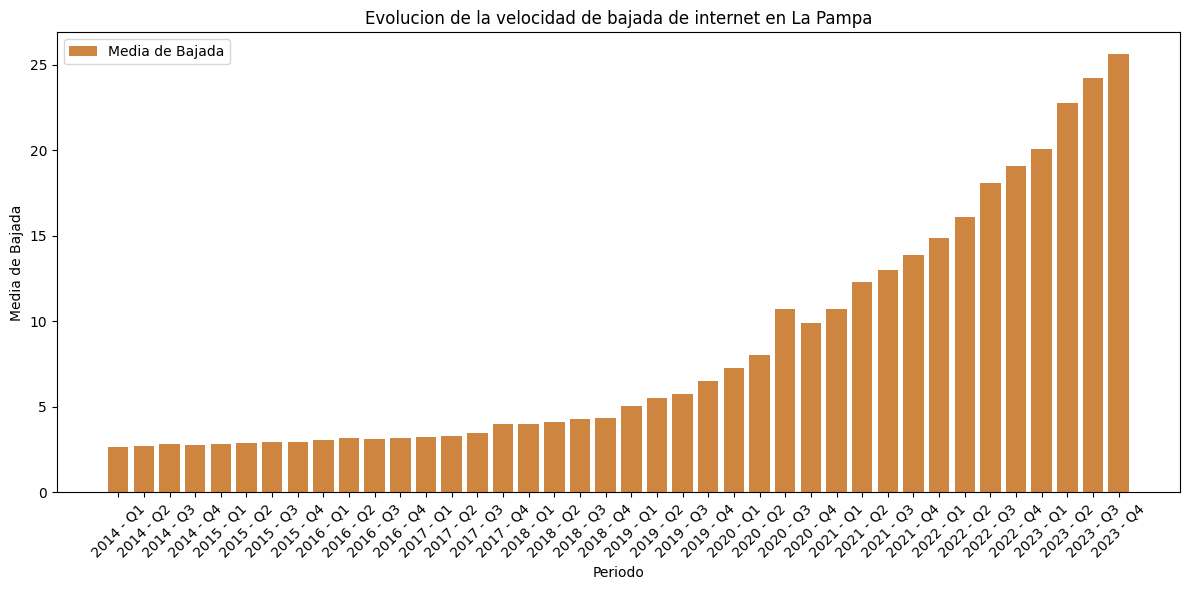

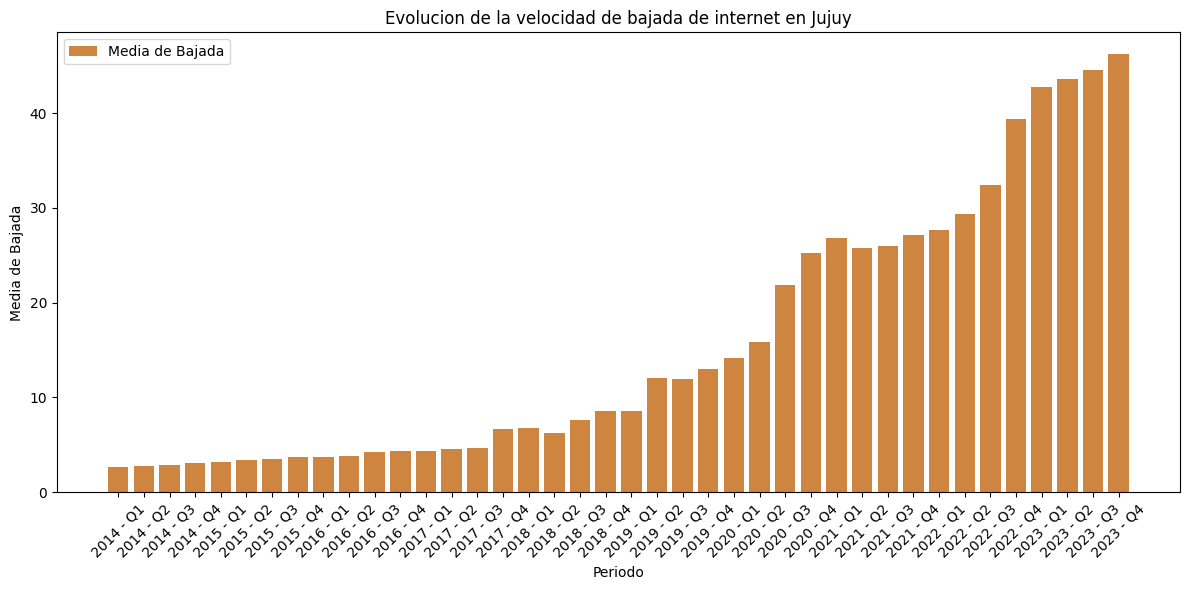

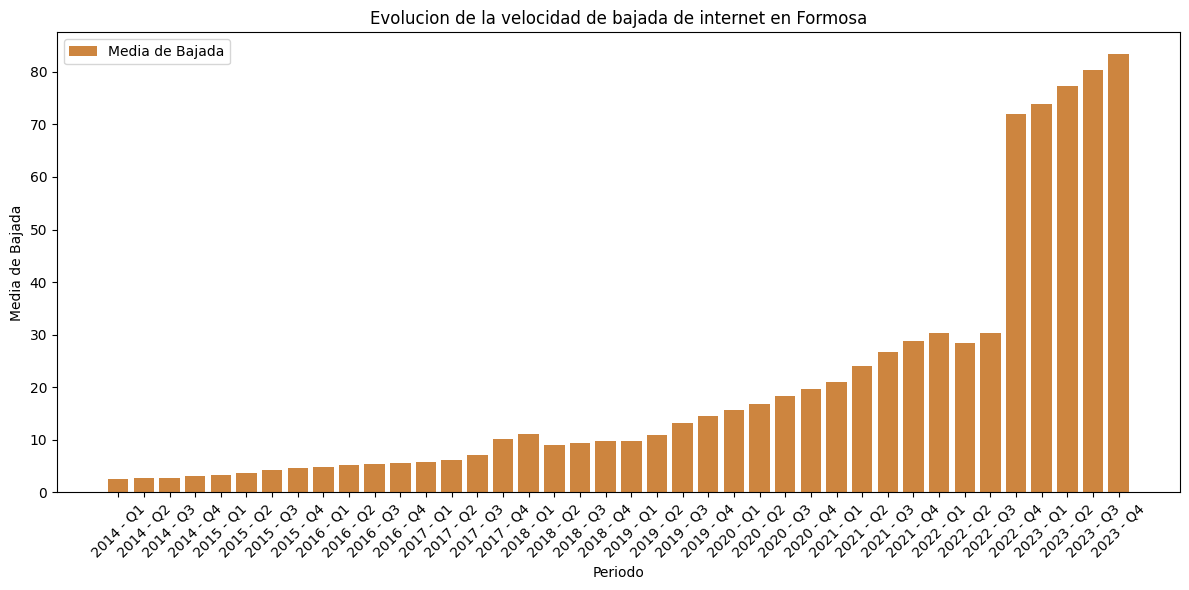

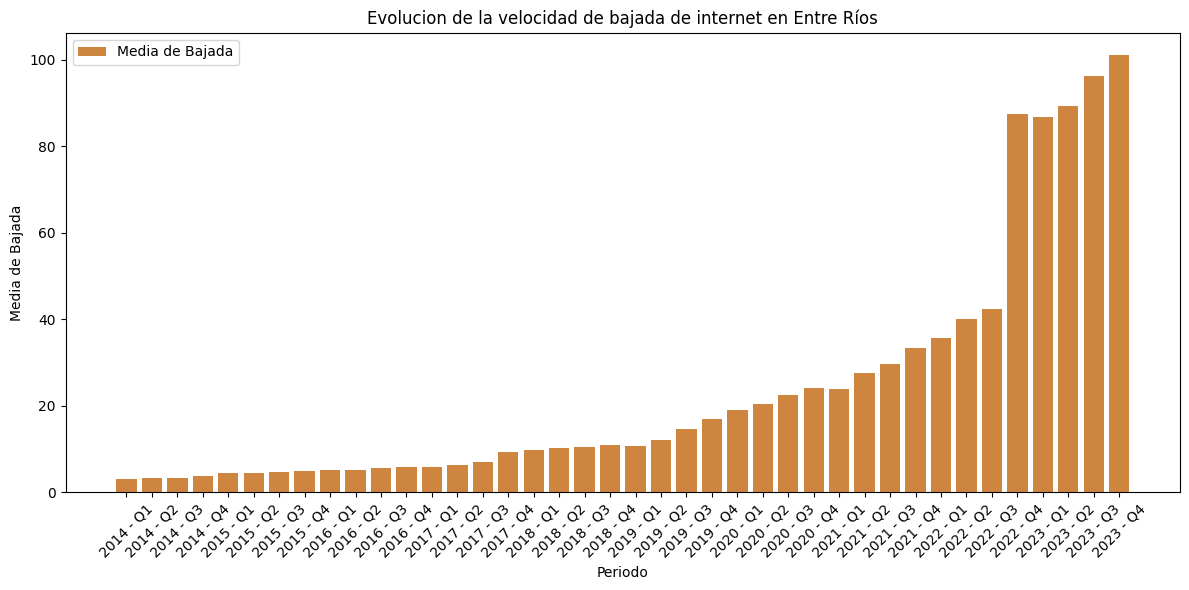

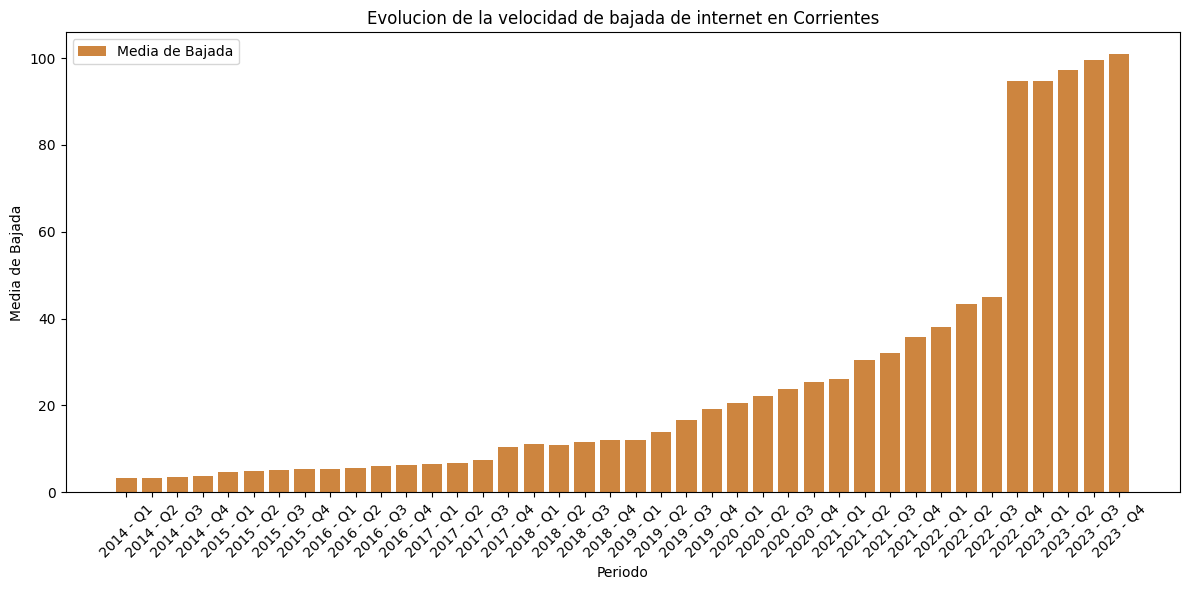

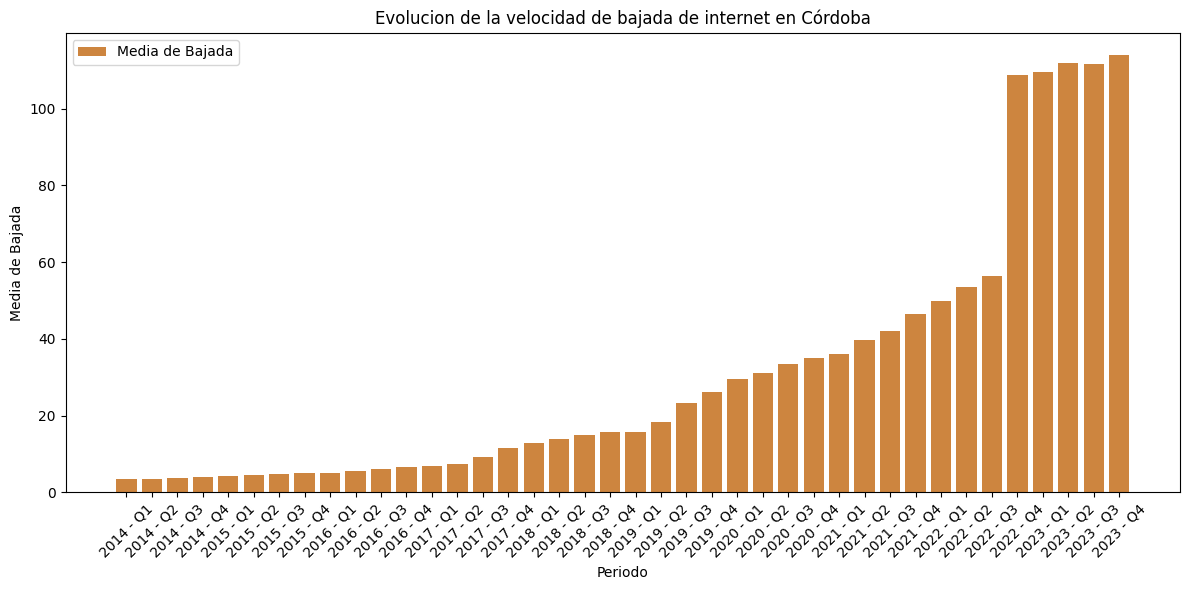

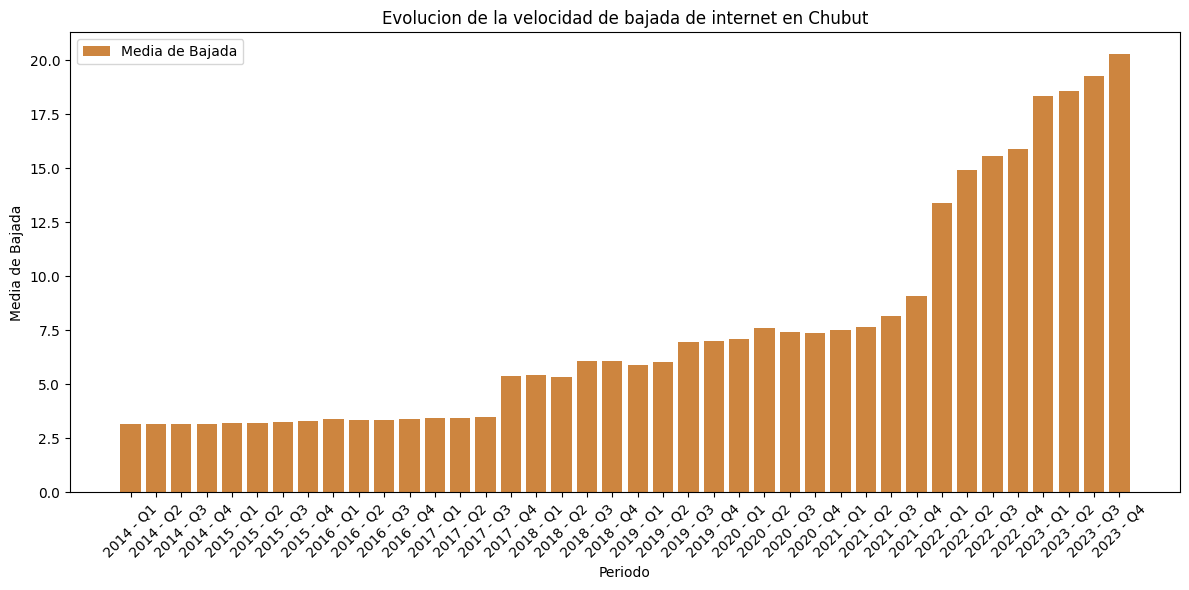

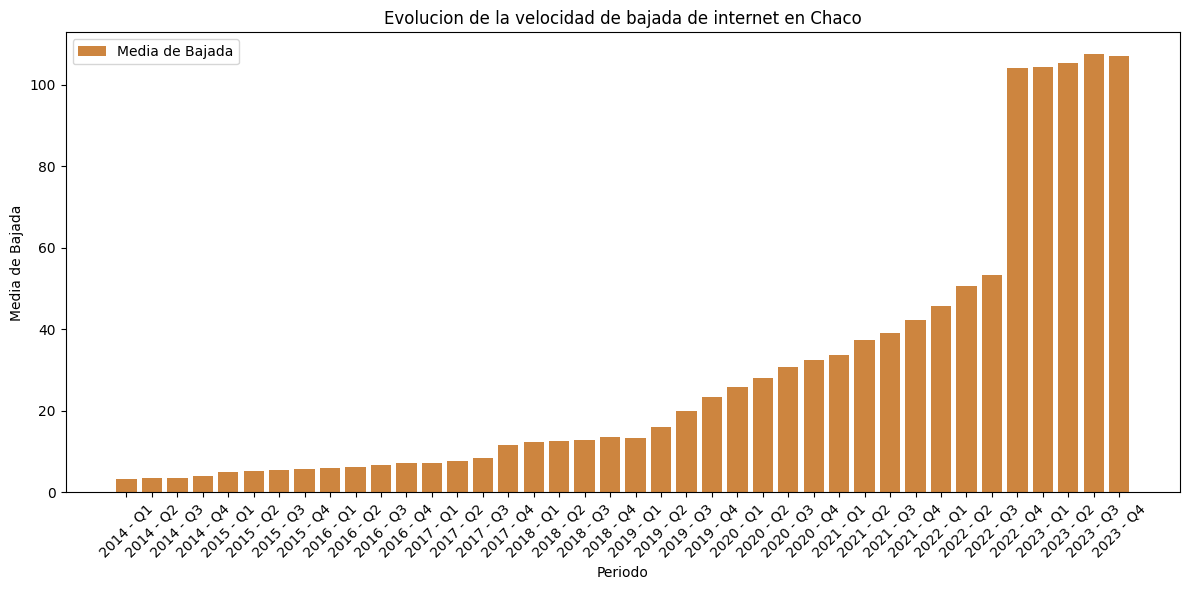

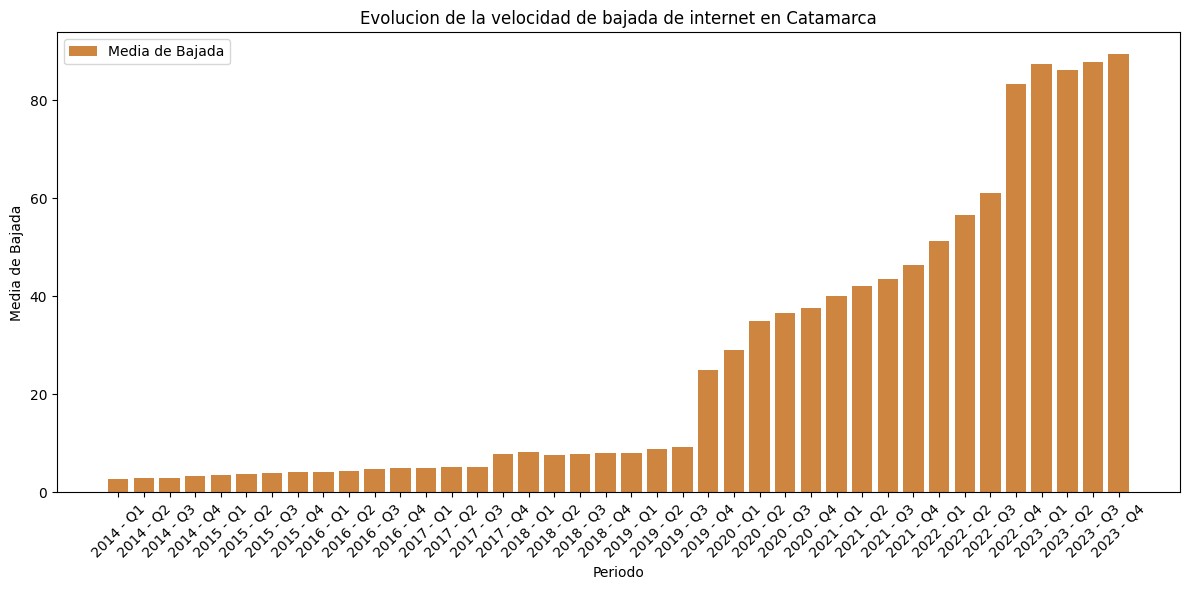

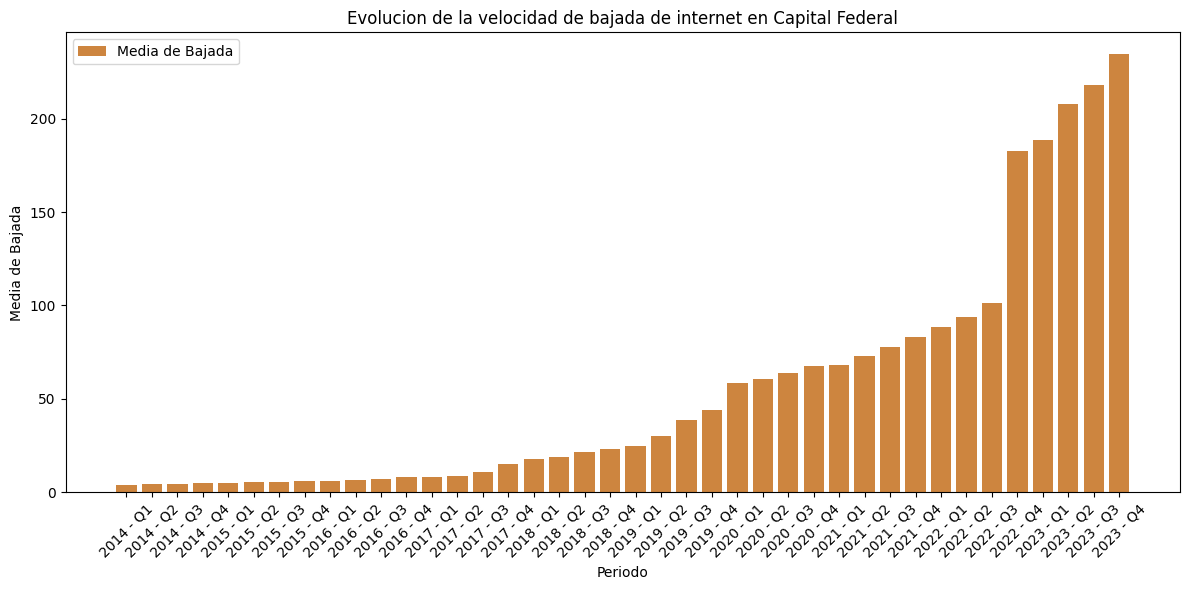

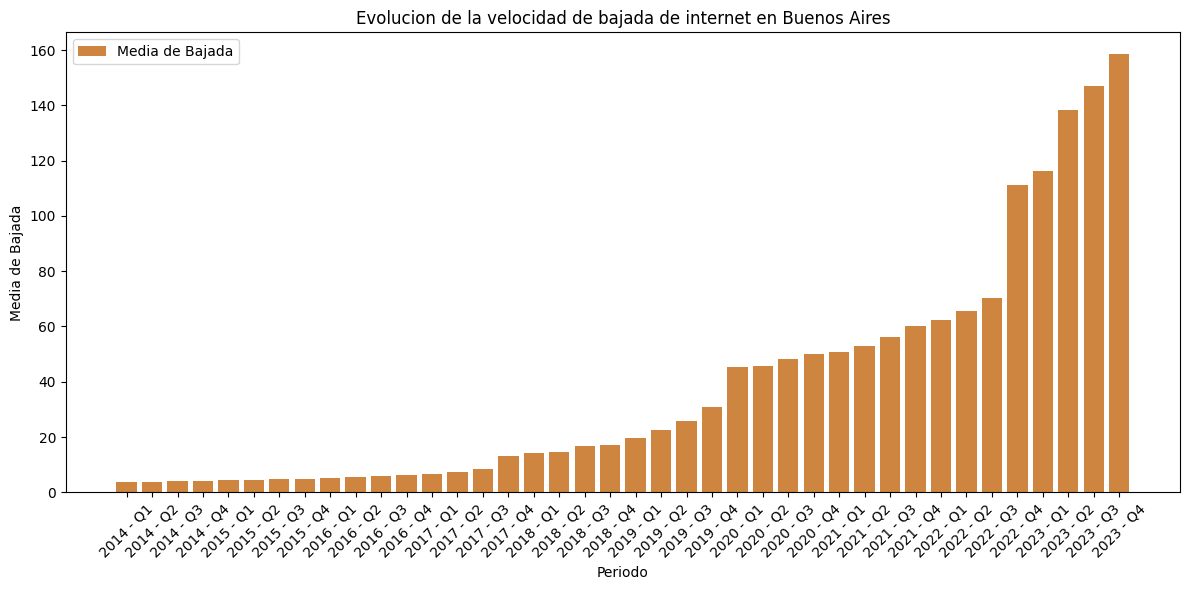

In [122]:
for provincia in provincias:
    # Filtrar el DataFrame por la provincia actual
    df_provincia = df[df['Provincia'] == provincia].copy()

    # Crear el gráfico
    plt.figure(figsize=(12, 6))

    # Graficar accesos por 100 hogares y 100 habitantes
    plt.bar(df_provincia['Periodo'], df_provincia['Mbps (Media de bajada)'], color='peru', label='Media de Bajada')

    # Añadir etiquetas y título
    plt.xlabel('Periodo')
    plt.ylabel('Media de Bajada')
    plt.title(f'Evolucion de la velocidad de bajada de internet en {provincia}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()

    # Mostrar el gráfico
    plt.show()

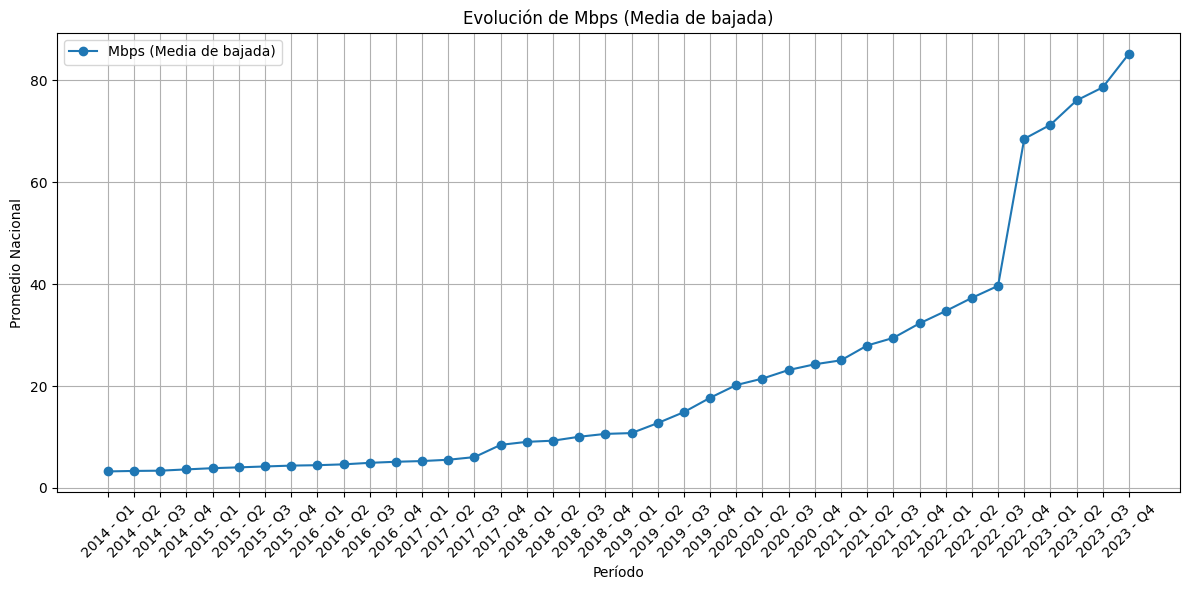

In [123]:
promedio_nacional_vel = df.groupby('Periodo')['Mbps (Media de bajada)'].mean().reset_index()

# Graficar
plt.figure(figsize=(12, 6))

# Graficar promedio nacional como línea para cada tecnología
plt.plot(promedio_nacional_vel['Periodo'], promedio_nacional_vel['Mbps (Media de bajada)'], marker='o', label='Mbps (Media de bajada)')

plt.title('Evolución de Mbps (Media de bajada)')
plt.xlabel('Período')
plt.ylabel('Promedio Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

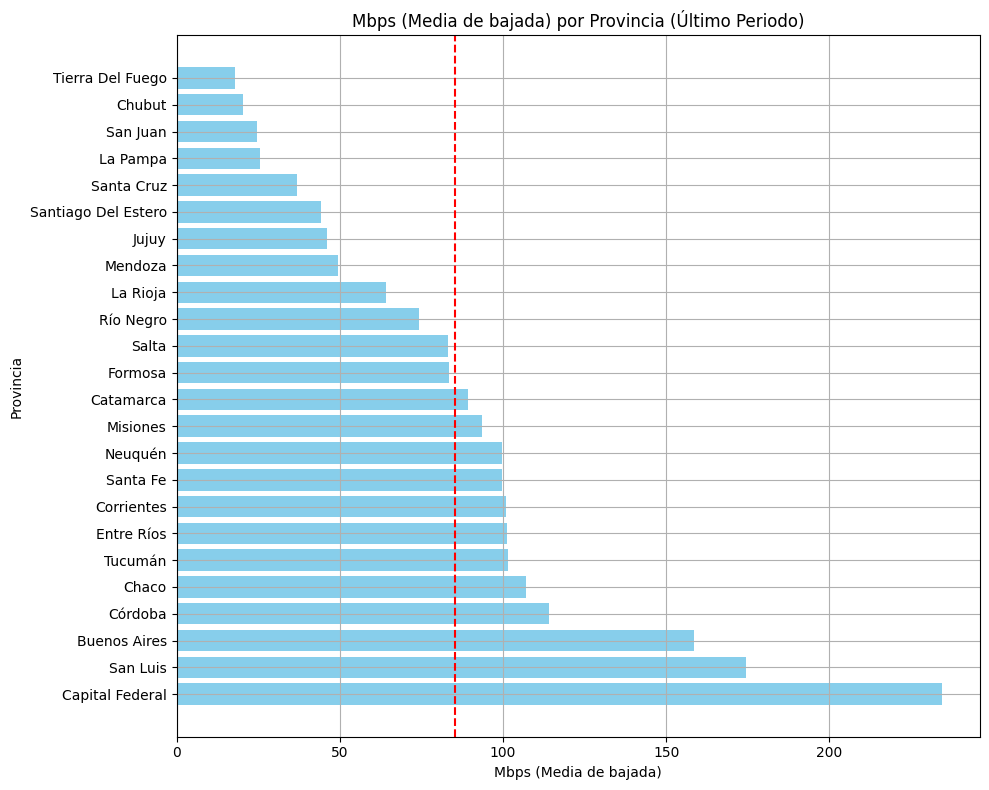

In [124]:
ultimo_periodo = df[df['Periodo'] == df['Periodo'].max()]  # Suponiendo que 'Periodo' está en un formato adecuado para ordenar (puede ser un valor numérico o string)

# Ordenar de mayor a menor por accesos por cada 100 hogares
ultimo_periodo = ultimo_periodo.sort_values(by='Mbps (Media de bajada)', ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(ultimo_periodo['Provincia'], ultimo_periodo['Mbps (Media de bajada)'], color='skyblue')

promedio_nacional = ultimo_periodo['Mbps (Media de bajada)'].mean()
plt.axvline(promedio_nacional, color='red', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Provincia')
plt.title('Mbps (Media de bajada) por Provincia (Último Periodo)')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

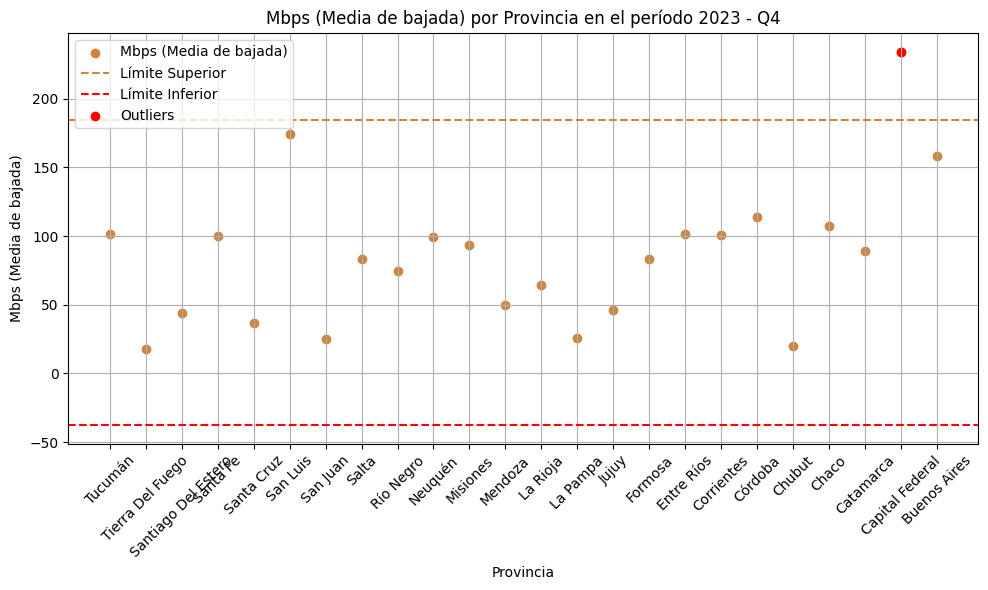

In [125]:
ultimo_periodo = df['Periodo'].max()
df_ultimo_periodo = df[df['Periodo'] == ultimo_periodo]

# Calcular cuartiles y rango intercuartílico para este periodo
Q1 = df_ultimo_periodo['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df_ultimo_periodo['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar provincias outliers en el último periodo
provincias_outliers = df_ultimo_periodo[(df_ultimo_periodo['Mbps (Media de bajada)'] < limite_inferior) | (df_ultimo_periodo['Mbps (Media de bajada)'] > limite_superior)]

# Graficar
plt.figure(figsize=(10, 6))

# Scatter plot de Mbps por provincia en el último periodo
plt.scatter(df_ultimo_periodo['Provincia'], df_ultimo_periodo['Mbps (Media de bajada)'], color='peru', label='Mbps (Media de bajada)')

# Límites para outliers
plt.axhline(limite_superior, color='peru', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite Inferior')

# Marcar outliers si existen
if not provincias_outliers.empty:
    plt.scatter(provincias_outliers['Provincia'], provincias_outliers['Mbps (Media de bajada)'], color='red', label='Outliers')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.title(f'Mbps (Media de bajada) por Provincia en el período {ultimo_periodo}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

La calidad de la velocidad de internet no necesariamente se condice con el nivel de Penetracion al 100%, como podemos ver en el caso de Tierra Del Fuego, donde en el ultimo periodo la Mbps apenas supera los 17 megas, mientras que el promedio nacional esta por ensima de 80.

Tambien podemos observar que los valores se encuentran mucho mejor distribuidos a travez de las provincias, siendo Capital Federal el unico Outlier.

Por ultimo se puede observar un claro aumento en la velocidad de internet a partir de 2019.

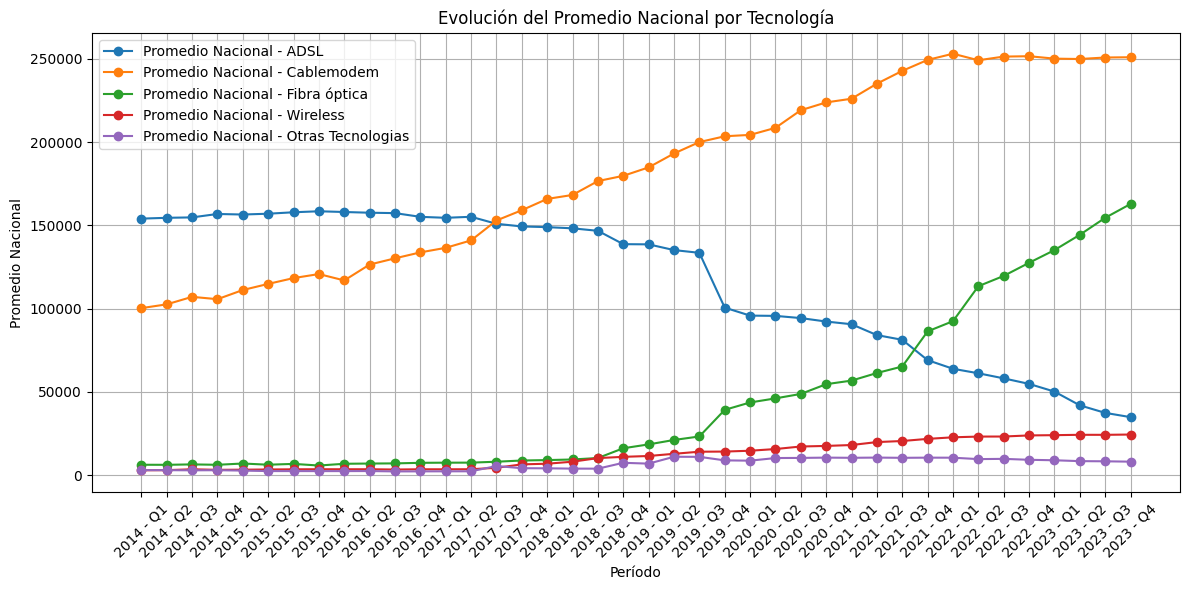

In [126]:
columnas_grafico = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']

promedio_nacional_por_periodo = df.groupby('Periodo')[columnas_grafico].mean().reset_index()

# Graficar
plt.figure(figsize=(12, 6))

# Graficar promedio nacional como línea para cada tecnología
for columna in columnas_grafico:
    plt.plot(promedio_nacional_por_periodo['Periodo'], promedio_nacional_por_periodo[columna], marker='o', label=f'Promedio Nacional - {columna}')

plt.title('Evolución del Promedio Nacional por Tecnología')
plt.xlabel('Período')
plt.ylabel('Promedio Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El aumento de velocidad a escala Nacional se condice con el crecimientod el uso de la tecnologia de 'Fibra Optica' primeramente, y Cablemodem en segundo.

Es probable que para tener una mejora sustancial en la calidad de internet que ponga a todas las provincias al estandar moderno de velocidad sea necesario aumentar el porcentaje de accesos con tecnologia de fibra optica y disminuir lo mas posible el resto.

Ahora profundizamos en el analisis de KPIs, comenzando por el propuesto por el cliente.

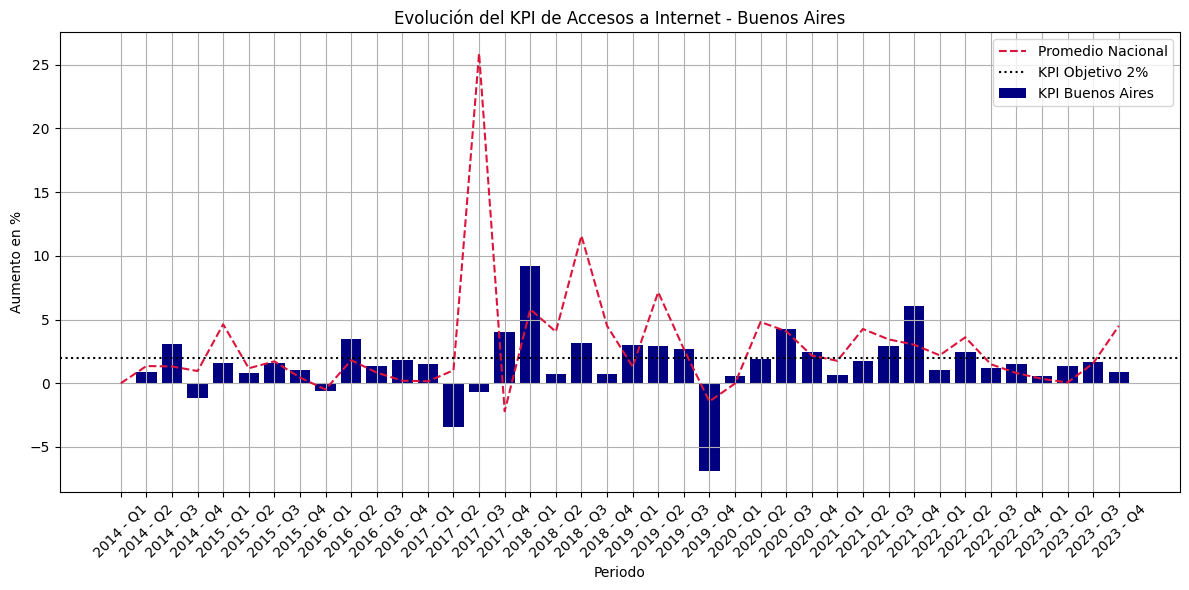

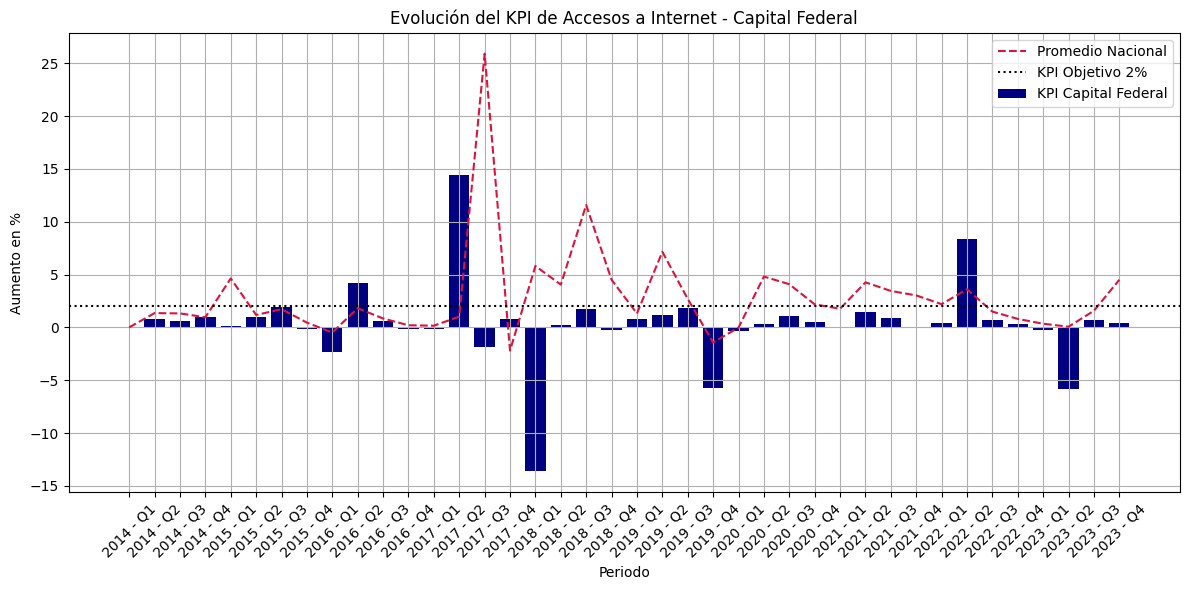

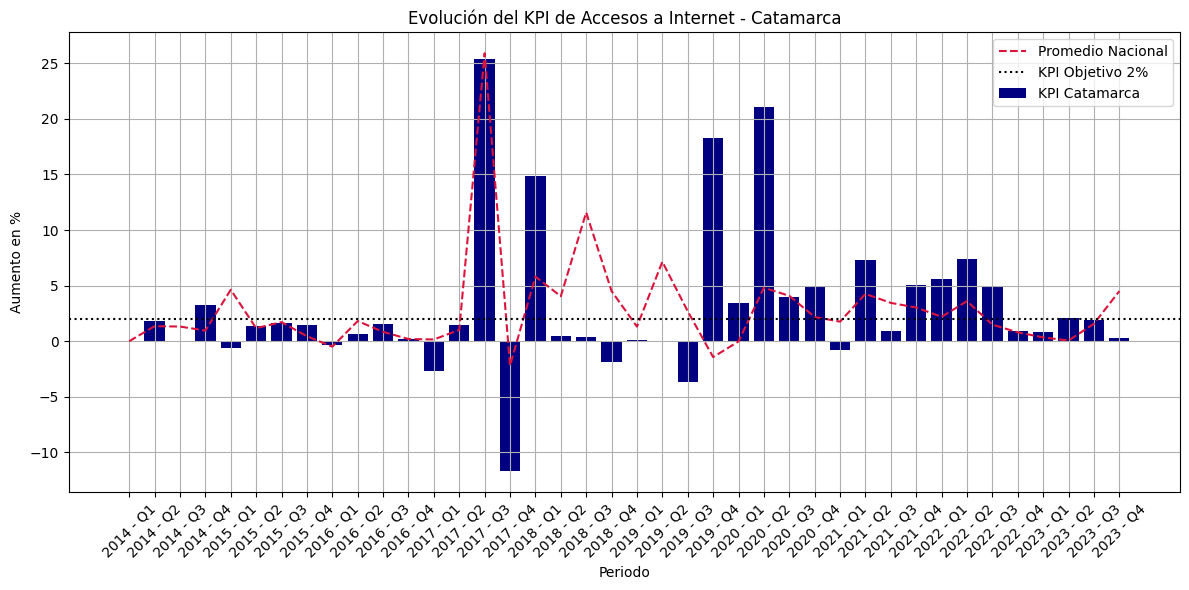

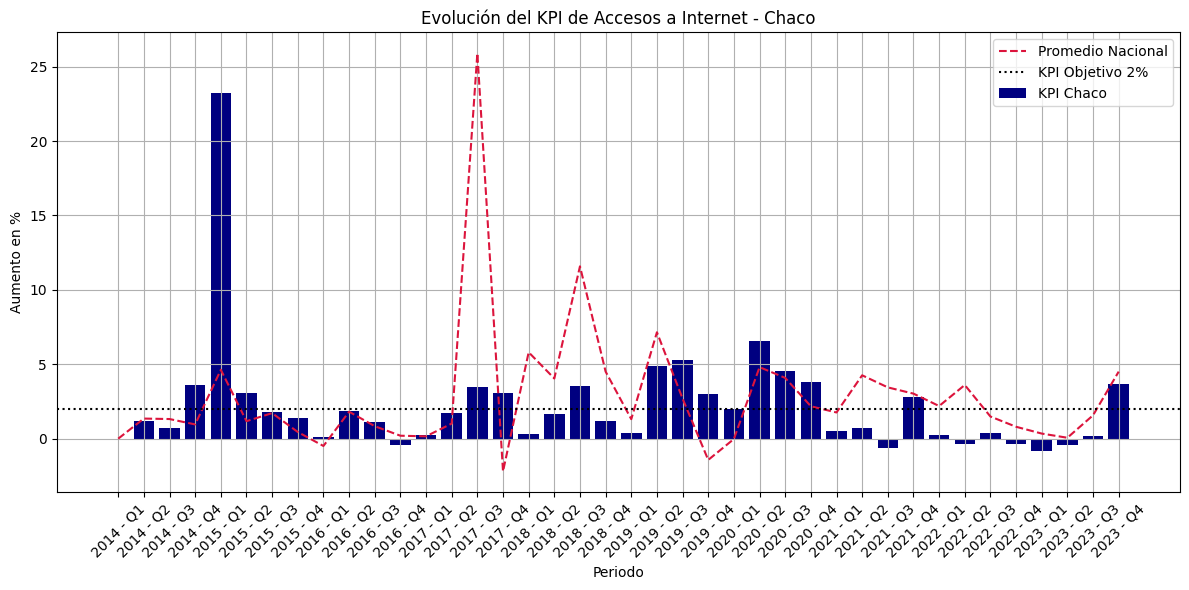

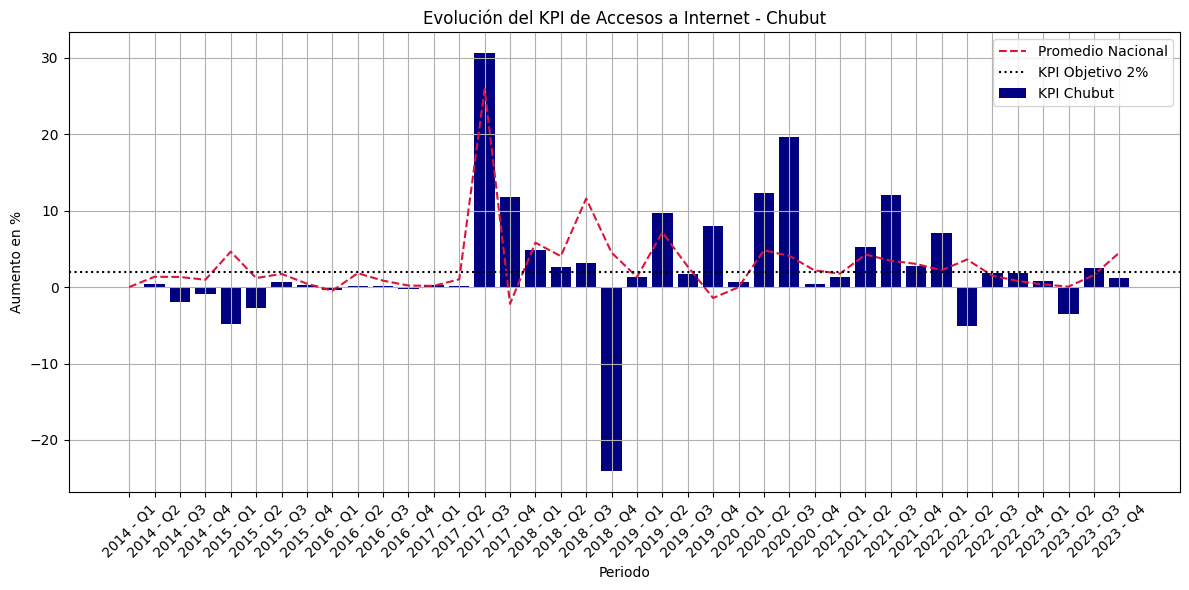

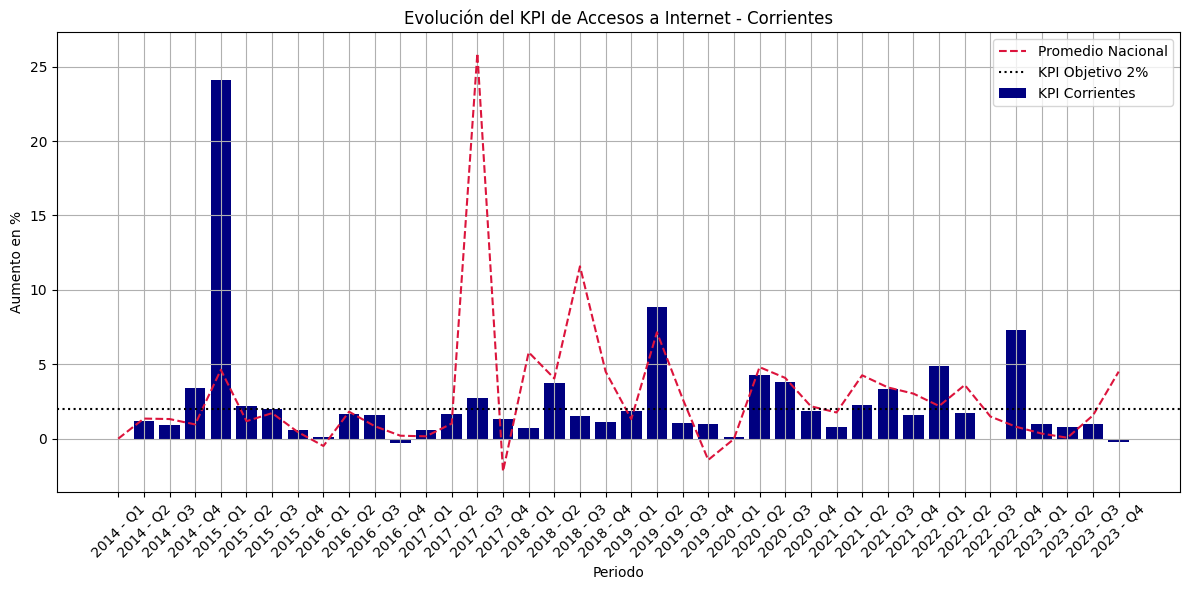

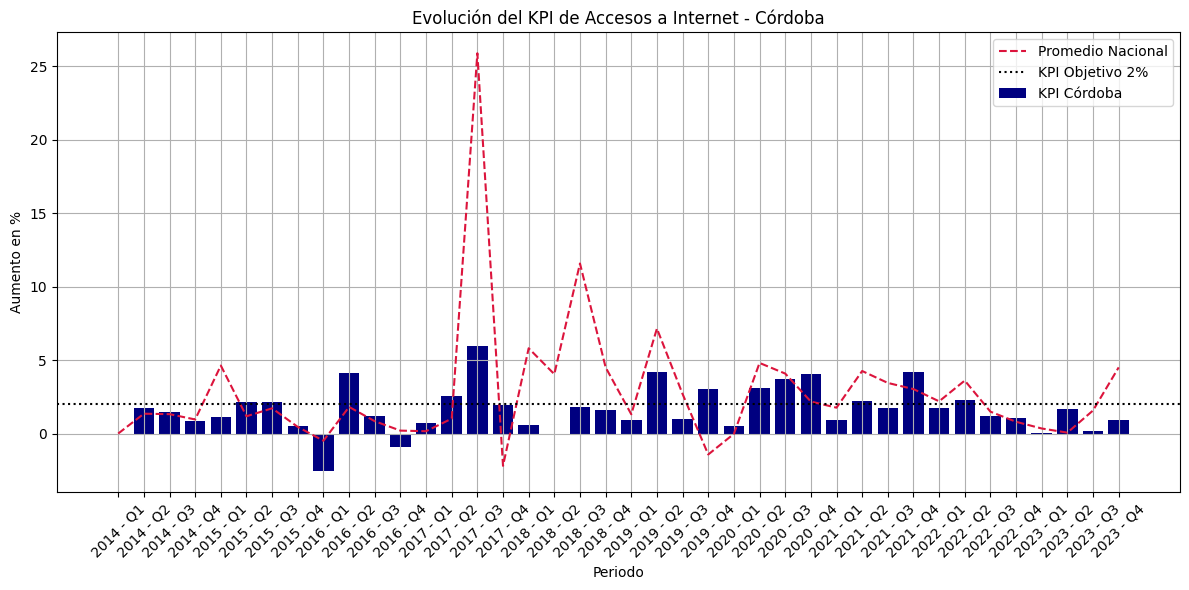

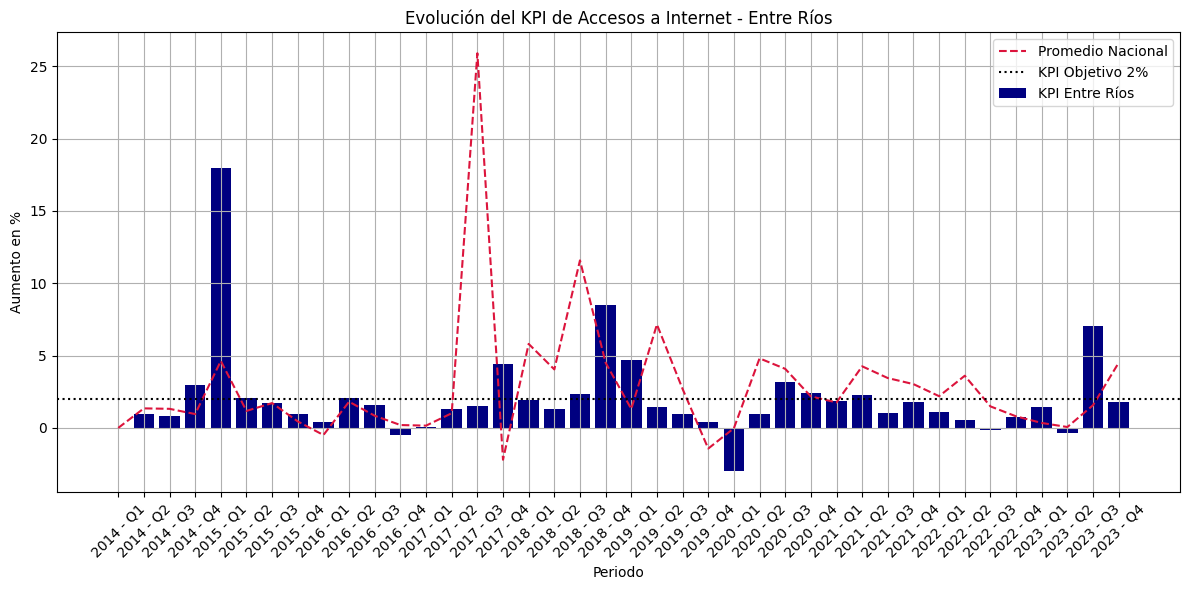

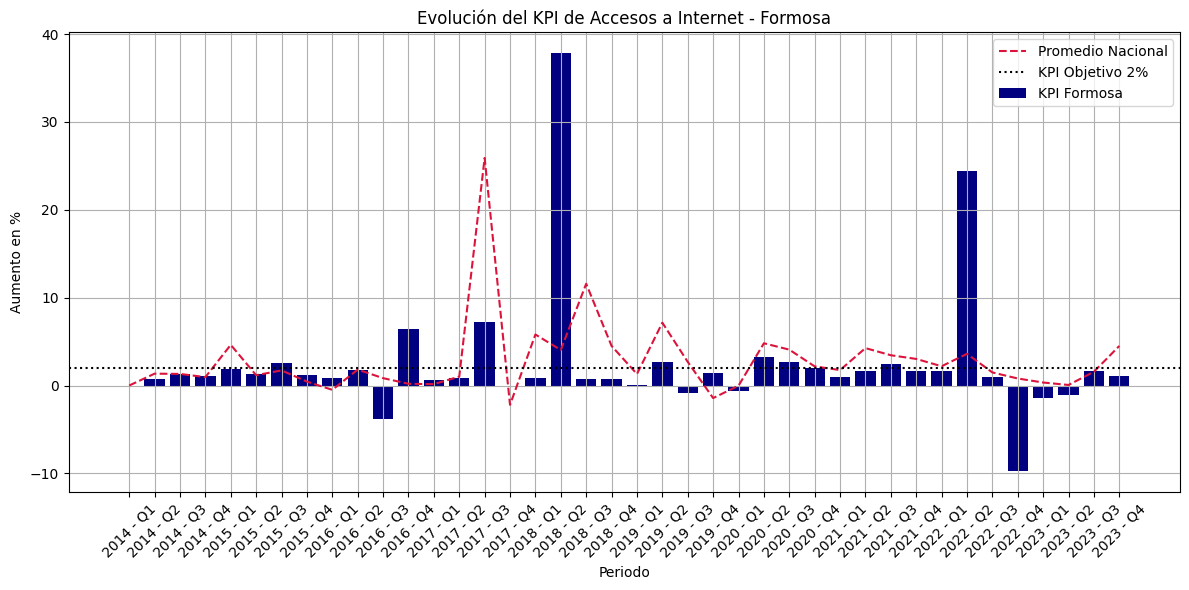

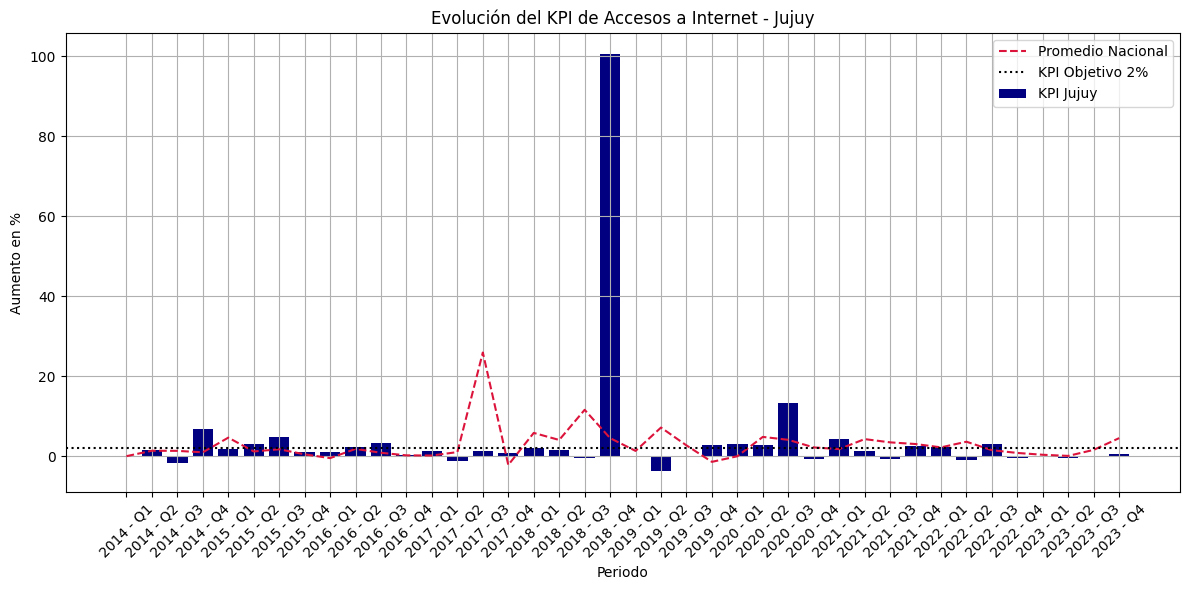

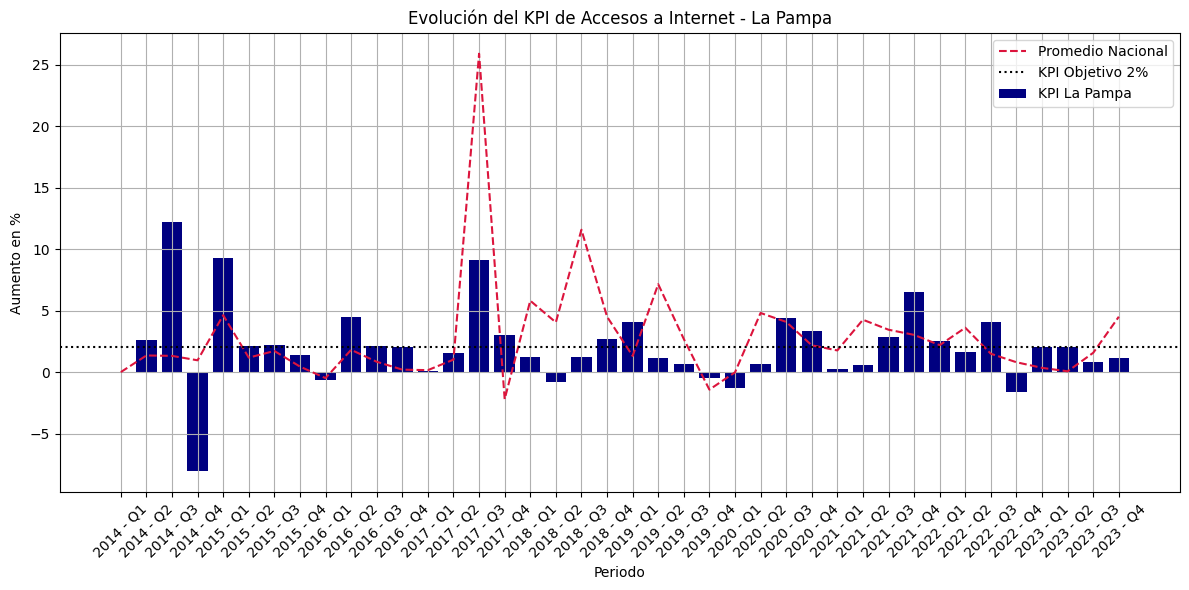

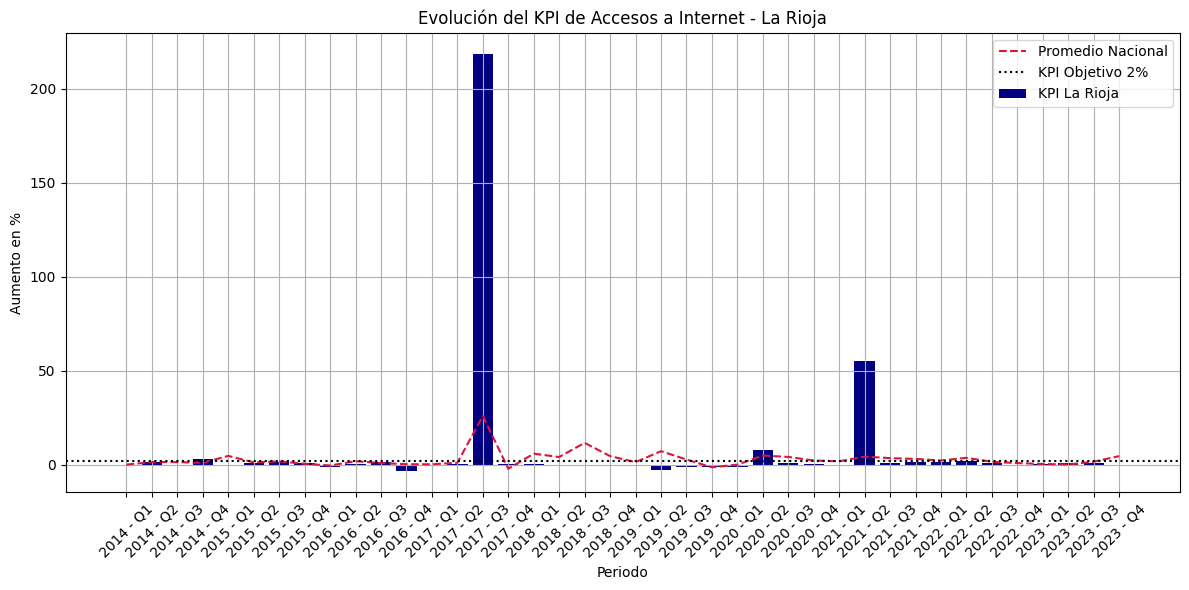

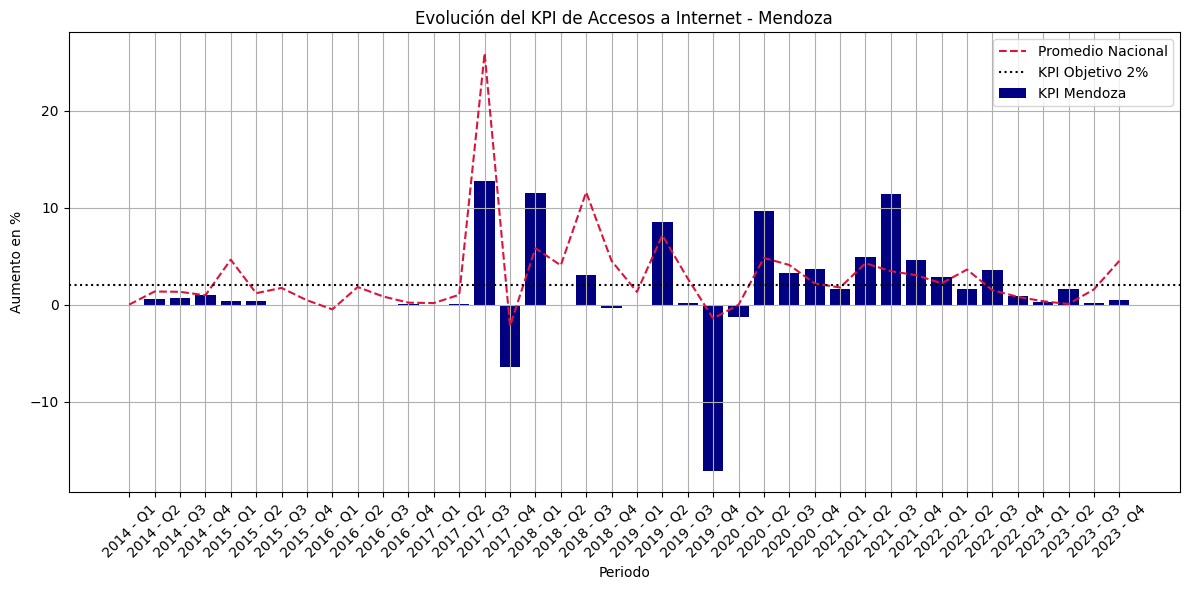

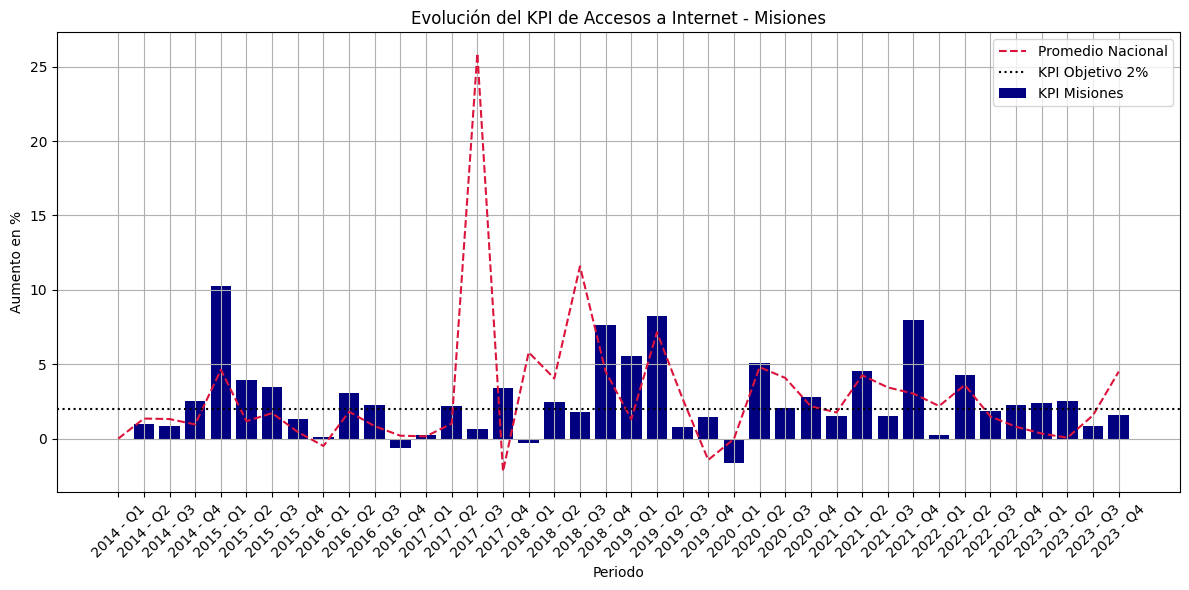

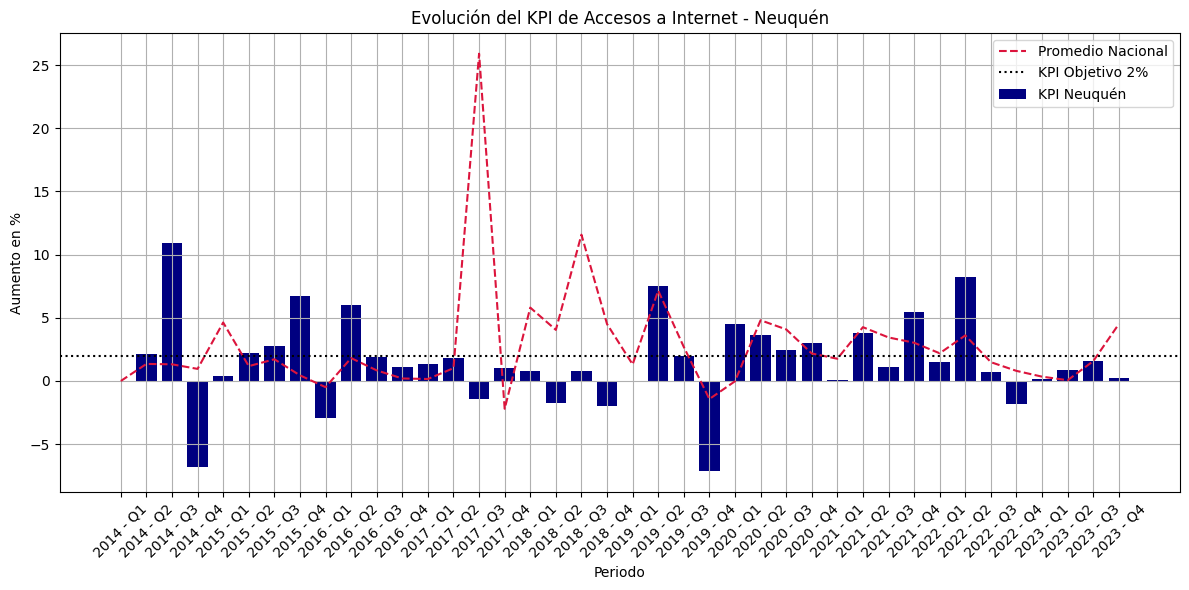

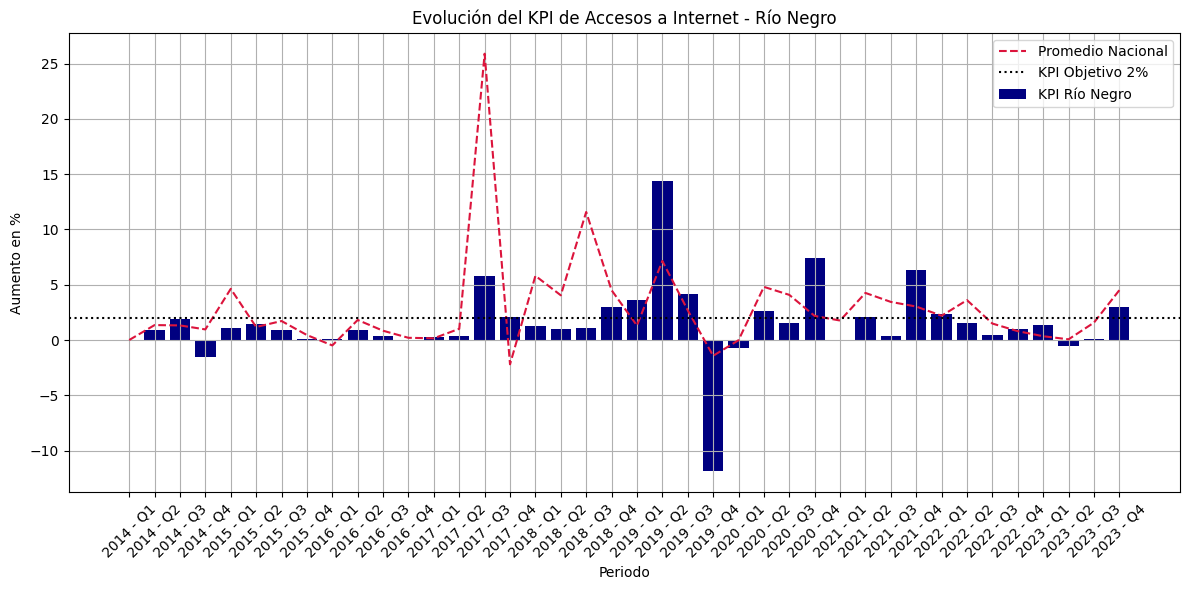

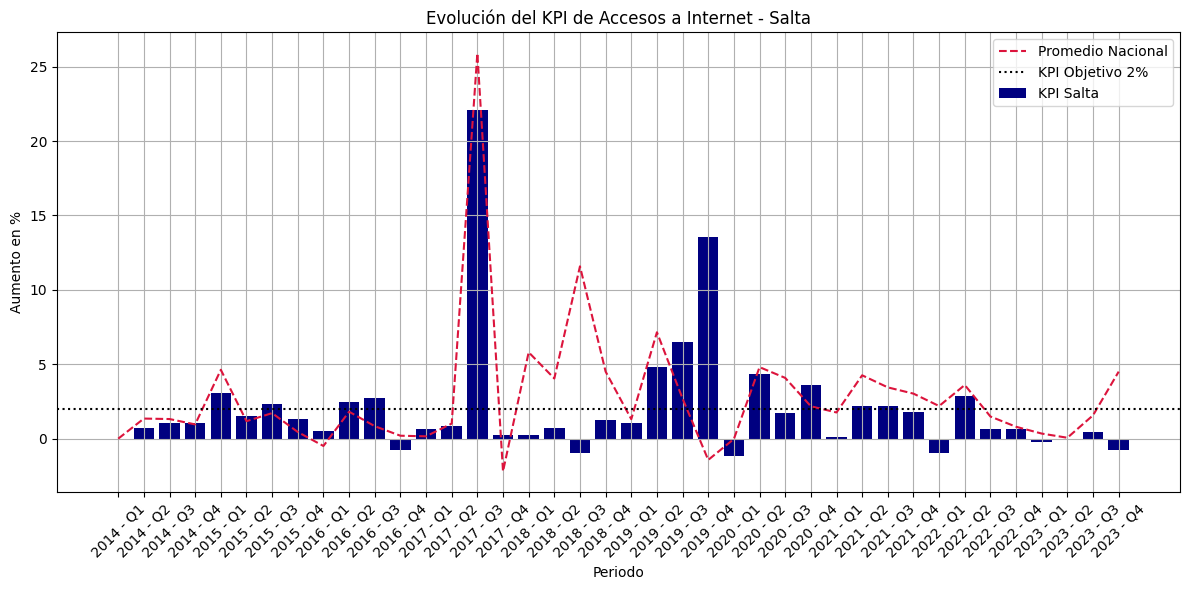

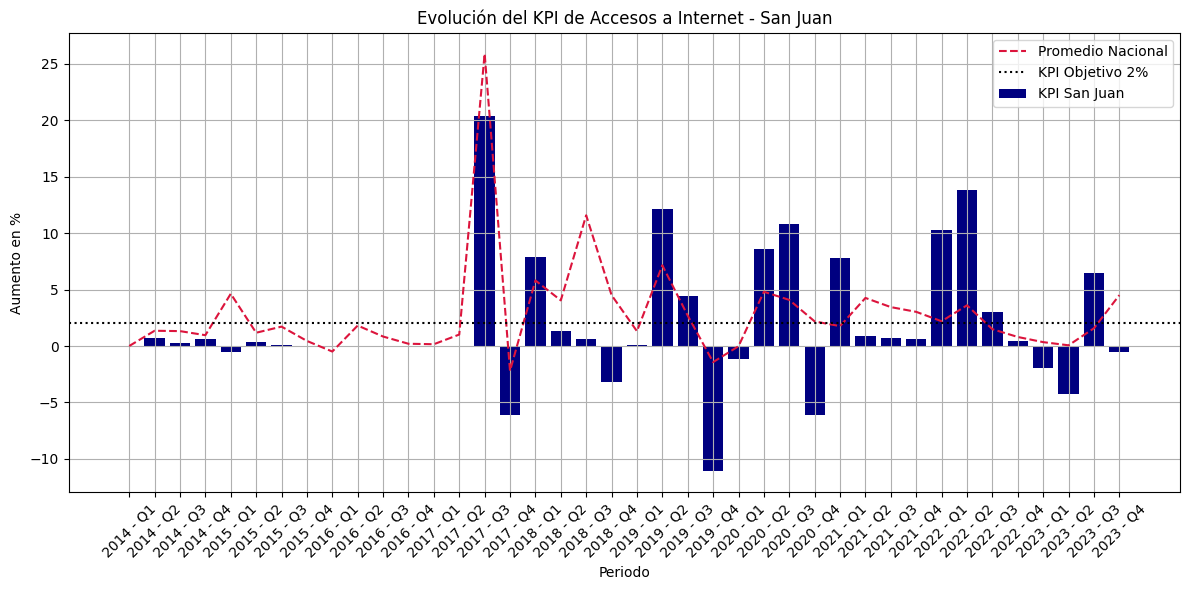

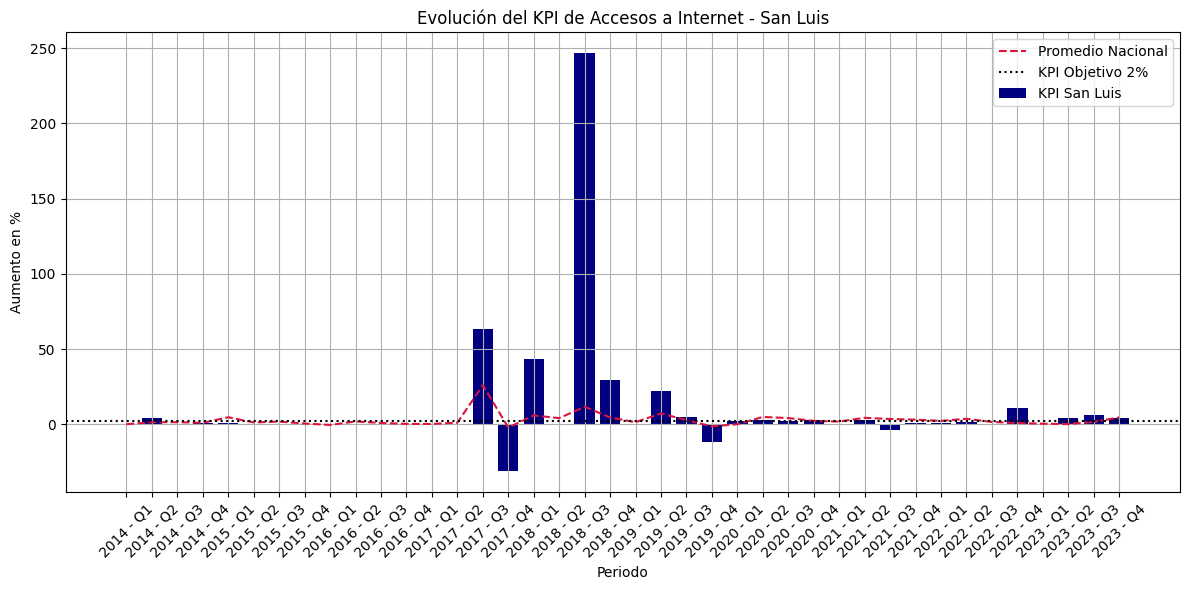

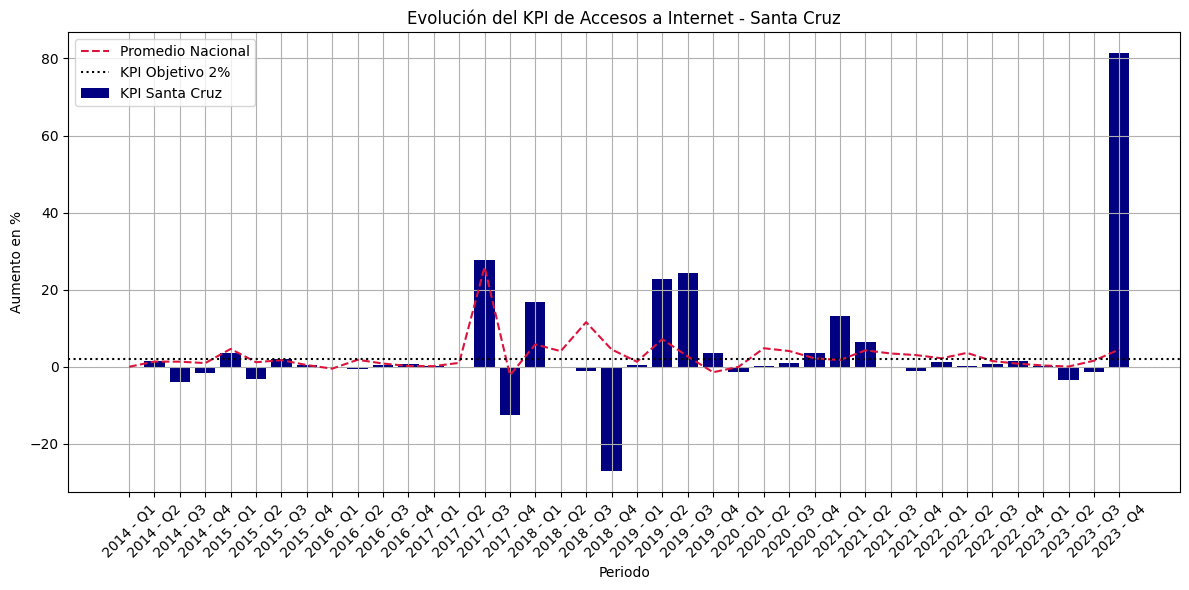

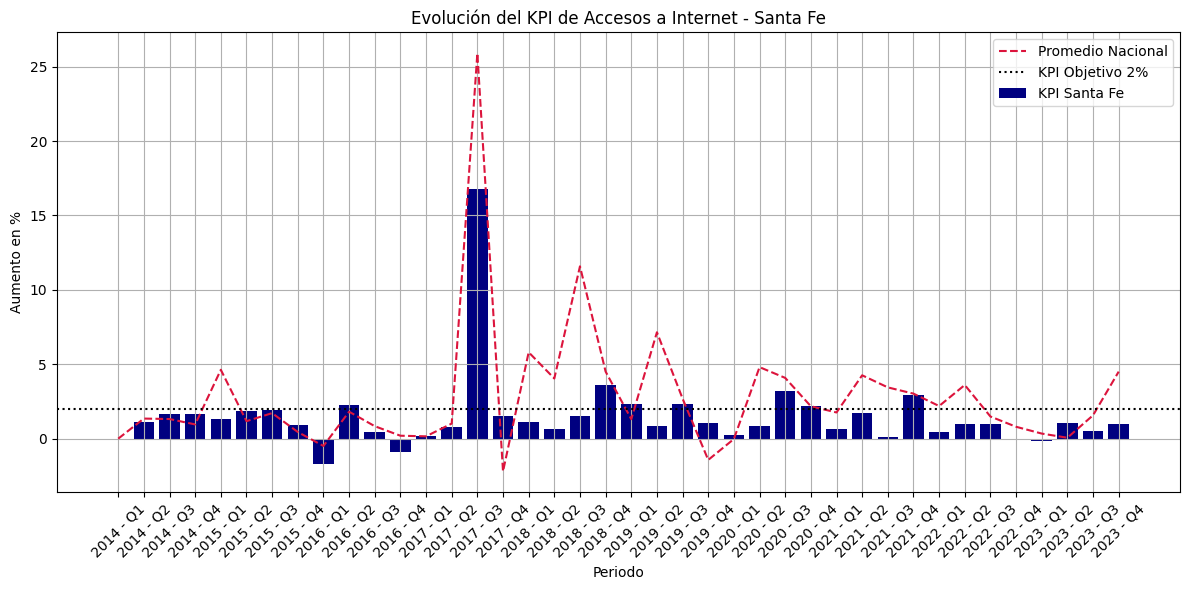

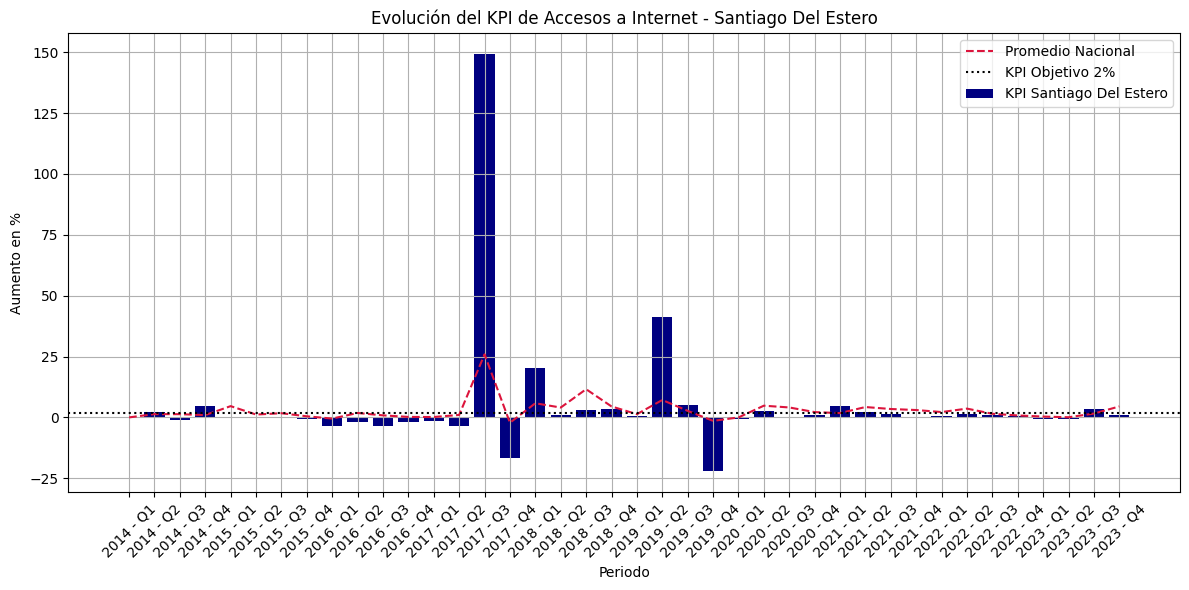

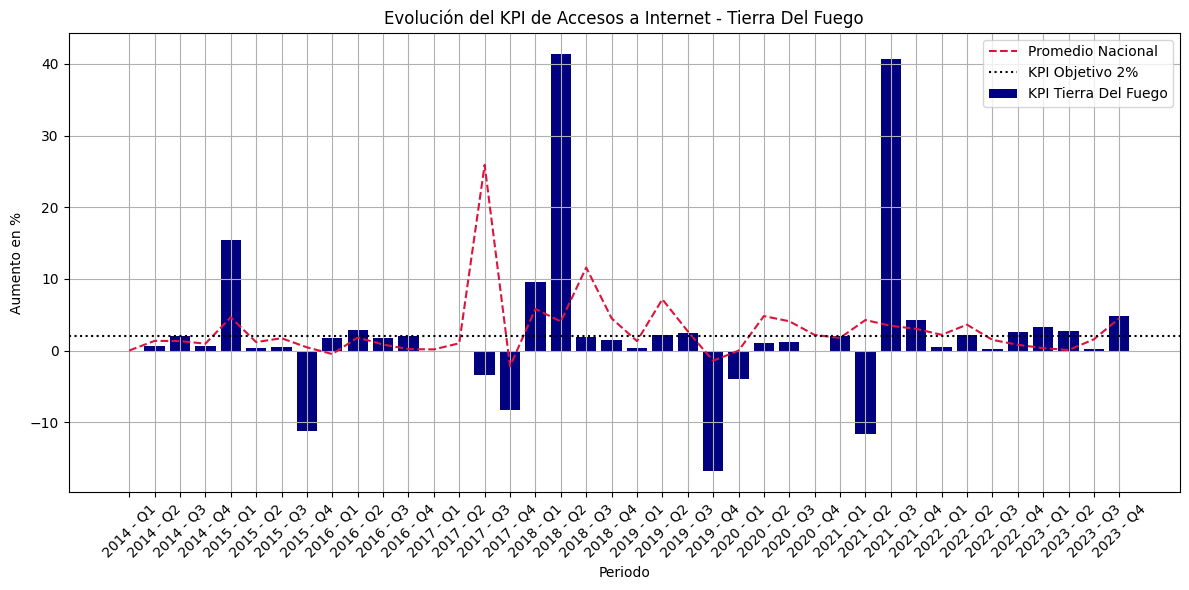

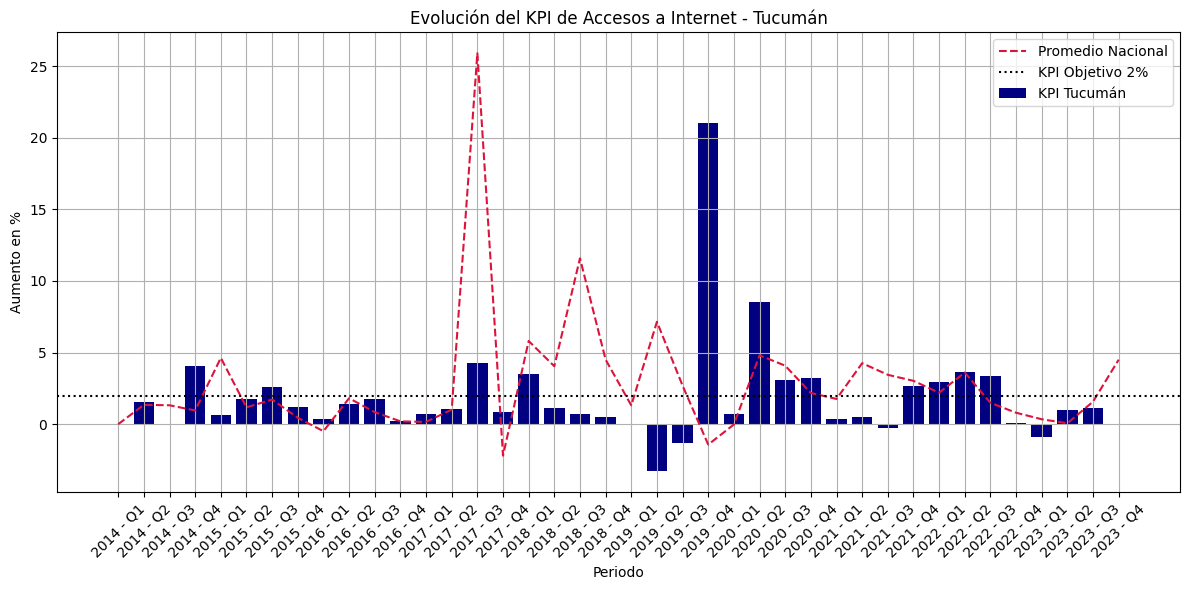

In [127]:
# Creamos la columna de accesos totales
df['Accesos Totales'] = df[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']].sum(axis=1)

# Ordenar por Provincia y Periodo
df = df.sort_values(by=['Provincia', 'Periodo'])

# Calcular 'Nuevos Accesos'
df['Accesos Totales en el Periodo Anterior'] = df.groupby('Provincia')['Accesos Totales'].shift(1)
df['Nuevos Accesos'] = df['Accesos Totales'] - df['Accesos Totales en el Periodo Anterior']

# Calcular el KPI
df['KPI'] = (df['Nuevos Accesos'] / df['Accesos Totales en el Periodo Anterior']) * 100

# Eliminar filas donde no se puede calcular 'Nuevos Accesos'
df = df.fillna(0)

# Calcular el promedio nacional del KPI para cada periodo
promedio_nacional_kpi = df.groupby('Periodo')['KPI'].mean().reset_index()

# Graficar el KPI histórico para cada provincia
provincias = df['Provincia'].unique()

# KPI objetivo
kpi_objetivo = 2

for provincia in provincias:
    plt.figure(figsize=(12, 6))
    df_provincia = df[df['Provincia'] == provincia]
    plt.bar(df_provincia['Periodo'], df_provincia['KPI'], label=f'KPI {provincia}', color='navy')
    
    # Graficar el promedio nacional
    plt.plot(promedio_nacional_kpi['Periodo'], promedio_nacional_kpi['KPI'], linestyle='--', color='crimson', label='Promedio Nacional')
    
    plt.axhline(y=kpi_objetivo, color='black', linestyle='dotted', label='KPI Objetivo 2%')

    plt.xlabel('Periodo')
    plt.ylabel('Aumento en %')
    plt.title(f'Evolución del KPI de Accesos a Internet - {provincia}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


En los cuadros mostrados anteriormente podemos observar que historicamente el 2017 a sido el periodo de mayor crecimiento a nivel nacional, sinembargo en rasgos generales no a tenido un crecimiento sostenido en ninguna de las provincias.

Tambien podemos observar que, si bien la tendencia nacional cumple con el aumento del 2% en nuevos accesos, ésta no es representativa de el verdadero cumplimiento del KPI (2% por Provincia) ya que esta severamente cesgada por Outliers como Santa Cruz (aumento del 80%), que es consistente con el analisis anterior sobre el estado de desigualdad entre provincias de la red.

Ademas es notorio la tendencia a la baja de esta metrica a medida que el nuemero total de accesos aumenta.

Creo que seria valioso agregar una visualizacion sobre el nivel de desigualdad en el Acceso a la red de internet a nivel pais, para ello utilizaremos el numero de Accesos por cada 100 hogares de cada provincia y el promedio nacional para producir un coeficiente.

In [128]:
# Calcular promedio nacional de accesos por cada 100 hogares
promedio_nacional_accesos = df.groupby('Periodo')['Accesos por cada 100 hogares'].mean().reset_index()
df = pd.merge(df, promedio_nacional_accesos.rename(columns={'Accesos por cada 100 hogares': 'Accesos por cada 100 hogares (nacional)'}), on=['Periodo'], how='left')

# Calcular el coeficiente de Gini para la distribución de accesos por provincia
def gini_entre_provincias(data):
    '''
    Esta funcion agrupa la columna 'Accesos por cada 100 hogares' de nuestro Data Frame por la columna 'Periodo' y le aplica el coefficiente de Gini
    Retorna: Un Data Frame de dos columnas (el Periodo y los Valores del Coeficiente)
    '''
    gini_values = data.groupby('Periodo')['Accesos por cada 100 hogares'].apply(gini_coefficient).reset_index()
    return gini_values

def gini_coefficient(x):
    '''
    Esta funcion esta diseñada para ejecutar el Coeficiente de Gini sobre una columna especifica.
    El coeficiente de Gini es una medida estandar utilizada en Economia y Politica a nivel mundial.
    Retorna: Una serie de valores entre 0 y 1 donde 0 es una distribucion perfectamente equitativa y 1 es el maximo de inequidad posible.
    '''
    n = len(x)
    x_sorted = np.sort(x)
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * x_sorted)) / (n * np.sum(x_sorted)))

CoDePH = gini_entre_provincias(df)
df = pd.merge(df, CoDePH.rename(columns={'Accesos por cada 100 hogares': 'Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'}), on=['Periodo'], how='left')

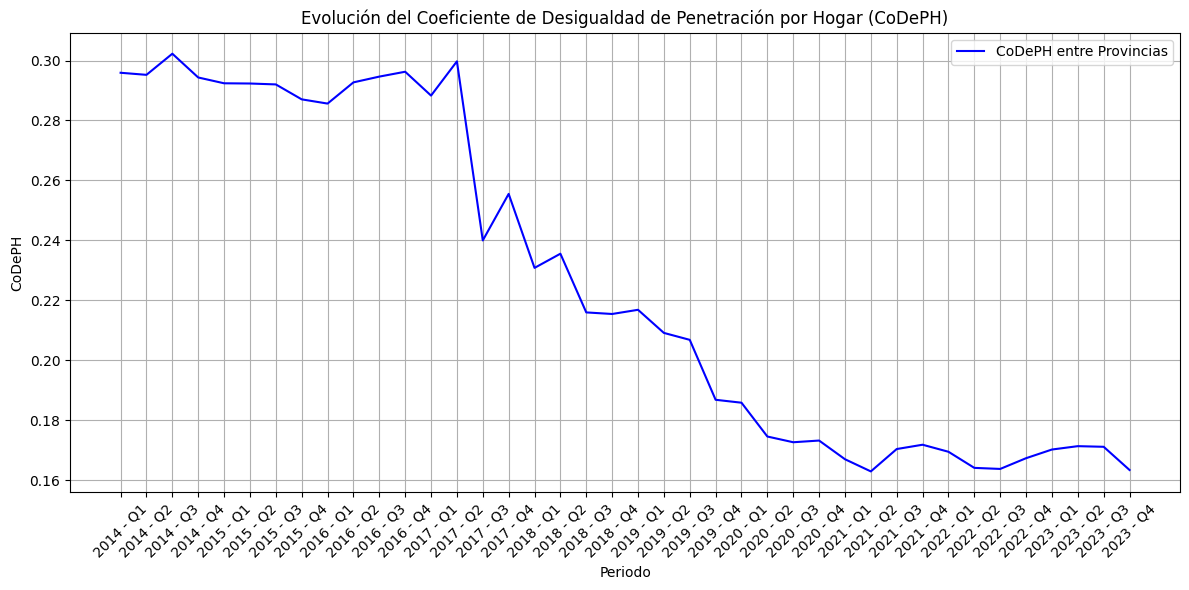

In [129]:
df = df.sort_values(by='Periodo')

# Graficar CoDePH a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Periodo'], df['Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'], linestyle='-', color='b', label='CoDePH entre Provincias')
plt.xlabel('Periodo')
plt.ylabel('CoDePH')
plt.title('Evolución del Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Tras observar la visualizacion podemos ver que el CoDePh a disminuido enormemente desde el 2014, sin embargo hace ya 2 años que el progreso se estanco.
Seria interesante ponerse como objetivo la disminucion de este coeficiente.

Una vez observado el grado de alcance de la red, es interesante asegurarse que hay un progreso sobre la calidad de la misma. Para esto, teniendo en cuenta que la velocidad de la red esta fuertemente influenciada por el tipo de tecnologia utilizada, mediremos el porcentaje de accesos en Fibra Optica a nivel nacional.

In [130]:
# Calcular el Porcentaje de Red en Fibra Óptica (PReFO)
total_accesos_fibra_optica = df['Fibra óptica'].sum()
df['Porcentaje Fibra Óptica (PReFO)'] = (df['Fibra óptica'] / df['Accesos Totales']) * 100

# Calcular el promedio nacional del PReFO por período
PReFO_Nacional = df.groupby('Periodo')['Porcentaje Fibra Óptica (PReFO)'].mean().reset_index()

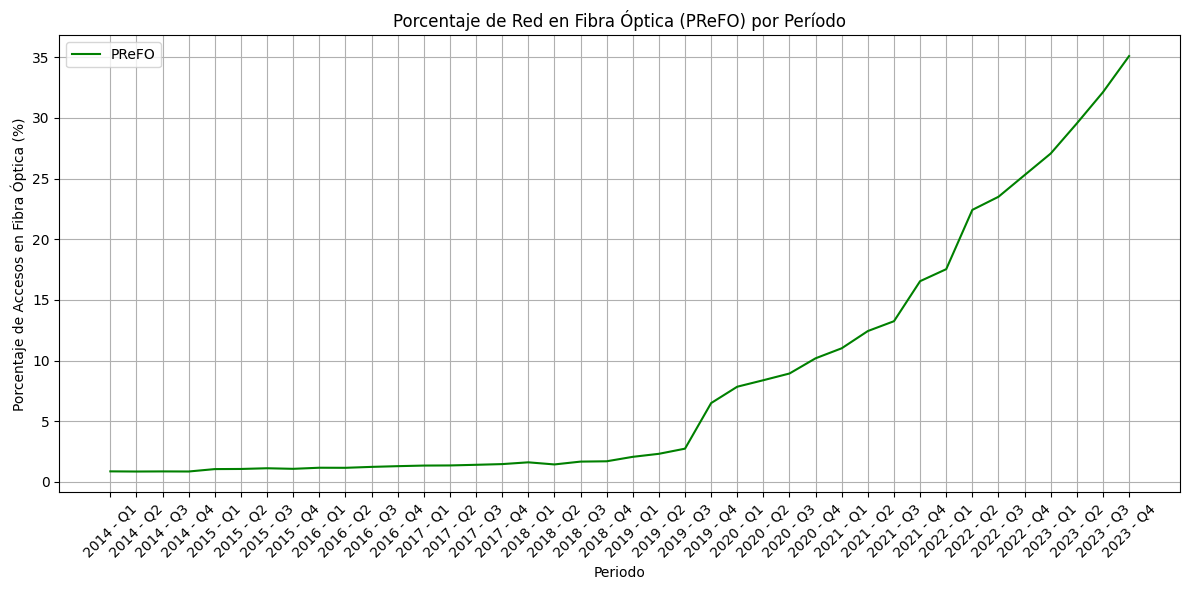

In [131]:
# Graficar el PReFO histórico
plt.figure(figsize=(12, 6))
plt.plot(PReFO_Nacional['Periodo'], PReFO_Nacional['Porcentaje Fibra Óptica (PReFO)'], linestyle='-', color='g', label='PReFO')
plt.xlabel('Periodo')
plt.ylabel('Porcentaje de Accesos en Fibra Óptica (%)')
plt.title('Porcentaje de Red en Fibra Óptica (PReFO) por Período')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

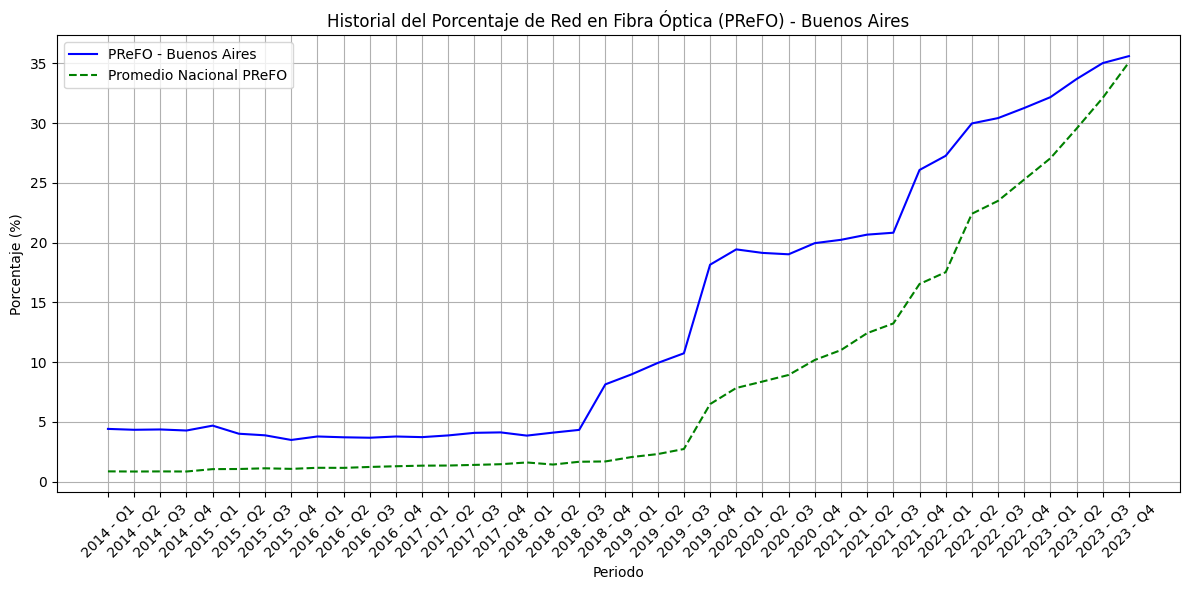

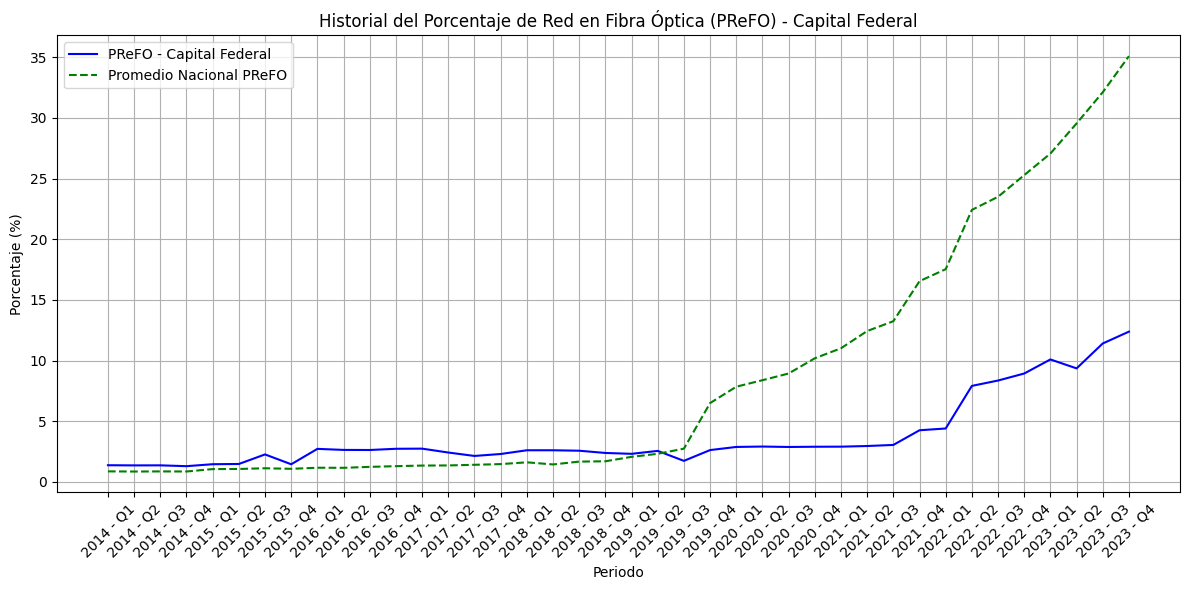

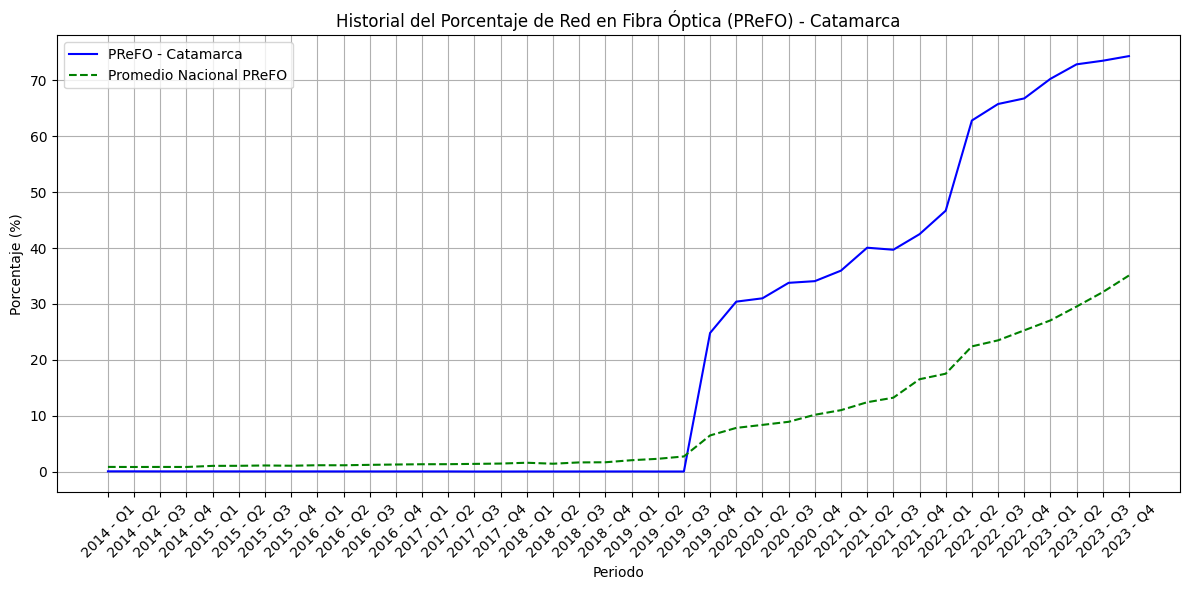

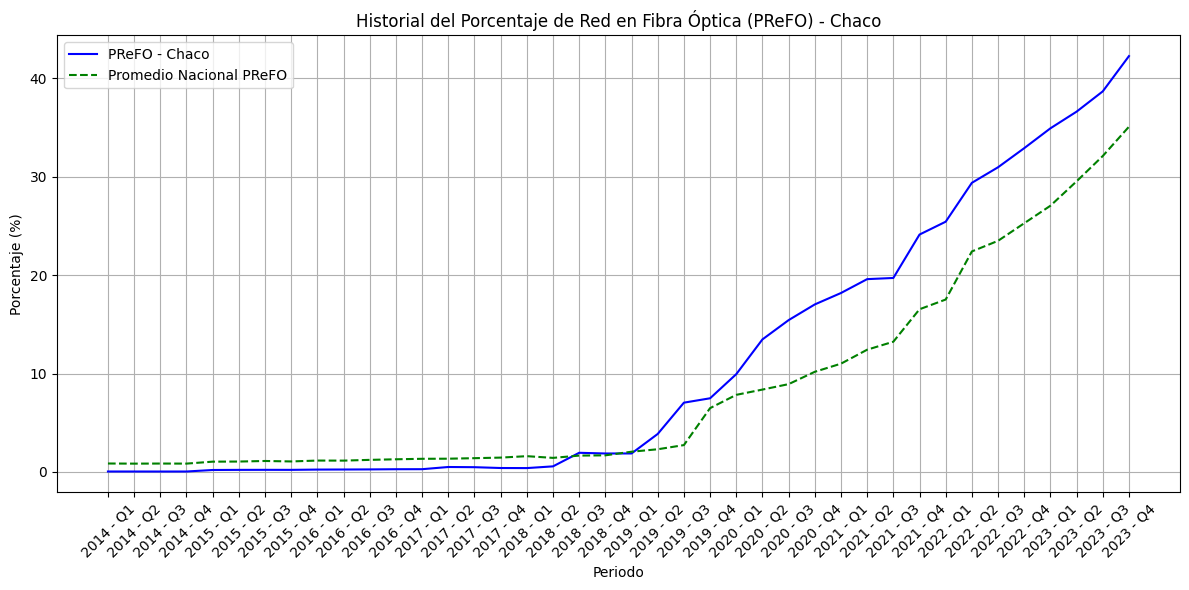

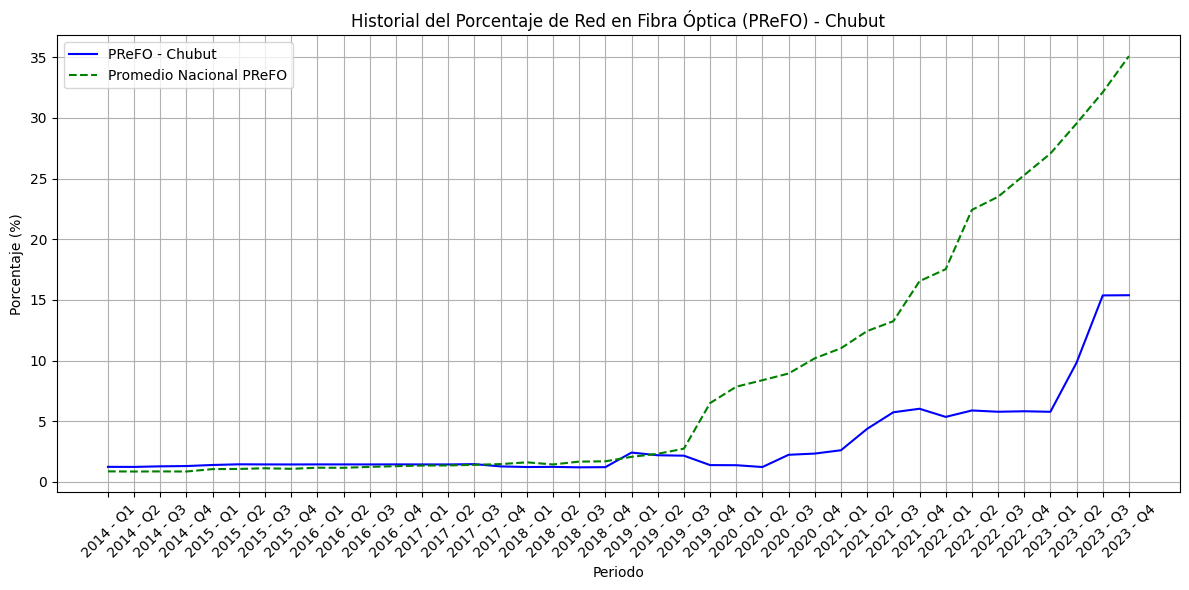

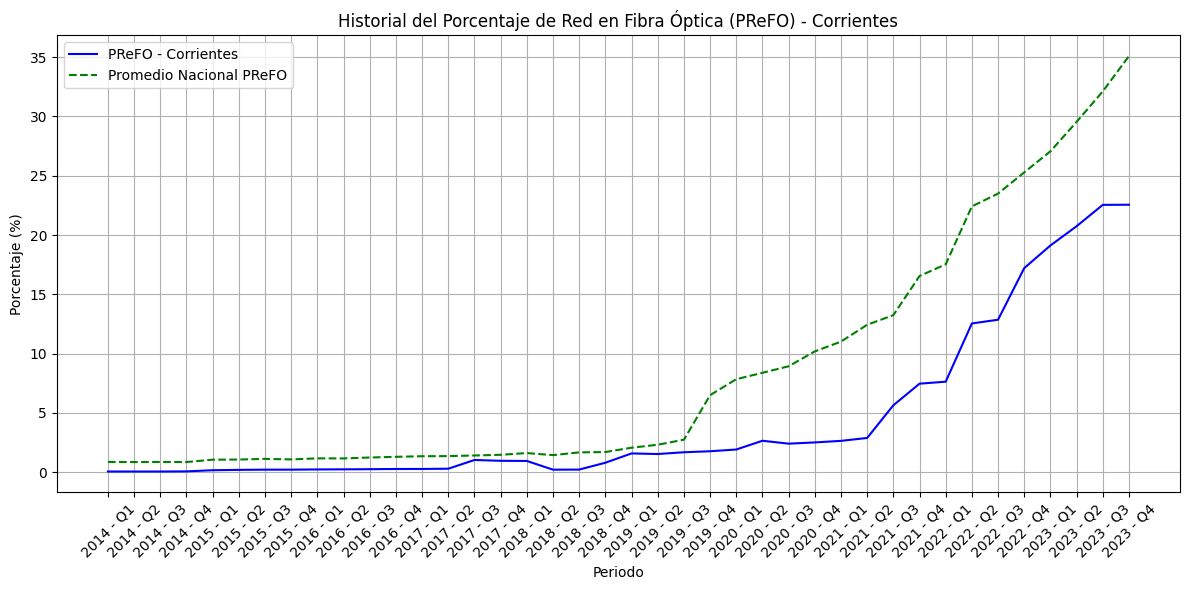

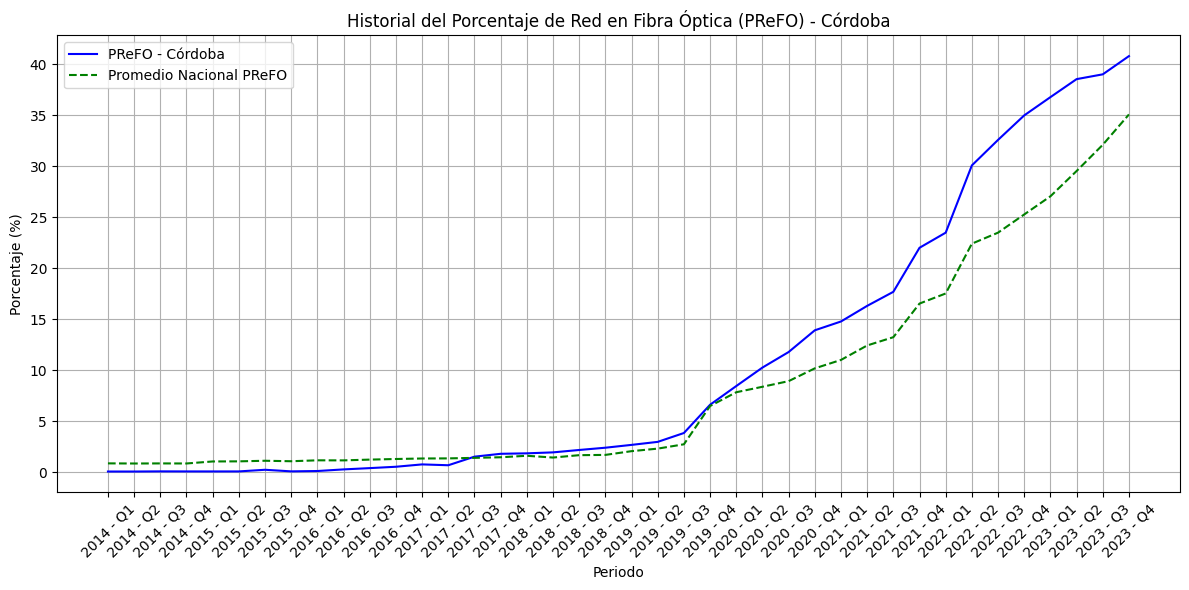

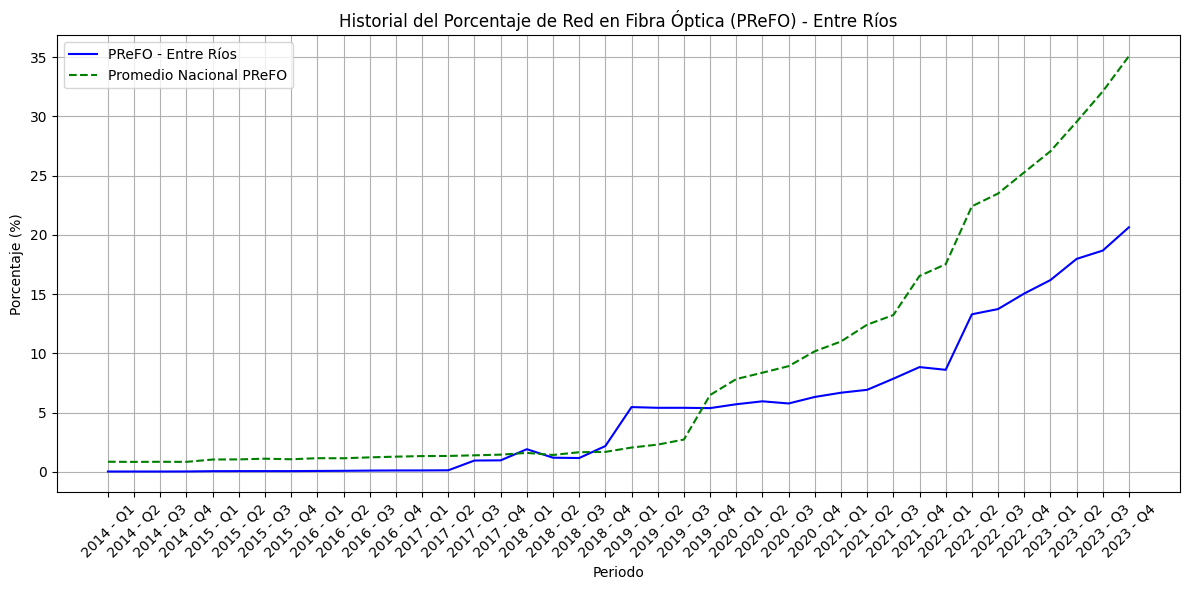

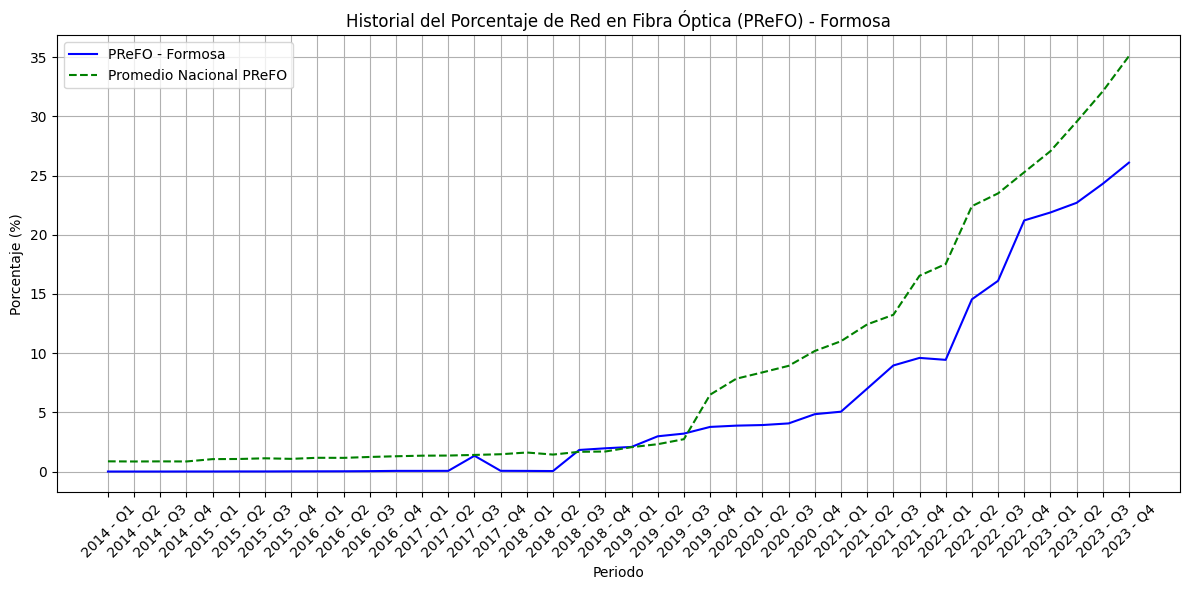

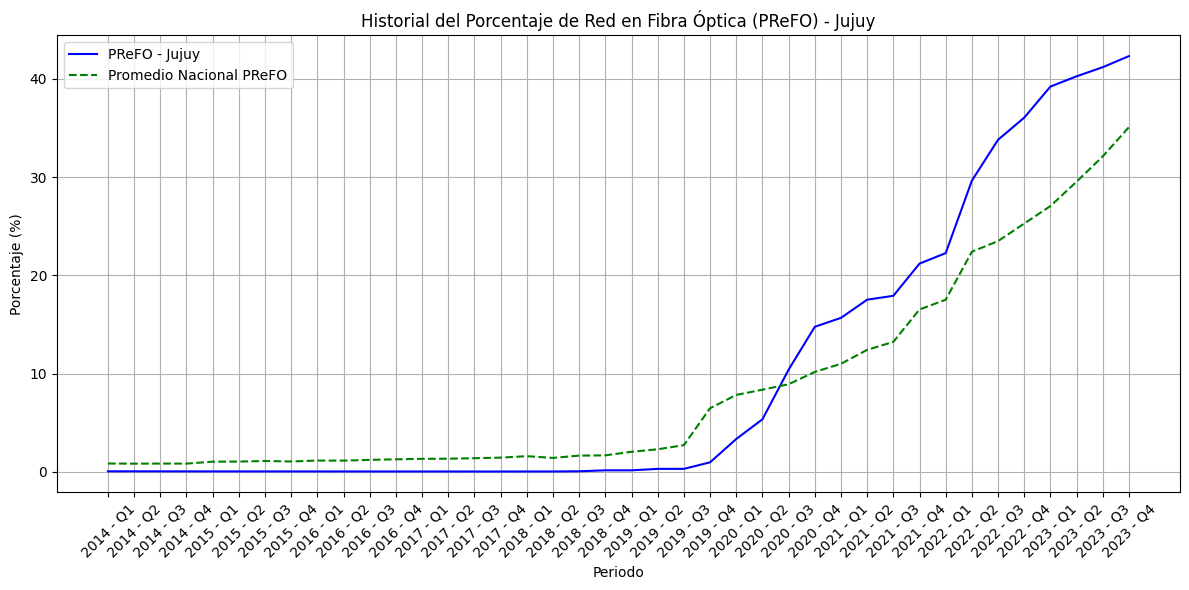

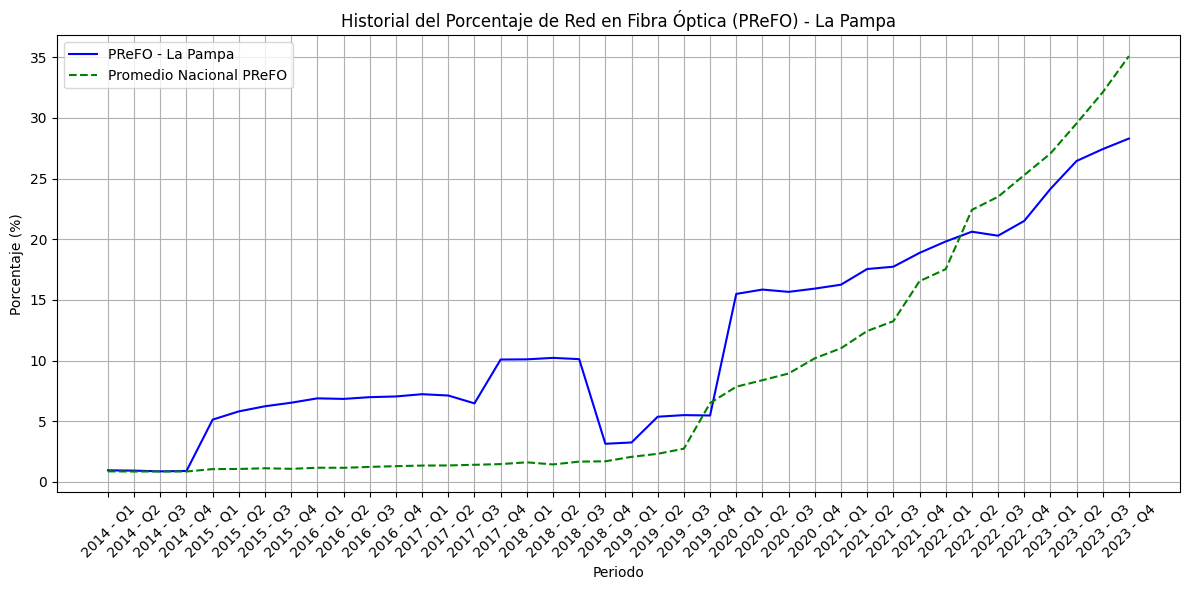

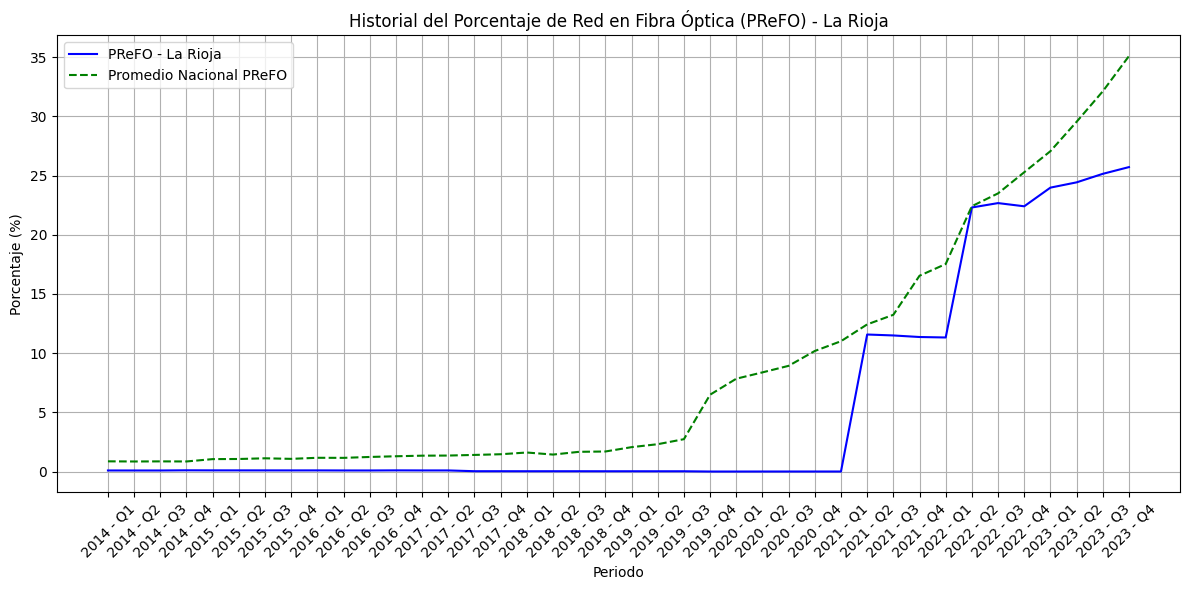

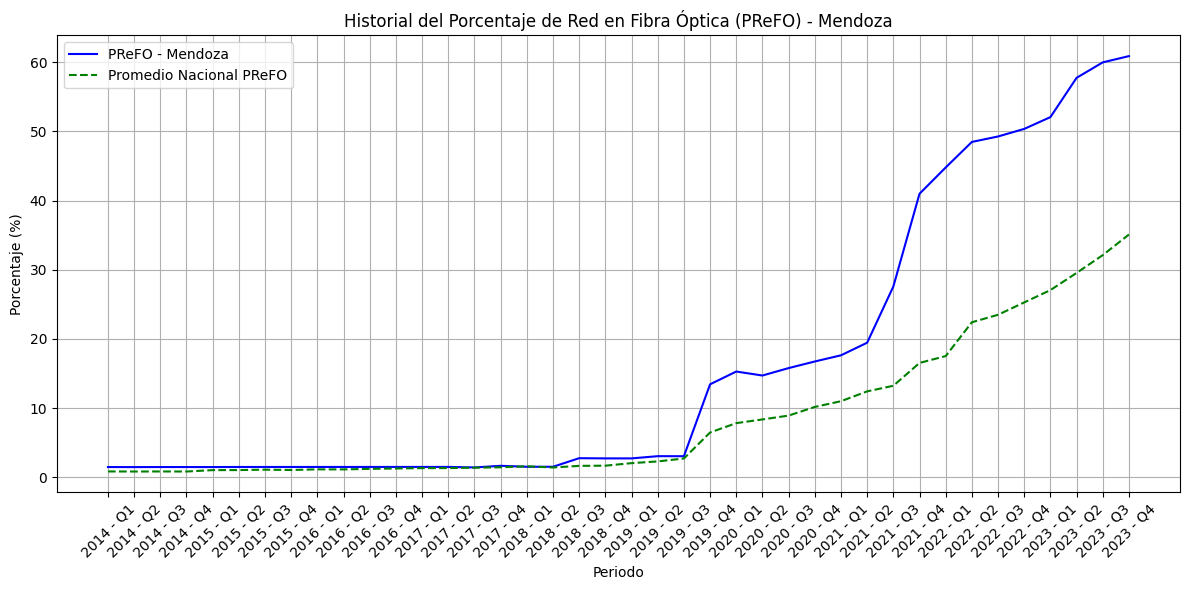

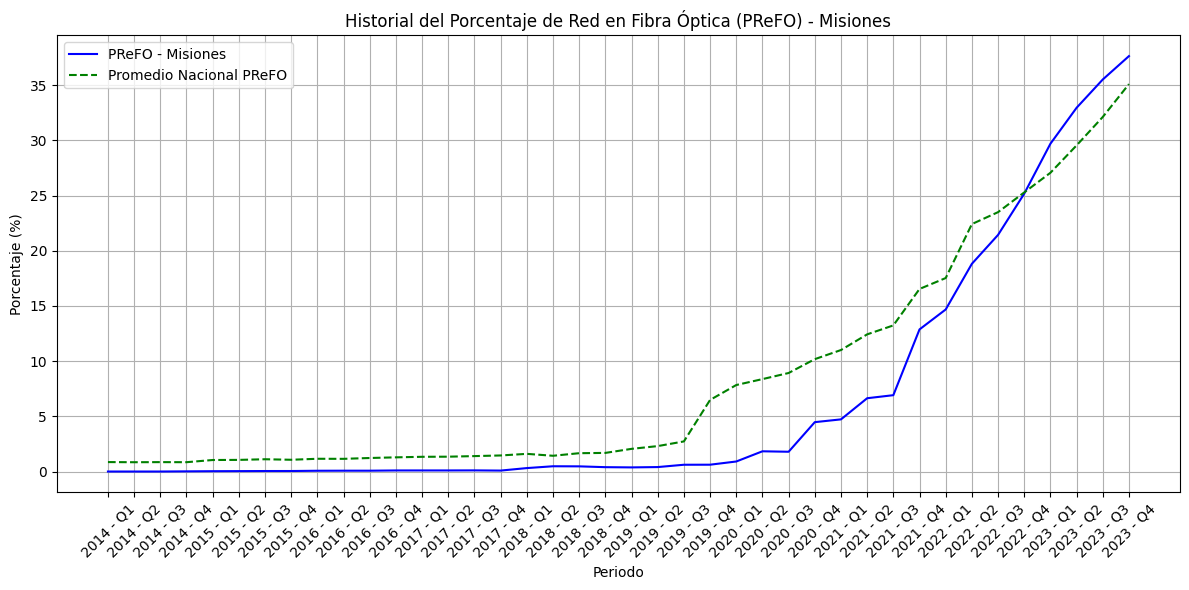

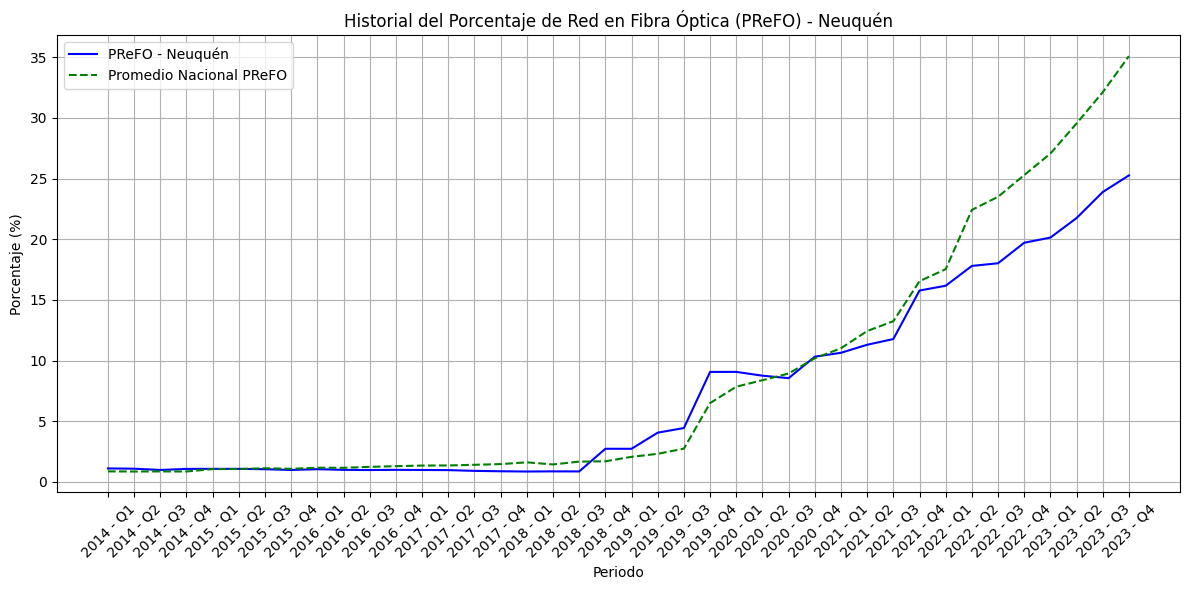

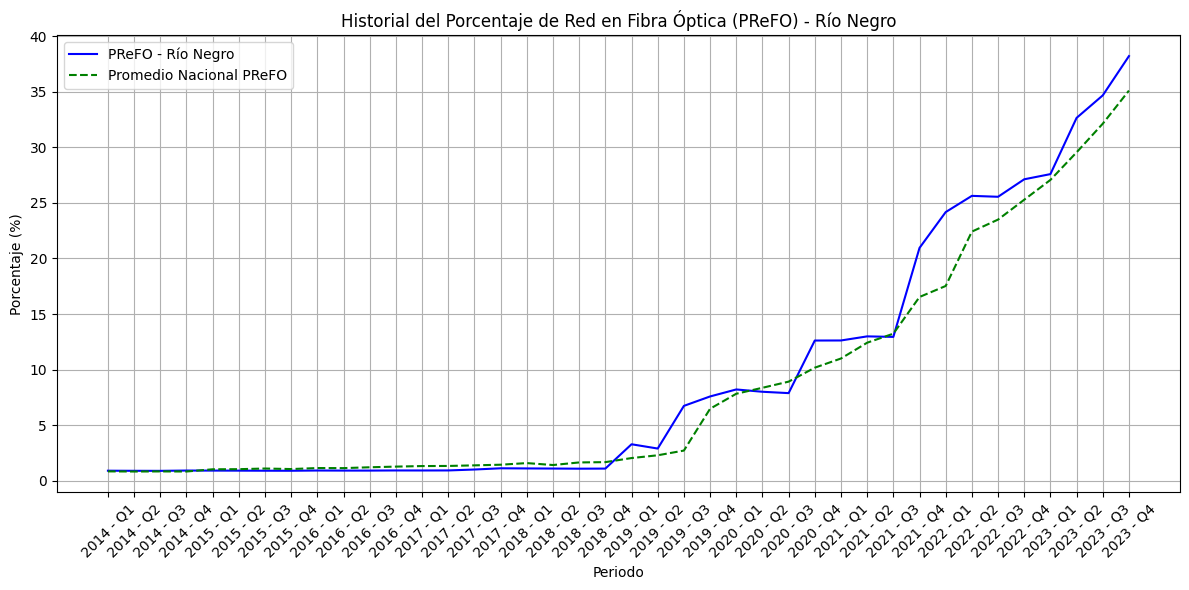

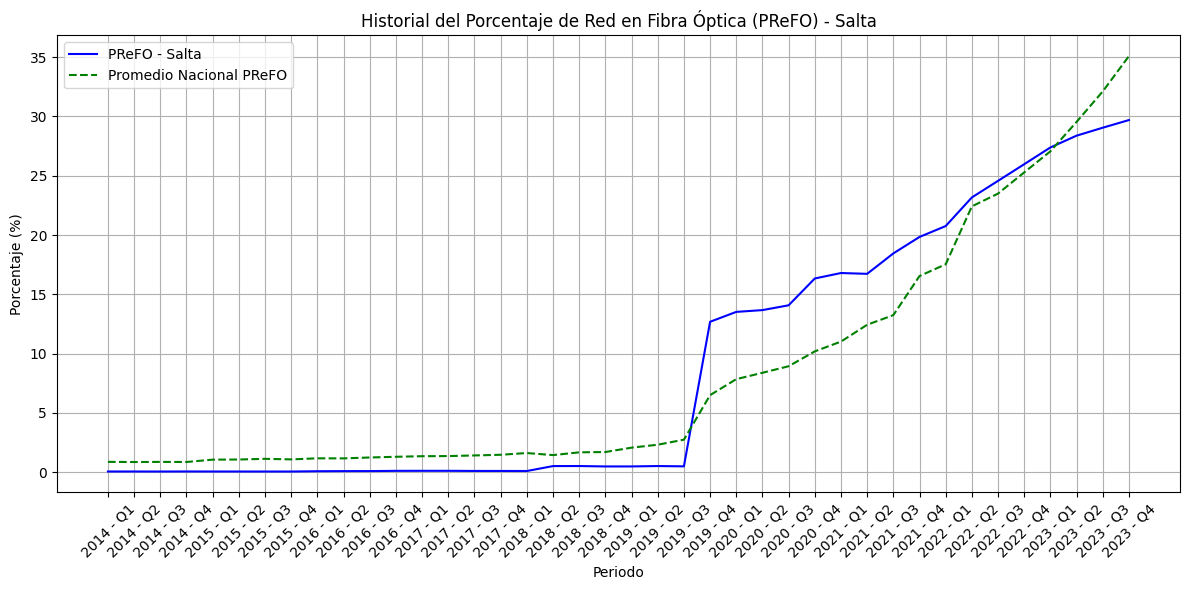

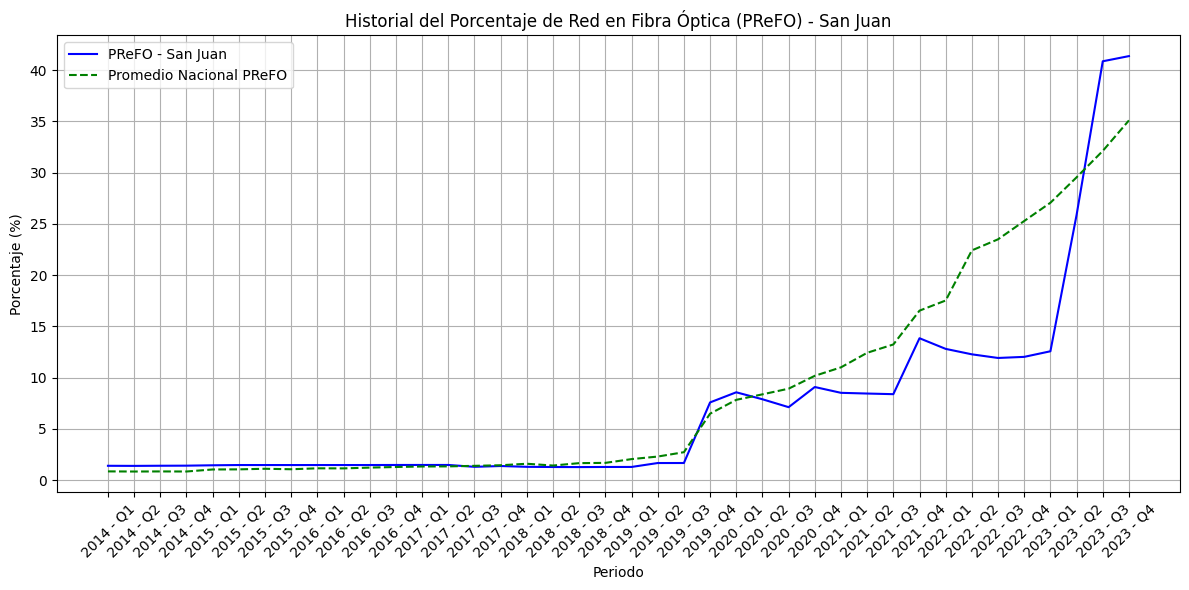

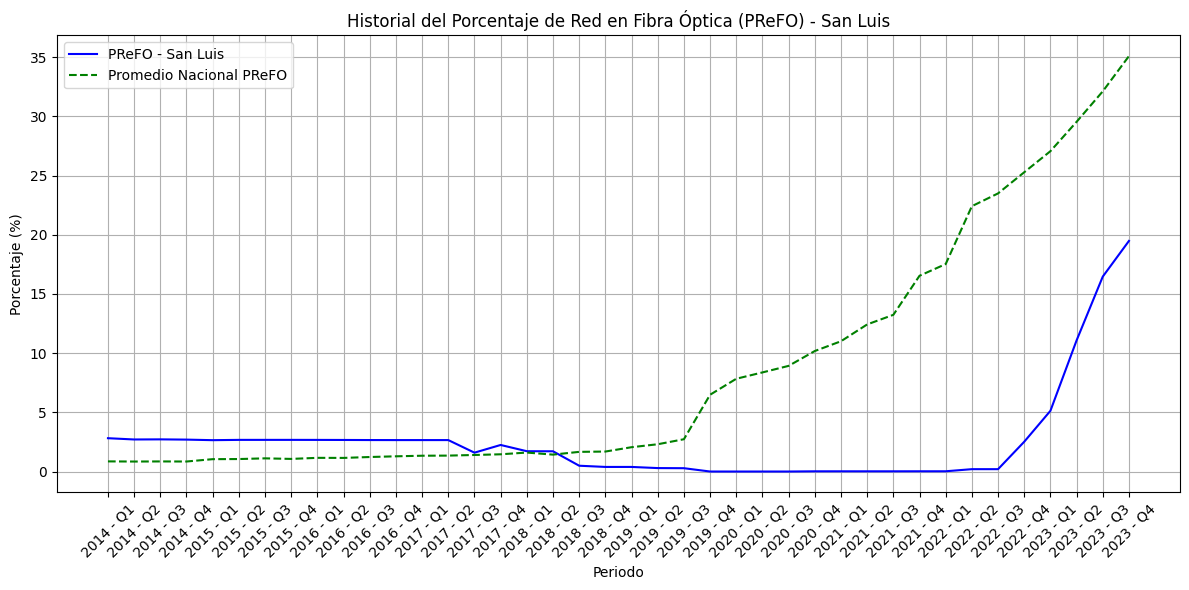

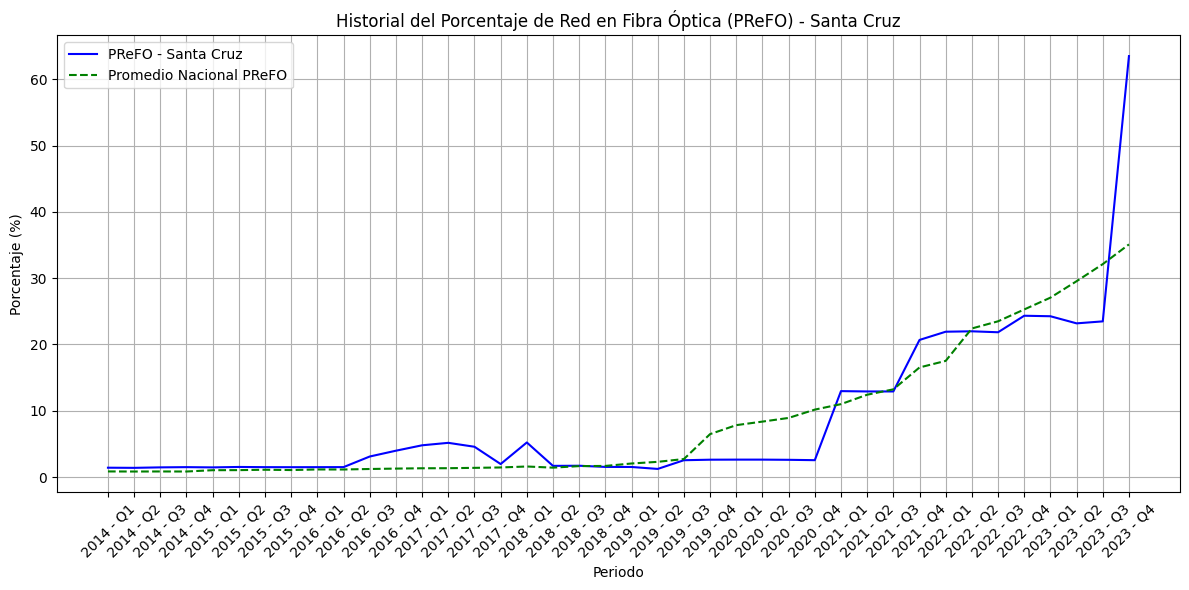

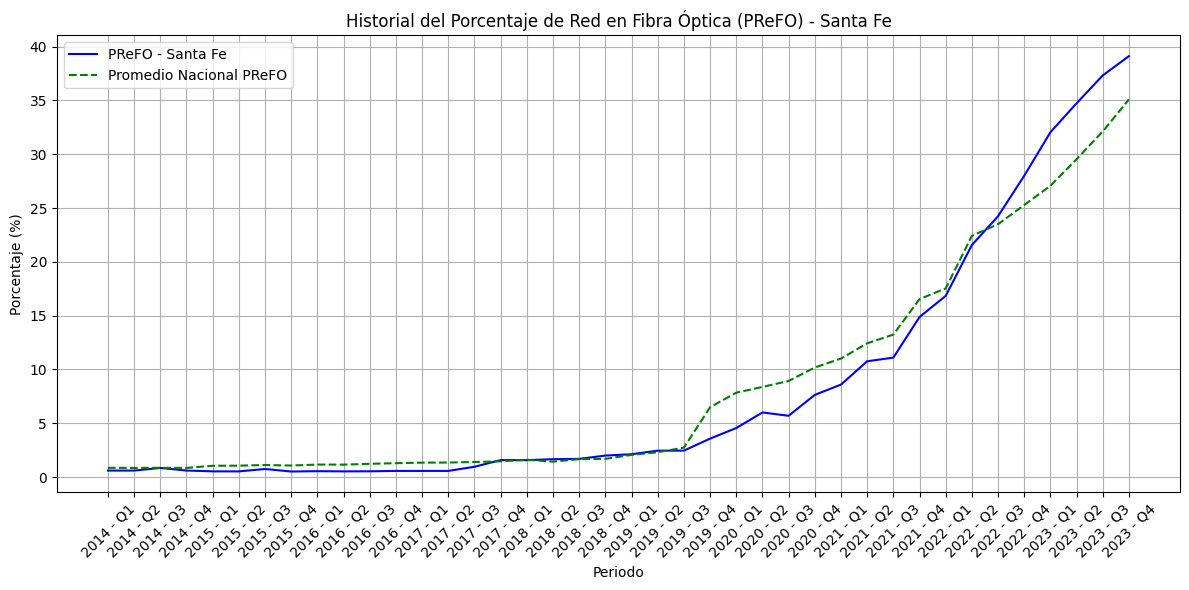

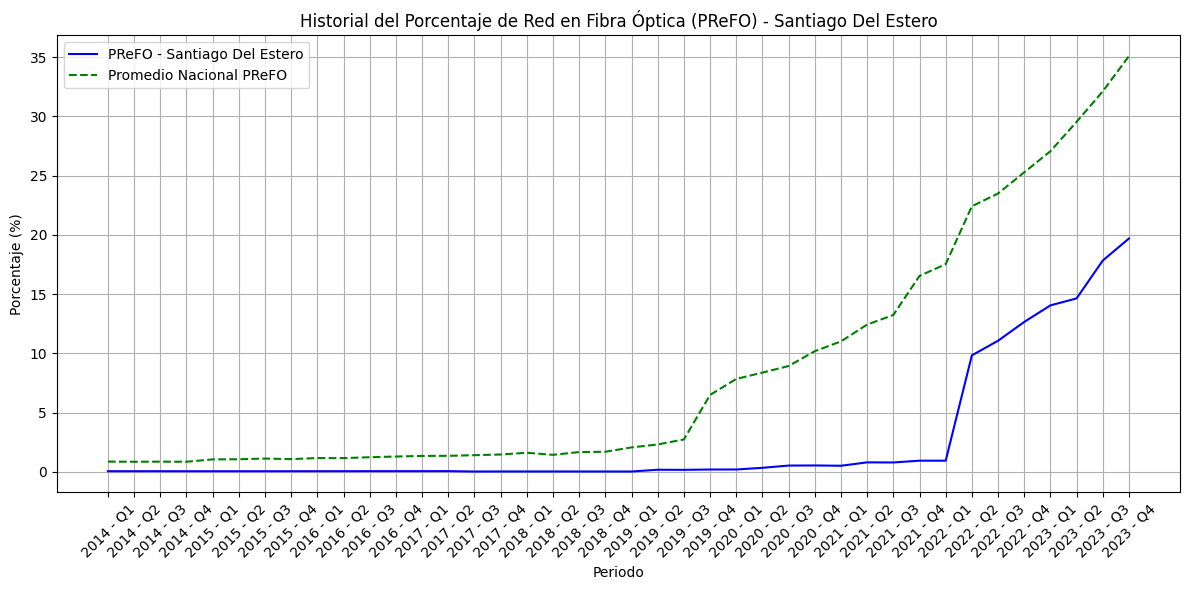

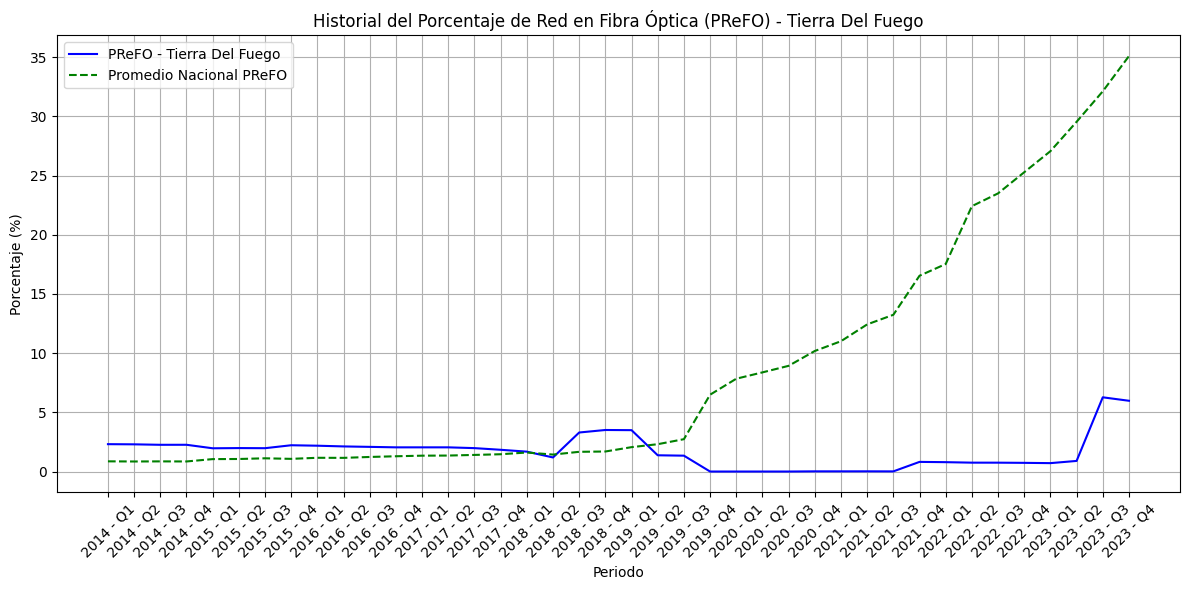

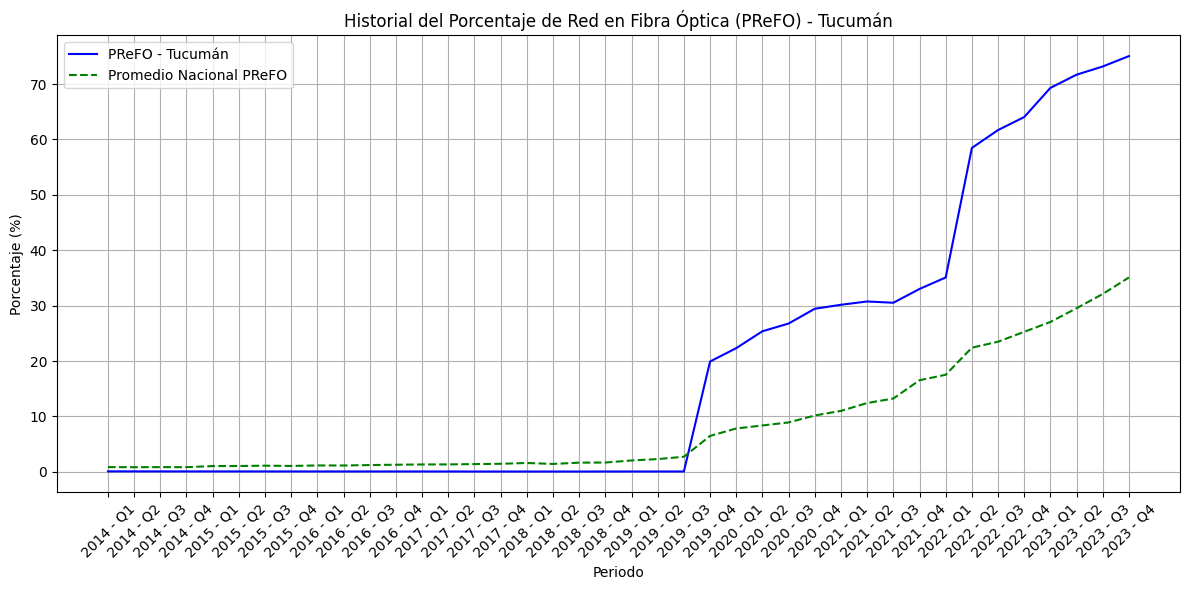

In [132]:
for provincia in provincias:

    df_provincia = df[df['Provincia'] == provincia]

    # Graficar el historial de PReFO para la provincia seleccionada
    plt.figure(figsize=(12, 6))
    plt.plot(df_provincia['Periodo'], df_provincia['Porcentaje Fibra Óptica (PReFO)'], linestyle='-', color='b', label='PReFO - {}'.format(provincia))
    plt.plot(PReFO_Nacional['Periodo'], PReFO_Nacional['Porcentaje Fibra Óptica (PReFO)'], linestyle='--', color='g', label='Promedio Nacional PReFO')
    plt.xlabel('Periodo')
    plt.ylabel('Porcentaje (%)')
    plt.title('Historial del Porcentaje de Red en Fibra Óptica (PReFO) - {}'.format(provincia))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


Podemos observar que hay una gran variabilidad en el PReFO de las provincias, algunas superando el 70% y otras no pasando el 10%, asi que pedir un crecimiento en el PReFO a rango nacional no es realista, se debe lograr un crecimiento en un contexto provincial.

# Conclusion

A lo largo del analisis pudimos encontrar multiples patrones que nos mostraban un cuadro interesante sobre el futuro desarrollo de la telecomunicacion por internet de Argentina. Se observo los causantes principales de las mejoras en calidad y expansion de la red, se identifico posibles zonas de progreso y horizontes de expansion, se encontraron objetivos claros que alcanzar:

- Si bien Argentina parece tener un buen nivel de accesos y de penetracion en la poblacion, se podria mejorar. Podemos seguir profundizando el crecimiento de la red a lo largo y ancho del pais.
- Hay provincias donde el nivel de penetracion es muy elevado mientras que hay otras donde el nivel esta muy por debajo del promedio nacional. Seria pertinente intentar igualar el nivel de desarrollo en todas las provincias, o por lo menos reducir la desigualdad.
- La calidad del servicio de internet se ve directamente relacionada por el tipo de tecnologia mas usado en el pais, por lo que seria un buen objetivo a largo plazo remplazar parte de la red de tecnologias mas anticuadas por redes mas modernas, idealmente Fibra Optica.

## Proposicion KPIs

Debido a todo esto, propongo los siguientes KPI's:

### NACH

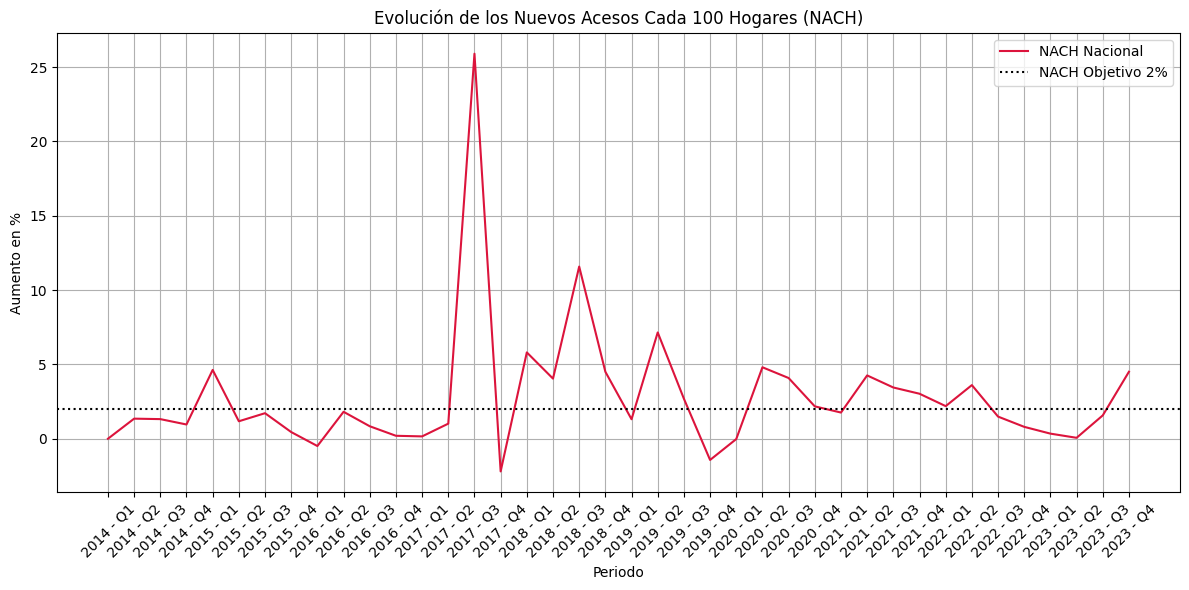

In [133]:
df = df.rename(columns={'KPI':'Nuevos Acesos Cada 100 Hogares (NACH)'})

NACH_Nacional = df.groupby('Periodo')['Nuevos Acesos Cada 100 Hogares (NACH)'].mean().reset_index()

# Graficar el KPI histórico para cada provincia
provincias = df['Provincia'].unique()

# KPI objetivo
NACH_objetivo = 2

plt.figure(figsize=(12, 6))

plt.plot(NACH_Nacional['Periodo'], NACH_Nacional['Nuevos Acesos Cada 100 Hogares (NACH)'], linestyle='solid', color='crimson', label='NACH Nacional')
plt.axhline(y=NACH_objetivo, color='black', linestyle='dotted', label='NACH Objetivo 2%')

plt.xlabel('Periodo')
plt.ylabel('Aumento en %')
plt.title(f'Evolución de los Nuevos Acesos Cada 100 Hogares (NACH)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NACH (Nuevos Acesos Cada 100 Hogares) es el nombre que propongo darle al KPI propuesto por el cliente. Un aumento del 2% a nivel provincial parece razonablemente facil de lograr en zonas con menos nivel de Acceso, pero bastante dificil en algunas provincias especificas que tienen un gran nivel de desarrollo y un 2% presenta un valor mas elevado.

Sin embargo estas ultimas son las menos, y se considera que se puede tener exito en la mayor parte de las provincias del pais.

### CoDePH

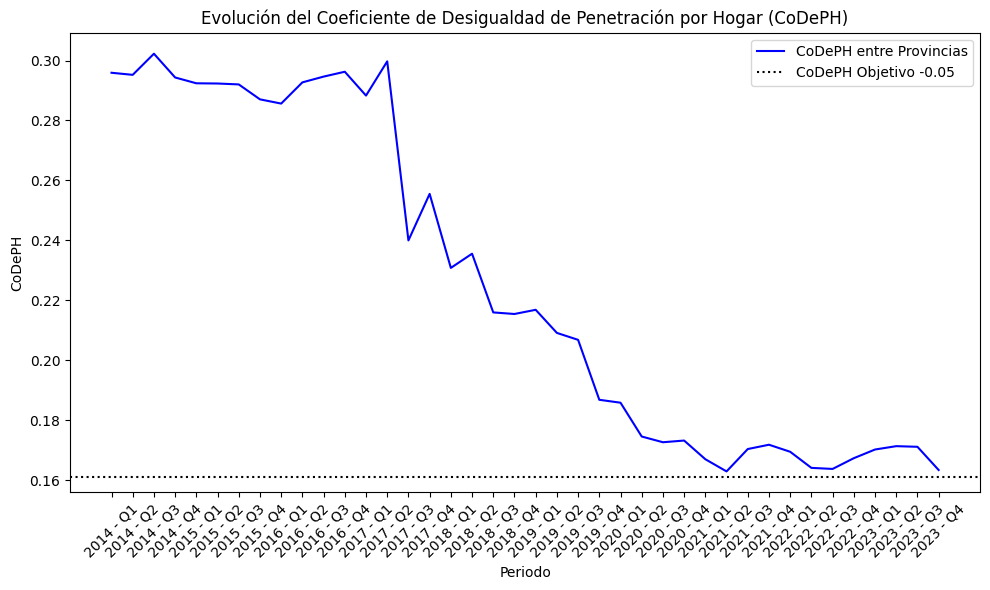

In [134]:
CoDePH_ultimo_periodo = df.loc[df['Periodo'] == '2023 - Q4', 'Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'].values[0]
CoDePH_objetivo = CoDePH_ultimo_periodo - 0.0025

plt.figure(figsize=(10, 6))
plt.plot(df['Periodo'], df['Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'], linestyle='-', color='b', label='CoDePH entre Provincias')
plt.axhline(y=CoDePH_objetivo, color='black', linestyle='dotted', label='CoDePH Objetivo -0.05')
plt.xlabel('Periodo')
plt.ylabel('CoDePH')
plt.title('Evolución del Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

Siguiendo con el espiritu de mejorar el acceso de la poblacion a internet y como indicador de un aprovechamiento de los posibles puntos de expansion y de progreso sostenible, propongo una disminucion de 0.0025 puntos del CoDePh (Coeficiente de Desigualdad de Penetracion en Hogares).

0.0025 puntos parece un numero facil de llegar, pero en los ultimos dos años se a mostrado una resistencia por parte de este indicador a mantenerse a la baja y, como es demostrado en el grafico anterior, estaria por debajo de el minimo historico. En este caso donde estamos mas cerca que nunca del 0, se considera prioritario una mejora sostenible que explosiva.

### PReFO

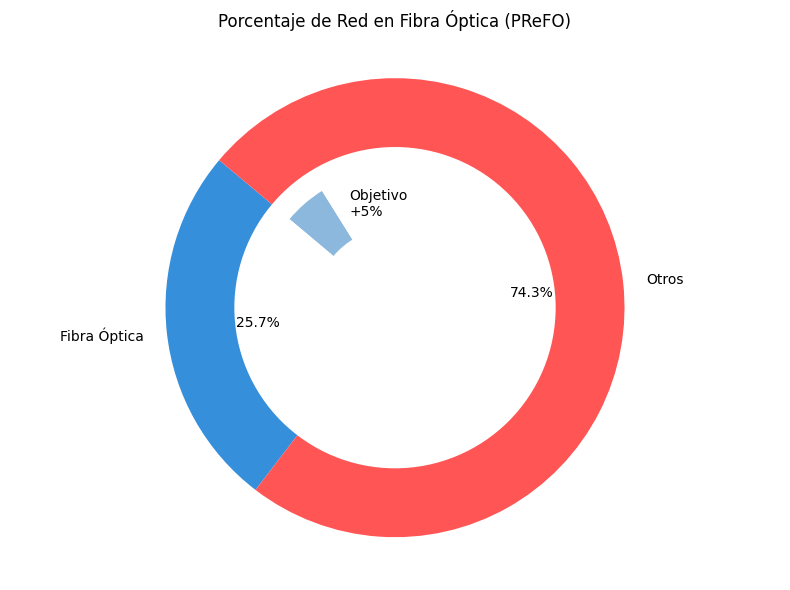

In [135]:
# Obtener el PReFO del último periodo para la provincia específica
ultimo_PReFO = df.loc[df['Periodo'] == df['Periodo'].max(), 'Porcentaje Fibra Óptica (PReFO)'].values[0]

# Definir el objetivo de crecimiento
PReFO_objetivo = 5

# Calcular el porcentaje de accesos que no son fibra óptica
otros_accesos = 100 - ultimo_PReFO

# Etiquetas y datos para el gráfico de dona
labels = ['Fibra Óptica', 'Otros']
sizes = [ultimo_PReFO, otros_accesos]
colors = ['#368FDA', '#ff5555']  # Colores para los segmentos

# Crear el gráfico de dona
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Red en Fibra Óptica (PReFO)')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Crear el gráfico de dona adicional para el objetivo
objective_sizes = [PReFO_objetivo, 100 - PReFO_objetivo]
objective_labels = ['', '']
objective_colors = ['#8BB8DC', '#ffffff']

# Crear el gráfico de dona pequeño en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)


# Agregar el texto del objetivo en el centro
ax.text(-0.2, 0.4, f'Objetivo\n+{PReFO_objetivo}%', fontsize=10, color='black')

# Crear el gráfico de dona adicional en el centro
ax.pie(objective_sizes, labels=objective_labels, colors=objective_colors, startangle=122, radius=0.60)

inner_circle = plt.Circle((0, 0), 0.35, fc='white')
ax.add_artist(inner_circle)

plt.tight_layout()
plt.show()

Por mucho que generemos nuevos accesos, Argentina no completara su modernizacion si no hacemos un avance a gran escala en la tecnologia utilizada para llevar el internet al pais. Por eso propongo un aumento de el 5% en el PReFO (Porcentaje de Red en Fibra Optica).

5% no es un volumen menor, pero si apuntamos a aumentar el numero de accesos en 2% en cada provincia, podemos progresar en ambos KPIs si los nuevos accesos son de Fibra Optica. Eso mas el remplazo de las pocas conecciones con tecnologia ADSL que aun se encuentran en el pais hace que el objetivo sea obtenible.

# Exportacion

Nos aseguramos que el Data Frame esta en el formato correcto.

Hacemos los ultimos ajustes y eliminamos columnas no usadas.

In [136]:
int_columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias', 'Accesos Totales', 'Accesos Totales en el Periodo Anterior', 'Nuevos Accesos']
drop_columns = ['Banda ancha fija', 'Dial up', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otras Velocidades', 'Accesos por cada 100 hab']
float_columns = ['Mbps (Media de bajada)', 'Accesos por cada 100 hogares', 'Nuevos Acesos Cada 100 Hogares (NACH)', 'Accesos por cada 100 hogares (nacional)', 'Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)', 'Porcentaje Fibra Óptica (PReFO)']

df = df.drop(columns=drop_columns)

df[float_columns] = df[float_columns].apply(lambda x: x.astype(float))
df[int_columns] = df[int_columns].apply(lambda x: x.astype(int))

df[float_columns] = df[float_columns].map(lambda x: f"{x:.2f}")

df = df.astype(str)

In [137]:
df['Porcentaje Fibra Óptica (PReFO)'] = df['Porcentaje Fibra Óptica (PReFO)'].apply(lambda x: f"{x}%" if "%" not in x else x)

for column in float_columns:
    df[column] = df[column].str.replace('.', ',')

In [138]:
df

Año Trimestre            Provincia     ADSL Cablemodem Fibra óptica  \
0    2014         1         Buenos Aires  1567685    1000879       120960   
880  2014         1     Tierra Del Fuego    21618       2837          648   
840  2014         1  Santiago Del Estero    32567       3598           19   
360  2014         1                Jujuy    29765       4030           23   
400  2014         1             La Pampa    15826      31305          513   
..    ...       ...                  ...      ...        ...          ...   
759  2023         4             San Luis     4037      41260        30135   
799  2023         4           Santa Cruz     7768      15669        55246   
839  2023         4             Santa Fe    97004     398670       355762   
439  2023         4             La Pampa     6844      59063        34331   
959  2023         4              Tucumán    41318      20267       199876   

    Wireless Otras Tecnologias Mbps (Media de bajada)  \
0      16528             33824                   3,73   
880        1              2934                   3,45   
840      915                34                   2,95   
360        0                 9                   2,69   
400     5848               701                   2,65   
..       ...               ...                    ...   
759    78954               299                 174,59   
799     7687               661                  36,77   
839    44521             13544                  99,81   
439    19982              1106                  25,61   
959     4357               517                 101,55   

    Accesos por cada 100 hogares    Periodo Accesos Totales  \
0                          54,57  2014 - Q1         2739876   
880                        63,97  2014 - Q1           28038   
840                        16,31  2014 - Q1           37133   
360                        18,42  2014 - Q1           33827   
400                        48,43  2014 - Q1           54193   
..                           ...        ...             ...   
759                       102,07  2023 - Q4          154685   
799                        73,75  2023 - Q4           87031   
839                        79,75  2023 - Q4          909501   
439                        99,96  2023 - Q4          121326   
959                        61,04  2023 - Q4          266335   

    Accesos Totales en el Periodo Anterior Nuevos Accesos  \
0                                        0              0   
880                                      0              0   
840                                      0              0   
360                                      0              0   
400                                      0              0   
..                                     ...            ...   
759                                 148916           5769   
799                                  47987          39044   
839                                 900352           9149   
439                                 119921           1405   
959                                 266557           -222   

    Nuevos Acesos Cada 100 Hogares (NACH)  \
0                                    0,00   
880                                  0,00   
840                                  0,00   
360                                  0,00   
400                                  0,00   
..                                    ...   
759                                  3,87   
799                                 81,36   
839                                  1,02   
439                                  1,17   
959                                 -0,08   

    Accesos por cada 100 hogares (nacional)  \
0                                     36,19   
880                                   36,19   
840                                   36,19   
360                                   36,19   
400                                   36,19   
..                                      ...   
759                                 

In [139]:
df.to_csv('../Data/EDA.csv', index=False, encoding='utf-8')